In [1]:
import pandas as pd
import json

from itertools import combinations

import sys
sys.path.insert(1, r'C:\\Users\\GHarr\\OneDrive - Lincoln College\\Python Projects\Data Science\\ghlibrary')

import dataframe_tools # type: ignore
from dag_tools import DirectedAcyclicGraph # type: ignore
from causal_tools import CausalModel # type: ignore
from misc_tools import create_grid # type: ignore

In [2]:
from icecream import ic

A complex DAG taken from 'Causal Inference in Statistics' that includes 5 colliders, 3 forks and a chain between the treatment and outcome 



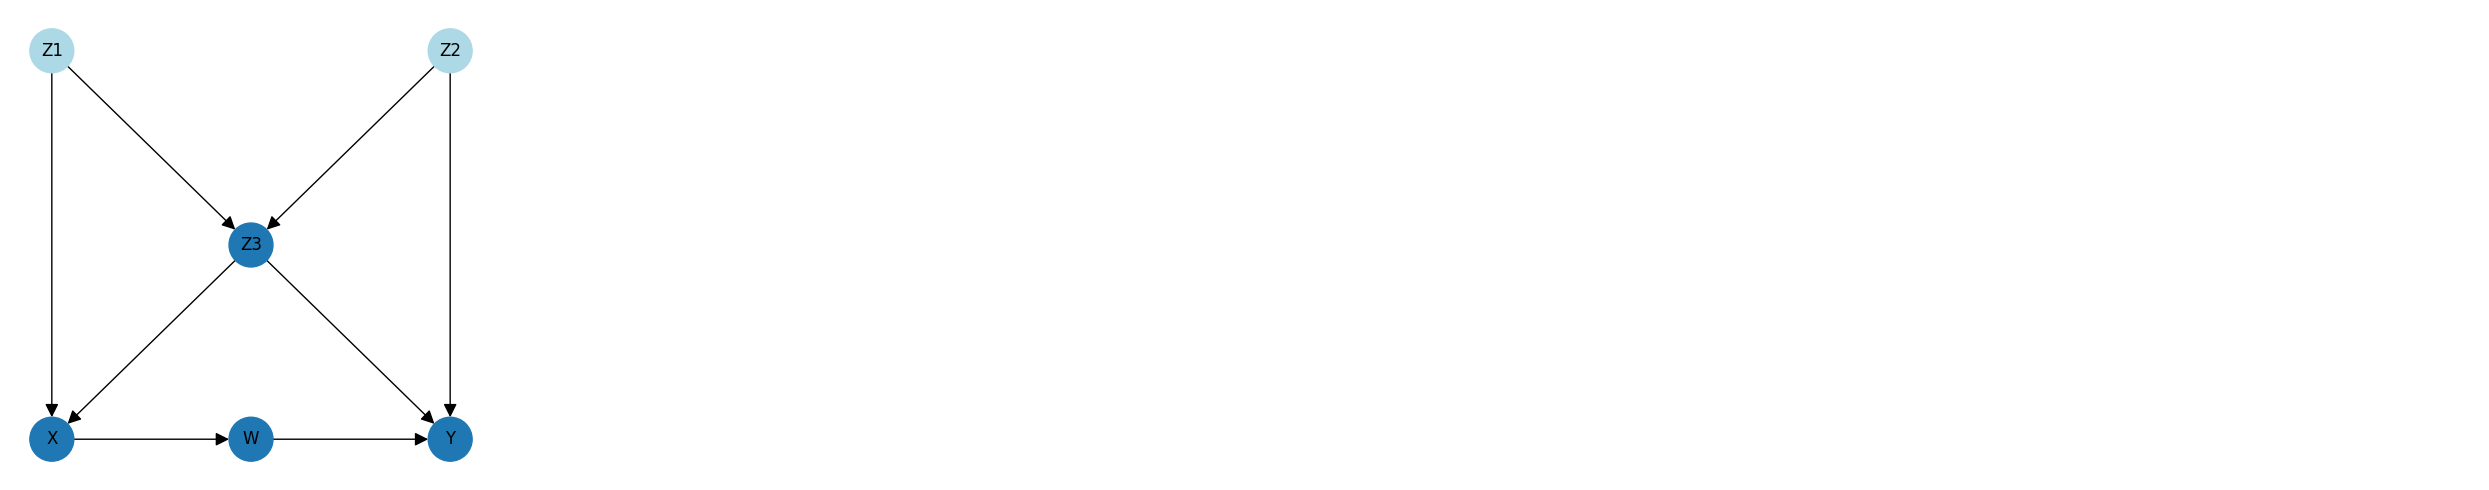

In [3]:
# Use our good old friend the complex DAG with a front-door path ...
example_dag = DirectedAcyclicGraph.example_dags()["causal_inference_in_statistics_1"]
print(example_dag["description"], "\n")

dag: DirectedAcyclicGraph = example_dag["dag"]
dag.draw(grid_size=5)


In [4]:
# Generate some data that matches the DAG ...
causal_model: CausalModel = CausalModel(dag=dag, random_state=1)
causal_model.fit(X=None)
causal_model.data.head()

ic| 'CausalModel.fit'
ic| expr_str: 'Z3 = 3 x Z1 + -1.5 x Z2 + ε'
ic| expr_str: 'X = 2 x Z1 + 2.5 x Z3 + ε'
ic| expr_str: 'W = 3 x X + ε'
ic| expr_str: 'Y = 2 x W + 2 x Z2 + -3 x Z3 + ε'


Z1        Z2         Z3          X           W           Y
0  3.844571  0.441614  12.794091  36.960446  115.415586  206.886397
1  2.907344  1.647342   4.678797  24.138748   82.681145  150.095276
2  6.241980  1.659767  16.349857  53.441608  193.360262  330.371609
3  0.793805  4.437415  -5.416621 -13.807977  -49.231954  -20.652048
4  7.754840  4.348612  16.867327  57.108005  171.713442  322.707828

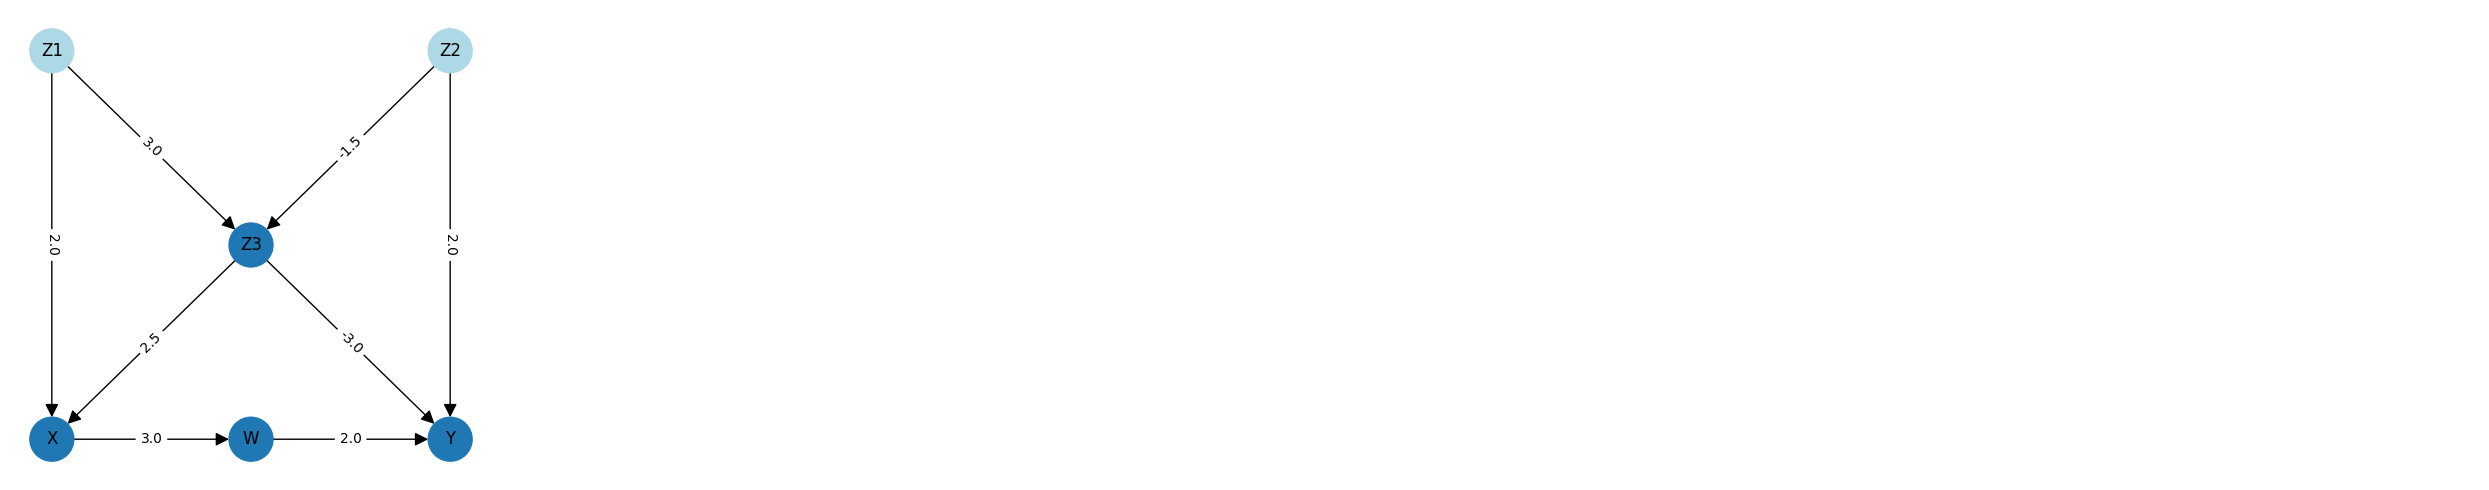

In [5]:
dag.draw(grid_size=5, labels=causal_model.edge_weightings)

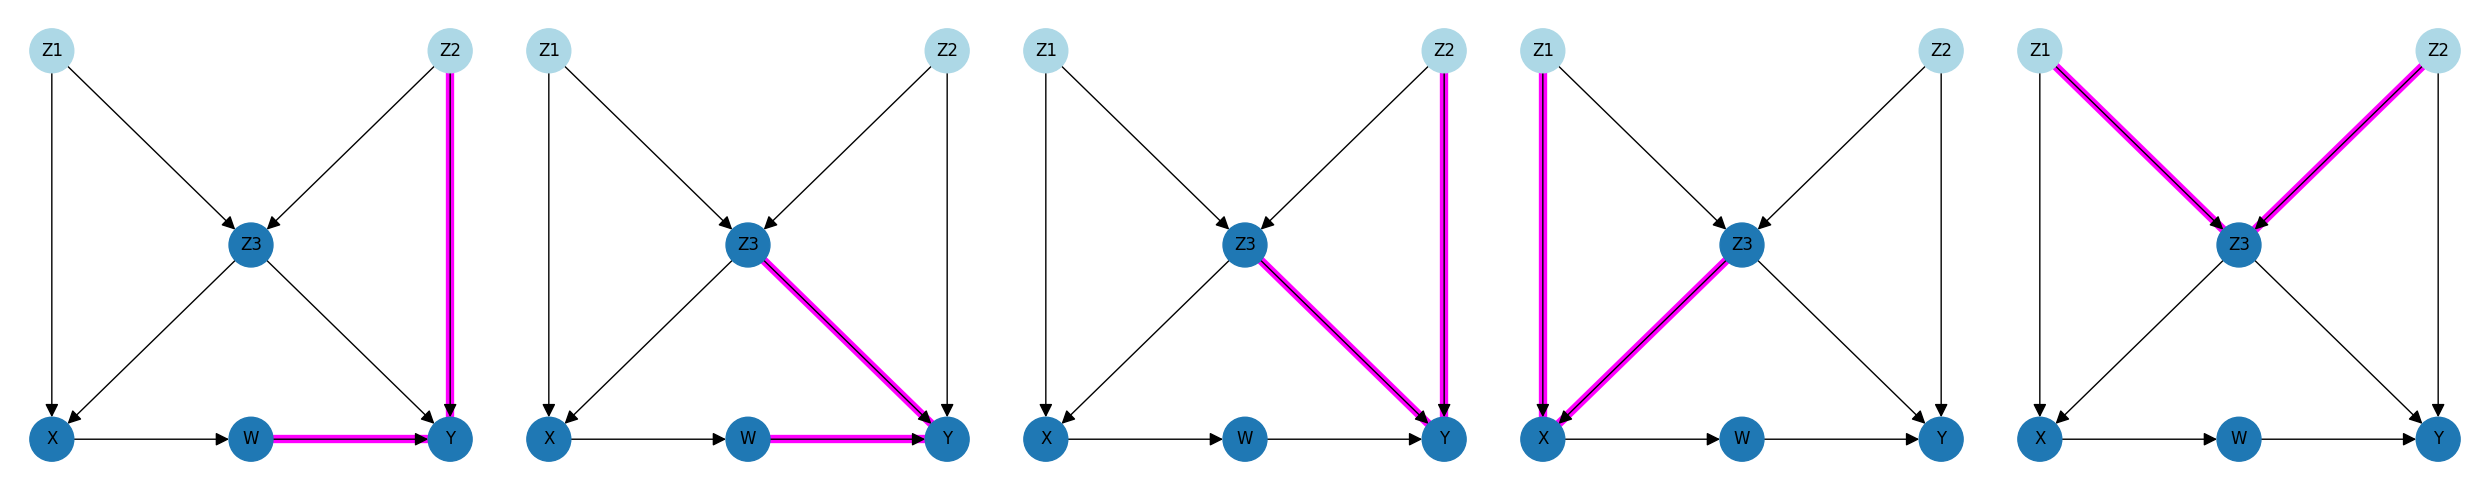

In [6]:
dag.draw_paths(paths=dag.colliders, cols=5)

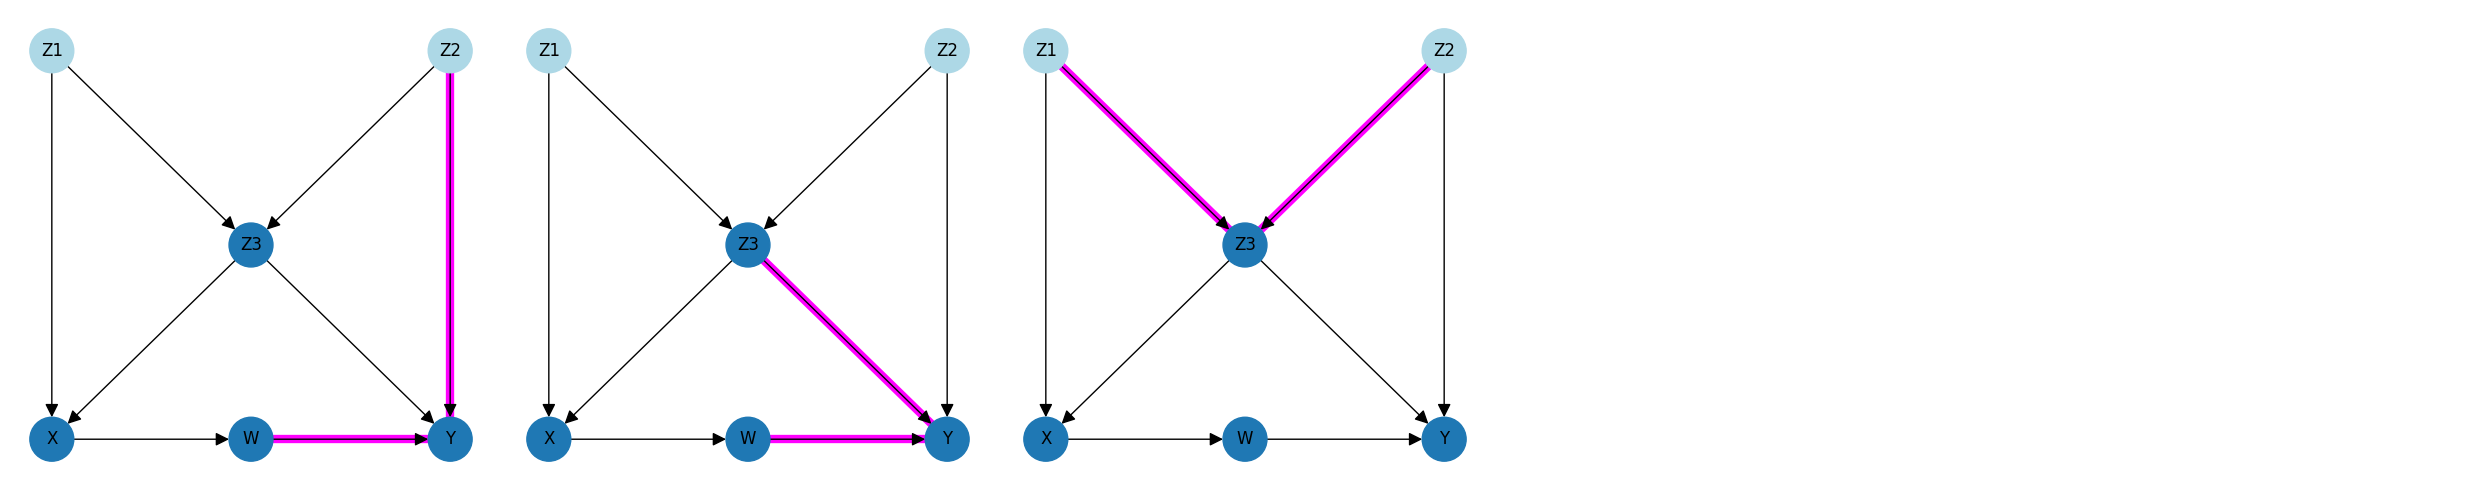

In [7]:
dag.draw_paths(paths=dag.v_structures(strong=False), cols=5)

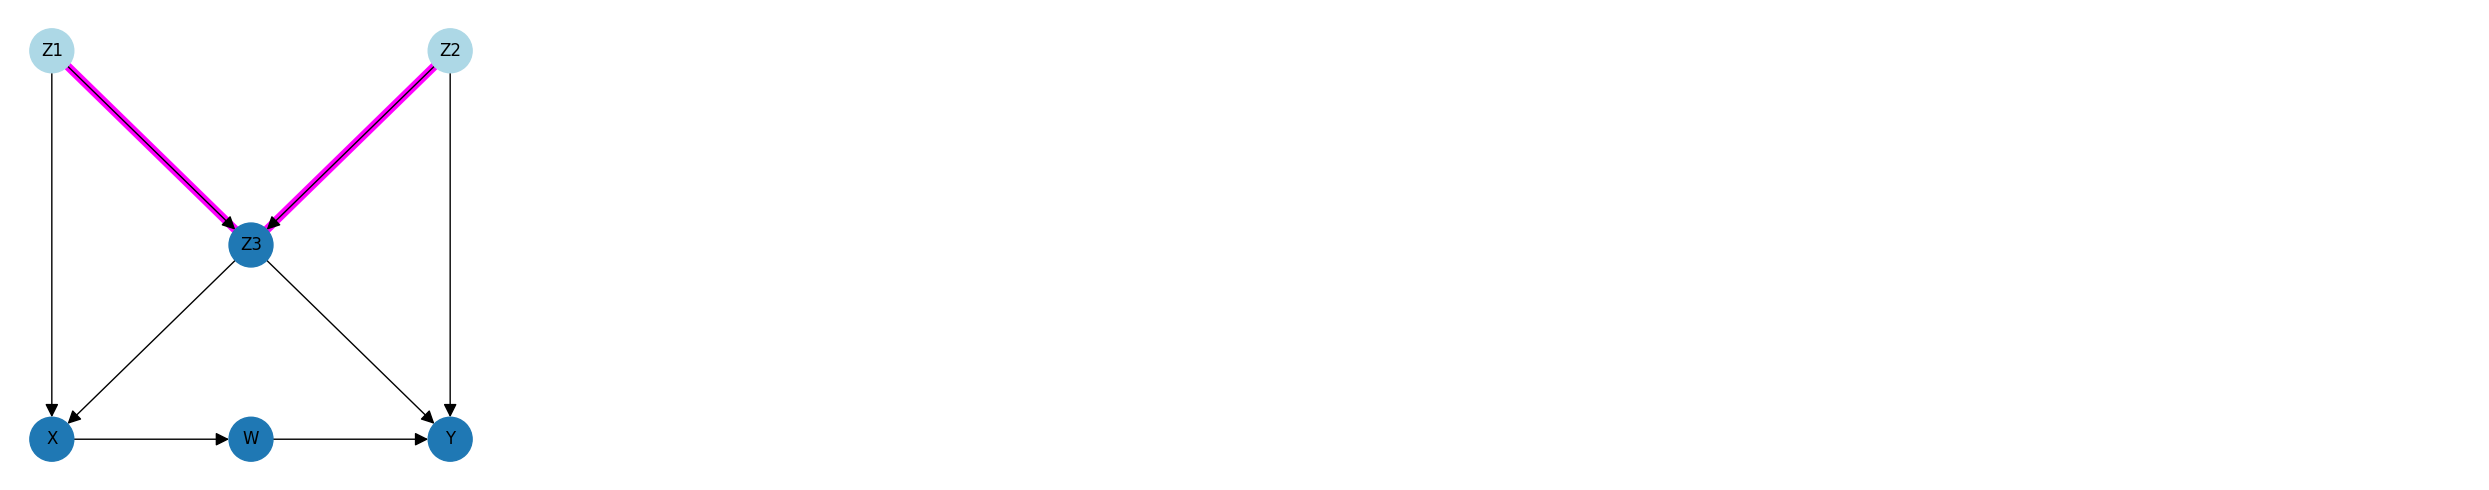

In [8]:
dag.draw_paths(paths=dag.v_structures(strong=True), cols=5)

In [9]:
for v_structure in dag.v_structures():
    collider_identified_in_data = causal_model._collider_identified_in_data(v_structure, dag)
    print(f"path={v_structure}")
    print(f"collider identified in data = {collider_identified_in_data}\n")

path={'W': 'treatment', 'Y': 'collider', 'Z2': 'outcome'}
collider identified in data = True

path={'W': 'treatment', 'Y': 'collider', 'Z3': 'outcome'}
collider identified in data = True

path={'Z1': 'treatment', 'Z3': 'collider', 'Z2': 'outcome'}
collider identified in data = True



In [10]:
for junction in dag.junctions:
    print(f"junction={junction}, junction type={dag.junction_type(junction)}")

junction={'X': 'treatment', 'W': 'chain', 'Y': 'outcome'}, junction type=chain
junction={'Z1': 'treatment', 'X': 'chain', 'W': 'outcome'}, junction type=chain
junction={'Z3': 'treatment', 'X': 'chain', 'W': 'outcome'}, junction type=chain
junction={'Z1': 'treatment', 'Z3': 'chain', 'X': 'outcome'}, junction type=chain
junction={'Z1': 'treatment', 'Z3': 'chain', 'Y': 'outcome'}, junction type=chain
junction={'Z2': 'treatment', 'Z3': 'chain', 'X': 'outcome'}, junction type=chain
junction={'Z2': 'treatment', 'Z3': 'chain', 'Y': 'outcome'}, junction type=chain
junction={'X': 'treatment', 'Z1': 'fork', 'Z3': 'outcome'}, junction type=fork
junction={'X': 'treatment', 'Z3': 'fork', 'Y': 'outcome'}, junction type=fork
junction={'Y': 'treatment', 'Z2': 'fork', 'Z3': 'outcome'}, junction type=fork
junction={'W': 'treatment', 'Y': 'collider', 'Z2': 'outcome'}, junction type=collider
junction={'W': 'treatment', 'Y': 'collider', 'Z3': 'outcome'}, junction type=collider
junction={'Z2': 'treatment', 

In [11]:
ic.disable()
for junction in dag.junctions:
    print(f"junction={junction}, dag junction type={dag.junction_type(junction)}, v-structure identified in data = {causal_model._collider_identified_in_data(junction, dag)}")
ic.enable()

junction={'X': 'treatment', 'W': 'chain', 'Y': 'outcome'}, dag junction type=chain, v-structure identified in data = True
junction={'Z1': 'treatment', 'X': 'chain', 'W': 'outcome'}, dag junction type=chain, v-structure identified in data = False
junction={'Z3': 'treatment', 'X': 'chain', 'W': 'outcome'}, dag junction type=chain, v-structure identified in data = False
junction={'Z1': 'treatment', 'Z3': 'chain', 'X': 'outcome'}, dag junction type=chain, v-structure identified in data = True
junction={'Z1': 'treatment', 'Z3': 'chain', 'Y': 'outcome'}, dag junction type=chain, v-structure identified in data = True
junction={'Z2': 'treatment', 'Z3': 'chain', 'X': 'outcome'}, dag junction type=chain, v-structure identified in data = True
junction={'Z2': 'treatment', 'Z3': 'chain', 'Y': 'outcome'}, dag junction type=chain, v-structure identified in data = True
junction={'X': 'treatment', 'Z1': 'fork', 'Z3': 'outcome'}, dag junction type=fork, v-structure identified in data = False
junction={'

In [12]:
ic.disable()
for junction in dag.junctions:
    print(f"junction={junction}, dag junction type={dag.junction_type(junction)}, v-structure identified in data = {causal_model._v_structure_identified_in_data(junction)}")
ic.enable()

junction={'X': 'treatment', 'W': 'chain', 'Y': 'outcome'}, dag junction type=chain, v-structure identified in data = False
junction={'Z1': 'treatment', 'X': 'chain', 'W': 'outcome'}, dag junction type=chain, v-structure identified in data = False


junction={'Z3': 'treatment', 'X': 'chain', 'W': 'outcome'}, dag junction type=chain, v-structure identified in data = False
junction={'Z1': 'treatment', 'Z3': 'chain', 'X': 'outcome'}, dag junction type=chain, v-structure identified in data = False
junction={'Z1': 'treatment', 'Z3': 'chain', 'Y': 'outcome'}, dag junction type=chain, v-structure identified in data = False
junction={'Z2': 'treatment', 'Z3': 'chain', 'X': 'outcome'}, dag junction type=chain, v-structure identified in data = False
junction={'Z2': 'treatment', 'Z3': 'chain', 'Y': 'outcome'}, dag junction type=chain, v-structure identified in data = False
junction={'X': 'treatment', 'Z1': 'fork', 'Z3': 'outcome'}, dag junction type=fork, v-structure identified in data = False
junction={'X': 'treatment', 'Z3': 'fork', 'Y': 'outcome'}, dag junction type=fork, v-structure identified in data = False
junction={'Y': 'treatment', 'Z2': 'fork', 'Z3': 'outcome'}, dag junction type=fork, v-structure identified in data = False
junction

In [13]:
is_valid, candidate_edges = causal_model._pearlean_validate_reversed_edges()

ic| expression: 'Z2 ⫫ W'


ic| expression: 'W ⫫ Z2'
ic| expression: 'Z2 ⫫̸ W | Y'
ic| expression: 'W ⫫̸ Z2 | Y'
ic| expression: 'Z3 ⫫ W'
ic| expression: 'W ⫫ Z3'
ic| expression: 'Z3 ⫫̸ W | Y'
ic| expression: 'W ⫫̸ Z3 | Y'
ic| expression: 'Z1 ⫫ W'
ic| expression: 'W ⫫ Z1'
ic| expression: 'Z1 ⫫̸ W | X'
ic| expression: 'W ⫫̸ Z1 | X'
ic| expression: 'Z3 ⫫ W'
ic| expression: 'W ⫫ Z3'
ic| expression: 'Z3 ⫫̸ W | X'
ic| expression: 'W ⫫̸ Z3 | X'
ic| expression: 'Z2 ⫫ Z1'
ic| expression: 'Z1 ⫫ Z2'
ic| expression: 'Z2 ⫫̸ Z1 | Z3'
ic| expression: 'Z1 ⫫̸ Z2 | Z3'
ic| expression: 'Z2 ⫫ Z1'
ic| expression: 'Z1 ⫫ Z2'
ic| expression: 'Z2 ⫫̸ Z1 | Z3'
ic| expression: 'Z1 ⫫̸ Z2 | Z3'
ic| expression: 'Z2 ⫫ W'
ic| expression: 'W ⫫ Z2'
ic| expression: 'Z2 ⫫̸ W | Y'
ic| expression: 'W ⫫̸ Z2 | Y'
ic| expression: 'Z2 ⫫ X'
ic| expression: 'X ⫫ Z2'
ic| expression: 'Z2 ⫫̸ X | Z3'
ic| expression: 'X ⫫̸ Z2 | Z3'


In [14]:
ic.disable()
is_valid, candidate_reversed_edges, missing_edges, spurious_edges = causal_model.validate()

In [15]:
print(is_valid)
print(candidate_reversed_edges)
print(missing_edges)
print(spurious_edges)

False
[]
[]
[('Z2', 'Y')]


This is the one!!!

In [16]:
#causal_model: CausalModel = CausalModel(dag=dag)
#causal_model.fit(X=None)

In [17]:
# TODO: Try _pearlean_validate_reversed_edges with the new call to _v_structure_identified_in_data
# TODO: Try _validate_reversed_edges with the old call to _collider_identified_in_data
# TODO: Try _validate_reversed_edges with the new call to _v_structure_identified_in_data

In [18]:
import numpy as np
import pandas as pd

In [19]:
pd.set_option('display.float_format', '{:.6f}'.format)
pd.set_option('display.max_colwidth', 60)

# At Last!!!!!!!!!!!!!!!!!!!!!!

In [20]:
ic.disable()

df_junction = pd.DataFrame()
column_names = ["junction", "junction_type_in_dag", "_v_structure_identified_in_data", "_collider_identified_in_data", "r", "r_2", "p_value", "coefficient"]

for junction in dag.junctions:
    #collider_identified_in_data = causal_model._collider_identified_in_data(junction, dag)

    start = list(junction.keys())[0]
    intermediary = list(junction.keys())[1]
    end = list(junction.keys())[2]

    _, _, ols_results = causal_model.data.dependence(expression=f"{end} ⫫ {start}")
    v_structure_identified_in_data = causal_model._v_structure_identified_in_data(junction)
    collider_identified_in_data = causal_model._collider_identified_in_data(junction, dag=causal_model.dag)
    
    j = json.dumps(junction)
    r = ols_results.rsquared**0.5
    r_2 = ols_results.rsquared
    p_value = ols_results.pvalues[start]
    coefficient = ols_results.params[start]

    junction_row = pd.DataFrame([{'junction':str(junction), 'junction_type_in_dag':dag.junction_type(junction), '_v_structure_identified_in_data': v_structure_identified_in_data, '_collider_identified_in_data': collider_identified_in_data, 'r': r, 'r_2': r_2, 'p_value': p_value, 'coefficient': coefficient}], index=[0])
    df_junction = pd.concat([df_junction, junction_row], ignore_index=True)

ic.enable()

df_junction

junction  \
0         {'X': 'treatment', 'W': 'chain', 'Y': 'outcome'}   
1        {'Z1': 'treatment', 'X': 'chain', 'W': 'outcome'}   
2        {'Z3': 'treatment', 'X': 'chain', 'W': 'outcome'}   
3       {'Z1': 'treatment', 'Z3': 'chain', 'X': 'outcome'}   
4       {'Z1': 'treatment', 'Z3': 'chain', 'Y': 'outcome'}   
5       {'Z2': 'treatment', 'Z3': 'chain', 'X': 'outcome'}   
6       {'Z2': 'treatment', 'Z3': 'chain', 'Y': 'outcome'}   
7        {'X': 'treatment', 'Z1': 'fork', 'Z3': 'outcome'}   
8         {'X': 'treatment', 'Z3': 'fork', 'Y': 'outcome'}   
9        {'Y': 'treatment', 'Z2': 'fork', 'Z3': 'outcome'}   
10    {'W': 'treatment', 'Y': 'collider', 'Z2': 'outcome'}   
11    {'W': 'treatment', 'Y': 'collider', 'Z3': 'outcome'}   
12   {'Z2': 'treatment', 'Y': 'collider', 'Z3': 'outcome'}   
13   {'Z1': 'treatment', 'X': 'collider', 'Z3': 'outcome'}   
14  {'Z1': 'treatment', 'Z3': 'collider', 'Z2': 'outcome'}   

   junction_type_in_dag  _v_structure_identified_in_data  \
0                 chain                            False   
1                 chain                            False   
2                 chain                            False   
3                 chain                            False   
4                 chain                            False   
5                 chain                            False   
6                 chain                            False   
7                  fork                            False   
8                  fork                            False   
9                  fork                            False   
10             collider                            False   
11             collider                            False   
12             collider                            False   
13             collider                            False   
14          v-structure                             True   

    _collider_identified_in_data        r      r_2  p_value  coefficient  
0                           True 0.922856 0.851663 0.000000     4.896618  
1                          False 0.834442 0.696294 0.000000    28.417182  
2                          False 0.934653 0.873577 0.000000     8.889809  
3                           True 0.865428 0.748966 0.000000     9.543818  
4                           True 0.799273 0.638837 0.000000    46.767972  
5                           True 0.411286 0.169156 0.000000    -3.959298  
6                           True 0.359872 0.129508 0.000000   -18.381645  
7                          False 0.963244 0.927838 0.000000     0.312743  
8                           True 0.922856 0.851663 0.000000     4.896618  
9                           True 0.877142 0.769378 0.000000     0.053673  
10                          True 0.408247 0.166666 0.000000    -0.013733  
11                          True 0.934653 0.873577 0.000000     0.098267  
12                          True 0.502696 0.252703 0.000000    -1.571201  
13                         False 0.841065 0.707390 0.000000     3.011428  
14                          True 0.022092 0.000488 0.485291    -0.025308

In [21]:
causal_model._v_structure_identified_in_data({'Z1': 'treatment', 'Z3': 'collider', 'Z2': 'outcome'})

ic| expression: 'Z2 ⫫ Z1'
ic| expression: 'Z1 ⫫ Z2'
ic| expression: 'Z2 ⫫̸ Z1 | Z3'
ic| expression: 'Z1 ⫫̸ Z2 | Z3'


True

In [22]:
causal_model.data

Z1       Z2        Z3          X          W          Y
0   3.844571 0.441614 12.794091  36.960446 115.415586 206.886397
1   2.907344 1.647342  4.678797  24.138748  82.681145 150.095276
2   6.241980 1.659767 16.349857  53.441608 193.360262 330.371609
3   0.793805 4.437415 -5.416621 -13.807977 -49.231954 -20.652048
4   7.754840 4.348612 16.867327  57.108005 171.713442 322.707828
..       ...      ...       ...        ...        ...        ...
995 4.633421 5.904063  5.465877  23.658204  79.602500 125.114282
996 5.361970 4.212665  9.212642  31.732316  89.867887 194.437821
997 4.431575 3.740065  9.770078  34.221805 121.876436 241.395009
998 4.489582 2.445267  8.361504  32.488949  85.694711  98.286147
999 0.568494 2.138615 -3.886084 -12.428906 -38.875584 -80.710849

[1000 rows x 6 columns]

In [23]:
# ic.disable()

# strong_v_structures = True
# #override_reversed_edges=[('W', 'Y')]
# override_reversed_edges=[]

# #validate_reversed_edges, reversed_edges = causal_model._validate_reversed_edges(strong_v_structures=strong_v_structures, override_reversed_edges=override_reversed_edges)
# validate_reversed_edges, reversed_edges = causal_model._validate_reversed_edges_old()

# print("No edges reversed")
# print(f"validate_reversed_edges: {validate_reversed_edges}")
# print(f"reversed edges identified: {reversed_edges}\n")


# for edge in dag.edges:

#     test_dag = dag.reverse_edges(edges_to_reverse=[edge])

#     if not test_dag.is_acyclic:
#         continue

#     causal_model_test = CausalModel(dag=test_dag)
#     causal_model_test.fit(X=causal_model.data)

#     #validate_reversed_edges, reversed_edges = causal_model_test._validate_reversed_edges(strong_v_structures=strong_v_structures, override_reversed_edges=override_reversed_edges)
#     validate_reversed_edges, reversed_edges = causal_model_test._validate_reversed_edges_old()

#     print(f"edge reversed: {edge}")
#     print(f"validate_reversed_edges: {validate_reversed_edges}")
#     print(f"reversed edges identified: {reversed_edges}\n")

# ic.enable()


In [24]:
ic.disable()
validate_reversed_edges, candidate_reversed_edges = causal_model._validate_reversed_edges(strong_v_structures=False)
ic.enable()
candidate_reversed_edges


[]

In [25]:
ic.disable()
#override_reversed_edges = [('W', 'Y')]
override_reversed_edges = []

causal_model_test = CausalModel(dag=dag, random_state=1)
causal_model_test.fit(X=None)

validate_missing_edges, missing_edges = causal_model_test._validate_missing_edges()
validate_spurious_edges, spurious_edges = causal_model_test._validate_spurious_edges()
validate_reversed_edges, candidate_reversed_edges = causal_model_test._validate_reversed_edges(strong_v_structures=True, override_reversed_edges=override_reversed_edges)
ic.enable()


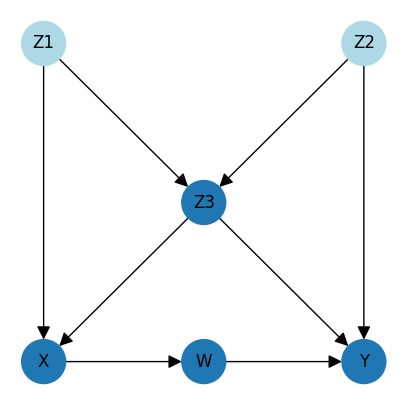

In [26]:
dag.draw()

In [27]:
# What about searching for every combination of edge reversals of the minimum length that create a valid DAG (i.e. one that validates against the data)?

In [42]:
ic.disable()

strong_v_structures = False
override_reversed_edges=[('W', 'Y'), ('Z1', 'Z3'), ('Z2', 'Z3'), ('Z1', 'X'), ('Z2', 'Y')]
no_reversals = 2

validate_reversed_edges, candidate_reversed_edges = causal_model._validate_reversed_edges(strong_v_structures=strong_v_structures, override_reversed_edges=override_reversed_edges)

print("No edges reversed")
print(f"validate_reversed_edges: {validate_reversed_edges}")
print(f"candidate reversed edges identified: {candidate_reversed_edges}\n")

edges_sets = combinations([edge for edge in dag.edges if edge not in override_reversed_edges], no_reversals)

for edges_to_reverse in edges_sets:
    edges_to_reverse = list(edges_to_reverse)

    test_dag = dag.reverse_edges(edges_to_reverse=edges_to_reverse)

    if not test_dag.is_acyclic:
        continue

    causal_model_test = CausalModel(dag=test_dag)
    causal_model_test.fit(X=causal_model.data)

    validate_reversed_edges, candidate_reversed_edges = causal_model_test._validate_reversed_edges(strong_v_structures=strong_v_structures, override_reversed_edges=override_reversed_edges)
    #validate_reversed_edges, reversed_edges = causal_model_test._validate_reversed_edges_old()

    print(f"edge reversed: {edges_to_reverse}")
    print(f"validate_reversed_edges: {validate_reversed_edges}")
    print(f"candidate reversed edges identified: {candidate_reversed_edges}\n")

ic.enable()


No edges reversed
validate_reversed_edges: True
candidate reversed edges identified: []

edge reversed: [('X', 'W'), ('Z3', 'X')]
validate_reversed_edges: False
candidate reversed edges identified: [[('W', 'X'), ('X', 'Z3')]]

edge reversed: [('X', 'W'), ('Z3', 'Y')]
validate_reversed_edges: False
candidate reversed edges identified: [[('W', 'X'), ('Y', 'Z3')]]

edge reversed: [('Z3', 'X'), ('Z3', 'Y')]
validate_reversed_edges: False
candidate reversed edges identified: [[('X', 'Z3'), ('Y', 'Z3')]]



In [34]:
from more_itertools import powerset

In [35]:
for edges_to_reverse in powerset(dag.edges):
    print(edges_to_reverse)

()
(('W', 'Y'),)
(('X', 'W'),)
(('Z1', 'X'),)
(('Z1', 'Z3'),)
(('Z2', 'Y'),)
(('Z2', 'Z3'),)
(('Z3', 'X'),)
(('Z3', 'Y'),)
(('W', 'Y'), ('X', 'W'))
(('W', 'Y'), ('Z1', 'X'))
(('W', 'Y'), ('Z1', 'Z3'))
(('W', 'Y'), ('Z2', 'Y'))
(('W', 'Y'), ('Z2', 'Z3'))
(('W', 'Y'), ('Z3', 'X'))
(('W', 'Y'), ('Z3', 'Y'))
(('X', 'W'), ('Z1', 'X'))
(('X', 'W'), ('Z1', 'Z3'))
(('X', 'W'), ('Z2', 'Y'))
(('X', 'W'), ('Z2', 'Z3'))
(('X', 'W'), ('Z3', 'X'))
(('X', 'W'), ('Z3', 'Y'))
(('Z1', 'X'), ('Z1', 'Z3'))
(('Z1', 'X'), ('Z2', 'Y'))
(('Z1', 'X'), ('Z2', 'Z3'))
(('Z1', 'X'), ('Z3', 'X'))
(('Z1', 'X'), ('Z3', 'Y'))
(('Z1', 'Z3'), ('Z2', 'Y'))
(('Z1', 'Z3'), ('Z2', 'Z3'))
(('Z1', 'Z3'), ('Z3', 'X'))
(('Z1', 'Z3'), ('Z3', 'Y'))
(('Z2', 'Y'), ('Z2', 'Z3'))
(('Z2', 'Y'), ('Z3', 'X'))
(('Z2', 'Y'), ('Z3', 'Y'))
(('Z2', 'Z3'), ('Z3', 'X'))
(('Z2', 'Z3'), ('Z3', 'Y'))
(('Z3', 'X'), ('Z3', 'Y'))
(('W', 'Y'), ('X', 'W'), ('Z1', 'X'))
(('W', 'Y'), ('X', 'W'), ('Z1', 'Z3'))
(('W', 'Y'), ('X', 'W'), ('Z2', 'Y'))
(('W',

In [30]:
import matplotlib.pyplot as plt

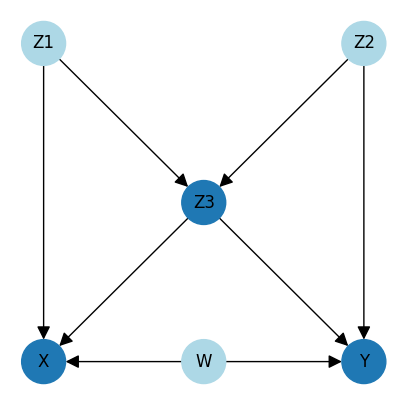

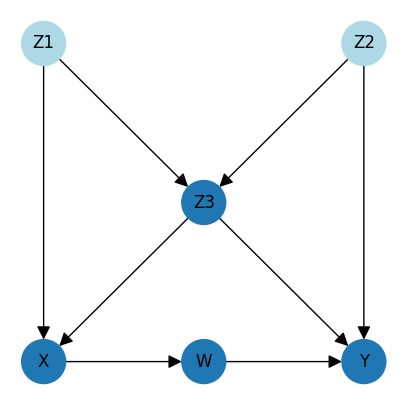

ic| 'CausalModel.fit'


In [34]:
test_dag.draw()
plt.show()

test_dag_2 = test_dag.reverse_edges([("W", "X")])
test_dag_2.draw()
plt.show()

causal_model_test_2 = CausalModel(dag=test_dag_2)
causal_model_test_2.fit(X=causal_model.data)

In [39]:
ic.disable()
validate_reversed_edges, candidate_reversed_edges = causal_model_test_2._pearlean_validate_reversed_edges(strong_v_structures=True, override_reversed_edges=[])
print(validate_reversed_edges)
print(candidate_reversed_edges)

True
[]


In [24]:
# TODO: Iterate around each individual edge, reverse each one singularly and see if the new _validate_reversed_edges identifies it or not!!
test_dag = dag.reverse_edges(edges_to_reverse=[("Z1", "Z3")])
#causal_model_test = CausalModel(dag=dag, random_state=None)
#random_state = i + seed

causal_model_test = CausalModel(dag=test_dag, random_state=1)
causal_model_test.fit(X=causal_model.data)

validate_reversed_edges, candidate_reversed_edges = causal_model_test._validate_reversed_edges()

print(validate_reversed_edges)
print(candidate_reversed_edges)

ic| 'CausalModel.fit'
ic| expression: 'Z2 ⫫ W'
ic| expression: 'W ⫫ Z2'
ic| expression: 'Z2 ⫫̸ W | Y'
ic| expression: 'W ⫫̸ Z2 | Y'
ic| expression: 'Z3 ⫫ W'
ic| expression: 'W ⫫ Z3'
ic| expression: 'Z3 ⫫̸ W | Y'
ic| expression: 'W ⫫̸ Z3 | Y'
ic| expression: 'Z1 ⫫ W'
ic| expression: 'W ⫫ Z1'
ic| expression: 'Z1 ⫫̸ W | X'
ic| expression: 'W ⫫̸ Z1 | X'
ic| expression: 'Z3 ⫫ W'
ic| expression: 'W ⫫ Z3'
ic| expression: 'Z3 ⫫̸ W | X'
ic| expression: 'W ⫫̸ Z3 | X'
ic| expression: 'Z2 ⫫ Z1'
ic| expression: 'Z1 ⫫ Z2'
ic| expression: 'Z2 ⫫̸ Z1 | Z3'
ic| expression: 'Z1 ⫫̸ Z2 | Z3'


False
[('Z3', 'Z1')]


In [29]:
ic.disable()
n_tests: int = 100
seed: int = 1000
#n_tests: int = 1

validate_missing_passed: int = 0
validate_spurious_passed: int = 0
validate_reversed_passed: int = 0
validate_all_passed: int = 0

all_missing_edges: list = []
all_spurious_edges: list = []
all_reversed_edges: list = []

override_reversed_edges = [('W', 'Y')]
strong_v_structures = False
#override_reversed_edges = []

causal_model_test: CausalModel

for i in range(0, n_tests):
    #causal_model_test = CausalModel(dag=dag, random_state=None)
    random_state = i + seed

    causal_model_test = CausalModel(dag=dag, random_state=random_state)
    causal_model_test.fit(X=None)
    
    validate_missing_edges, missing_edges = causal_model_test._validate_missing_edges()
    validate_spurious_edges, spurious_edges = causal_model_test._validate_spurious_edges()
    validate_reversed_edges, candidate_reversed_edges = causal_model_test._validate_reversed_edges(strong_v_structures=strong_v_structures, override_reversed_edges=override_reversed_edges)

    all_missing_edges += missing_edges
    all_spurious_edges += spurious_edges
    all_reversed_edges += candidate_reversed_edges

    validate_missing_passed += 1 if validate_missing_edges else 0
    validate_spurious_passed += 1 if validate_spurious_edges else 0
    validate_reversed_passed += 1 if validate_reversed_edges else 0
    validate_all_passed += 1 if validate_missing_edges & validate_spurious_edges & validate_reversed_edges else 0

    print(f"test: {i}, random_state: {random_state}, all tests passed: {validate_missing_edges & validate_spurious_edges & validate_reversed_edges}")
    print(f"missing edge test: {validate_missing_edges}, missing edges: {missing_edges}")
    print(f"spurious edge test: {validate_spurious_edges}, spurious edges: {spurious_edges}")
    print(f"reversed edge test: {validate_reversed_edges}, reversed edges: {candidate_reversed_edges}\n")

print(f"{validate_all_passed}/{n_tests} tests passed ({validate_all_passed/n_tests:.1%})")
print(f"{validate_missing_passed}/{n_tests} missing edge tests passed ({validate_missing_passed/n_tests:.1%})")
print(f"{validate_spurious_passed}/{n_tests} spurious edge tests passed ({validate_spurious_passed/n_tests:.1%})")
print(f"{validate_reversed_passed}/{n_tests} reversed edge tests passed ({validate_reversed_passed/n_tests:.1%})")

print(f"\nall missing edges: {list(set(all_missing_edges))}")
print(f"all spurious edges: {list(set(all_spurious_edges))}")
print(f"all reversed edges: {list(set(all_reversed_edges))}")
ic.enable()


test: 0, random_state: 1000, all tests passed: True
missing edge test: True, missing edges: []
spurious edge test: True, spurious edges: []
reversed edge test: True, reversed edges: []

test: 1, random_state: 1001, all tests passed: False
missing edge test: True, missing edges: []
spurious edge test: False, spurious edges: [('Z2', 'Y')]
reversed edge test: True, reversed edges: []

test: 2, random_state: 1002, all tests passed: True
missing edge test: True, missing edges: []
spurious edge test: True, spurious edges: []
reversed edge test: True, reversed edges: []

test: 3, random_state: 1003, all tests passed: True
missing edge test: True, missing edges: []
spurious edge test: True, spurious edges: []
reversed edge test: True, reversed edges: []

test: 4, random_state: 1004, all tests passed: True
missing edge test: True, missing edges: []
spurious edge test: True, spurious edges: []
reversed edge test: True, reversed edges: []

test: 5, random_state: 1005, all tests passed: True
missi

In [28]:
validate_reversed_edges, candidate_reversed_edges = causal_model_test._validate_reversed_edges(override_reversed_edges=[('W', 'Y')])

ic| expression: 'Z1 ⫫ W'
ic| expression: 'W ⫫ Z1'
ic| expression: 'Z3 ⫫ W'
ic| expression: 'W ⫫ Z3'
ic| expression: 'Z2 ⫫ Z1'
ic| expression: 'Z1 ⫫ Z2'
ic| expression: 'Z2 ⫫ Z1'
ic| expression: 'Z1 ⫫ Z2'
ic| expression: 'Z2 ⫫ X'
ic| expression: 'X ⫫ Z2'


In [30]:
candidate_reversed_edges

[]

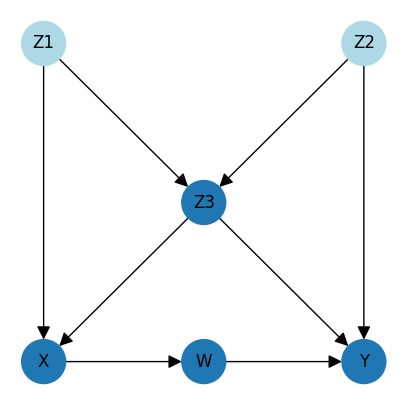

In [26]:
dag.draw()

In [38]:
set(all_missing_edges)

{('Z1', 'W'), ('Z1', 'Y'), ('Z2', 'W')}

In [25]:
valid, missing = causal_model_test._validate_missing_edges(override_missing_edges=[('Z1', 'W')])

ic| expression: 'W ⫫ Z1, Z2, Z3 | X'
ic| expression: 'X ⫫ Z2 | Z1, Z3'
ic| expression: 'Y ⫫ X, Z1 | W, Z2, Z3'
ic| expression: 'Z1 ⫫ Z2'


In [26]:
missing

[]

In [41]:
dag.v_structures(strong=False)

[{'W': 'treatment', 'Y': 'collider', 'Z2': 'outcome'},
 {'W': 'treatment', 'Y': 'collider', 'Z3': 'outcome'},
 {'Z1': 'treatment', 'Z3': 'collider', 'Z2': 'outcome'}]

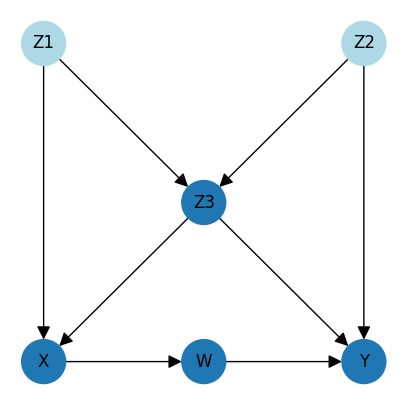

In [22]:
dag.draw()

In [23]:
dag.non_descendants("Y")

['Z1', 'X']

In [24]:
data = causal_model.data
np.corrcoef(data[["W", "Z3", "Z2", "X", "Z1"]].T, data["Z2"])[0, 1]

0.9346533816470367

In [25]:
is_dependent_on_unconditioned, errors, ols_results = causal_model.data.dependence(expression=f"Z1 ⫫̸ Y")
is_dependent_on_unconditioned

ic| expression: 'Z1 ⫫̸ Y'


True

In [26]:
causal_model.dag.is_adjacent("Y", "Z1")

False

In [27]:
causal_model._validate_missing_edges()

ic| expression: 'W ⫫ Z1, Z2, Z3 | X'
ic| expression: 'X ⫫ Z2 | Z1, Z3'
ic| expression: 'Y ⫫ X, Z1 | W, Z2, Z3'
ic| expression: 'Z1 ⫫ Z2'


(True, [])

In [28]:
causal_model._validate_spurious_edges()

ic| expression: 'W ⫫̸ X'
ic| expression: 'X ⫫̸ Z1, Z3'
ic| expression: 'Y ⫫̸ W, Z2, Z3'
ic| expression: 'Z3 ⫫̸ Z1, Z2'


(False, [('Z2', 'Y')])

In [29]:
is_dependent_on_conditioned, errors, ols_results = causal_model.data.dependence(expression=f"Z3 ⫫̸ Z1, Z2")

ic| expression: 'Z3 ⫫̸ Z1, Z2'


In [30]:
is_dependent_on_conditioned, errors, ols_results = causal_model.data.dependence(expression=f"Y ⫫̸ W, Z2, Z3")

ic| expression: 'Y ⫫̸ W, Z2, Z3'


In [31]:
is_dependent_on_conditioned

False

In [32]:
causal_model.data[["W", "Z2", "Z3"]]

W       Z2        Z3
0   115.415586 0.441614 12.794091
1    82.681145 1.647342  4.678797
2   193.360262 1.659767 16.349857
3   -49.231954 4.437415 -5.416621
4   171.713442 4.348612 16.867327
..         ...      ...       ...
995  79.602500 5.904063  5.465877
996  89.867887 4.212665  9.212642
997 121.876436 3.740065  9.770078
998  85.694711 2.445267  8.361504
999 -38.875584 2.138615 -3.886084

[1000 rows x 3 columns]

In [33]:
#r = np.corrcoef(self[X], self[Y])[0, 1]

In [34]:
x = np.corrcoef(causal_model.data[["W", "Z2", "Z3"]].T, causal_model.data["Y"])
x[0,1]

-0.40824726811627415

In [35]:
import numpy as np
import pandas as pd

# Assuming 'causal_model.data' is a pandas DataFrame containing variables Y, W, Z2, and Z3

# Extract the predictor variables (W, Z2, Z3) and the outcome variable (Y)
x = causal_model.data[["W", "Z2", "Z3"]]
y = causal_model.data["Y"]

# Calculate overall correlation coefficient between x and y
overall_corr = np.corrcoef(x.T, y)[0, 1]

# Calculate partial correlation coefficients
partial_corrs = []
for column in x.columns:
    # Exclude the current predictor variable from x
    x_partial = x.drop(columns=column)
    
    # Calculate partial correlation coefficient between the current predictor and y
    partial_corr = np.corrcoef(x_partial.T, y)[0, 1]
    
    # Store the partial correlation coefficient
    partial_corrs.append(partial_corr)

# Calculate individual contributions
individual_contributions = [overall_corr - partial_corr for partial_corr in partial_corrs]

print("Overall correlation coefficient:", overall_corr)
print("Partial correlation coefficients:", partial_corrs)
print("Individual contributions:", individual_contributions)



Overall correlation coefficient: -0.40824726811627415
Partial correlation coefficients: [-0.5026961169519198, 0.9346533816470367, -0.40824726811627415]
Individual contributions: [0.0944488488356457, -1.342900649763311, 0.0]


In [36]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Assuming 'causal_model.data' is a pandas DataFrame containing variables Y, W, Z2, and Z3

# Extract the predictor variables (W, Z2, Z3) and the outcome variable (Y)
x = causal_model.data[["W", "Z2", "Z3"]]
y = causal_model.data["Y"]

# Initialize a linear regression model
model = LinearRegression()

# Fit the model
model.fit(x, y)

# Calculate the overall correlation coefficient between x and y
overall_corr = np.corrcoef(x.T, y)[0, 1]

# Calculate the coefficients of determination (R-squared) for the full model
r_squared = model.score(x, y)

# Calculate individual contributions
individual_contributions = model.coef_ * (1 - overall_corr)

print("Overall correlation coefficient:", overall_corr)
print("R-squared (overall):", r_squared)
print("Individual contributions:", individual_contributions)


Overall correlation coefficient: -0.40824726811627415
R-squared (overall): 0.9405897724903413
Individual contributions: [ 2.79932526  0.94312697 -4.54735496]


In [37]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Assuming 'causal_model.data' is a pandas DataFrame containing variables Y, W, Z2, and Z3

# Extract the predictor variables (W, Z2, Z3) and the outcome variable (Y)
x = causal_model.data[["W", "Z2", "Z3", "Z1"]]
y = causal_model.data["Y"]

# Initialize a linear regression model
model = LinearRegression()

# Fit the model
model.fit(x, y)

# Calculate the overall correlation coefficient between x and y
overall_corr = np.corrcoef(x.T, y)[0, 1]

# Calculate the coefficients of determination (R-squared) for the full model
r_squared = model.score(x, y)

# Calculate individual contributions
individual_contributions = model.coef_ * (1 - overall_corr)

# Normalize individual contributions to ensure they fall within [-1, 1]
max_abs_contribution = np.max(np.abs(individual_contributions))
individual_contributions /= max_abs_contribution

print("Overall correlation coefficient:", overall_corr)
print("R-squared (overall):", r_squared)
print("Individual contributions:", individual_contributions)


Overall correlation coefficient: -0.40824726811627415
R-squared (overall): 0.9405915016710777
Individual contributions: [ 0.60093099  0.16377046 -1.          0.08452276]


In [38]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Assuming 'causal_model.data' is a pandas DataFrame containing variables Y, W, Z2, and Z3

# Extract the predictor variables (W, Z2, Z3) and the outcome variable (Y)
x = causal_model.data[["W", "Z2", "Z3"]]
y = causal_model.data["Y"]

# Initialize a linear regression model
model = LinearRegression()

# Fit the model
model.fit(x, y)

# Calculate the overall correlation coefficient between x and y
overall_corr = np.corrcoef(x.T, y)[0, 1]

# Calculate the coefficients of determination (R-squared) for the full model
r_squared = model.score(x, y)

# Calculate individual contributions
individual_contributions = model.coef_ * (1 - overall_corr)

# Set a threshold for significance relative to the overall correlation coefficient
threshold = 0.5  # Adjust as needed

# Determine significant contributors
significant_contributors = np.where(np.abs(individual_contributions) > threshold * np.abs(overall_corr))[0]

print("Overall correlation coefficient:", overall_corr)
print("R-squared (overall):", r_squared)
print("Individual contributions:", individual_contributions)
print("Significant contributors:", significant_contributors)


Overall correlation coefficient: -0.40824726811627415
R-squared (overall): 0.9405897724903413
Individual contributions: [ 2.79932526  0.94312697 -4.54735496]
Significant contributors: [0 1 2]


In [39]:
import numpy as np
import statsmodels.api as sm

# True coefficients of the equation Y = 2 * W + 2 * Z2 - 3 * Z3
true_coefficients = {"W": 2, "Z2": 2, "Z3": -3}

# Assuming 'causal_model.data' is a pandas DataFrame containing variables Y, W, Z2, and Z3

# Extract the predictor variables (W, Z2, Z3) and the outcome variable (Y)
x = causal_model.data[["W", "Z2", "Z3"]]
y = causal_model.data["Y"]

# Add a constant term to the predictors for the intercept
x = sm.add_constant(x)

# Fit the OLS regression model
model = sm.OLS(y, x).fit()

# Compute the correlation coefficient (R) for the full model
y_pred = model.predict(x)
r_full = np.corrcoef(y, y_pred)[0, 1]

# Compute the correlation coefficient (R) for each reduced model (with one predictor removed)
r_reduced = []
for column in x.columns[1:]:  # Exclude the intercept
    x_reduced = x.drop(columns=column)
    model_reduced = sm.OLS(y, x_reduced).fit()
    y_pred_reduced = model_reduced.predict(x_reduced)
    r_reduced.append(np.corrcoef(y, y_pred_reduced)[0, 1])

# Calculate the contribution of each variable to the overall R
contributions = [r_full - r for r in r_reduced]

# Map variable names to their contributions
variable_contributions = dict(zip(x.columns[1:], contributions))

print("Variable contributions to R:")
for variable, contribution in variable_contributions.items():
    print(f"{variable}: {contribution:.4f}")

# Compare with the true coefficients
print("\nTrue Coefficients:")
for variable, true_coefficient in true_coefficients.items():
    print(f"{variable}: {true_coefficient}")


Variable contributions to R:
W: 0.0877
Z2: 0.0001
Z3: 0.0022

True Coefficients:
W: 2
Z2: 2
Z3: -3


In [40]:
import numpy as np
import statsmodels.api as sm

# True coefficients of the equation Y = 2 * W + 2 * Z2 - 3 * Z3
true_coefficients = {"W": 2, "Z2": 2, "Z3": -3}

# Assuming 'causal_model.data' is a pandas DataFrame containing variables Y, W, Z2, and Z3

# Extract the predictor variables (W, Z2, Z3) and the outcome variable (Y)
x = causal_model.data[["W", "Z2", "Z3"]]
y = causal_model.data["Y"]

# Add a constant term to the predictors for the intercept
x = sm.add_constant(x)

# Fit the OLS regression model
model = sm.OLS(y, x).fit()

# Compute the correlation coefficient (R) for the full model
y_pred = model.predict(x)
r_full = np.corrcoef(y, y_pred)[0, 1]

# Compute the correlation coefficient (R) for each reduced model (with one predictor removed)
r_reduced = []
for column in x.columns[1:]:  # Exclude the intercept
    x_reduced = x.drop(columns=column)
    model_reduced = sm.OLS(y, x_reduced).fit()
    y_pred_reduced = model_reduced.predict(x_reduced)
    r_reduced.append(np.corrcoef(y, y_pred_reduced)[0, 1])

# Calculate the contribution of each variable to the overall R
contributions = [r_full - r for r in r_reduced]

# Normalize the contributions by the standard deviations of the variables
std_devs = x.std()
normalized_contributions = contributions / std_devs[1:]  # Exclude the intercept

# Map variable names to their contributions
variable_contributions = dict(zip(x.columns[1:], normalized_contributions))

print("Variable contributions to R:")
for variable, contribution in variable_contributions.items():
    print(f"{variable}: {contribution:.4f}")

# Compare with the true coefficients
print("\nTrue Coefficients:")
for variable, true_coefficient in true_coefficients.items():
    print(f"{variable}: {true_coefficient}")


Variable contributions to R:
W: 0.0015
Z2: 0.0000
Z3: 0.0004

True Coefficients:
W: 2
Z2: 2
Z3: -3


In [41]:
import statsmodels.api as sm

# True coefficients of the equation Y = 2 * W + 2 * Z2 - 3 * Z3
true_coefficients = {"W": 2, "Z2": 2, "Z3": -3}

# Assuming 'causal_model.data' is a pandas DataFrame containing variables Y, W, Z2, and Z3

# Extract the predictor variables (W, Z2, Z3) and the outcome variable (Y)
x = causal_model.data[["W", "Z2", "Z3"]]
y = causal_model.data["Y"]

# Add a constant term to the predictors for the intercept
x = sm.add_constant(x)

# Fit the OLS regression model
model = sm.OLS(y, x).fit()

# Get the coefficients from the regression model
coefficients = model.params[1:]  # Exclude the intercept

# Compare with the true coefficients
print("Coefficients from the regression model:")
print(coefficients)

print("\nTrue Coefficients:")
for variable, true_coefficient in true_coefficients.items():
    print(f"{variable}: {true_coefficient}")


Coefficients from the regression model:
W     1.987808
Z2    0.669717
Z3   -3.229088
dtype: float64

True Coefficients:
W: 2
Z2: 2
Z3: -3


In [42]:
ols_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     5256.
Date:                Mon, 12 Feb 2024   Prob (F-statistic):               0.00
Time:                        14:42:06   Log-Likelihood:                -4601.5
No. Observations:                1000   AIC:                             9211.
Df Residuals:                     996   BIC:                             9231.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.3967      2.636      2.806      0.005       2.225      12.569
W              1.9878      0.038     52.181      0.000       1.913       2.063
Z2             0.6697      0.466      1.438      0.151      -0.244       1.584
Z3            -3.2291      0.383     -8.440      0.000      -3.980      -2.478
==============================================================================
Omnibus:                        1.069   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.586   Jarque-Bera (JB):                0.952
Skew:                           0.016   Prob(JB):                        0.621
Kurtosis:                       3.148   Cond. No.                         404.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
overall_corr

-0.40824726811627415

In [44]:
model.coef_

AttributeError: 'OLSResults' object has no attribute 'coef_'

In [ ]:
w_z2_z3 = np.corrcoef(causal_model.data[["W", "Z2", "Z3"]].T, causal_model.data["Y"])[0, 1]
print(w_z2_z3)

w_z2 = np.corrcoef(causal_model.data[["W", "Z2"]].T, causal_model.data["Y"])[0, 1]
print(w_z2)

-0.40824726811627415
-0.40824726811627415


In [ ]:
import statsmodels.api as sm

# Assuming 'causal_model.data' is a pandas DataFrame containing variables Y, W, Z2, and Z3

# Extract the predictor variables (W, Z2, Z3) and the outcome variable (Y)
x = causal_model.data[["W", "Z2", "Z3"]]
y = causal_model.data["Y"]

# Add a constant term to the predictors for the intercept
x = sm.add_constant(x)

# Fit the OLS regression model
model = sm.OLS(y, x).fit()

# Compute the R-squared value for the full model
r_squared_full = model.rsquared

# Compute the R-squared values for each reduced model (with one predictor removed)
r_squared_reduced = []
for column in x.columns[1:]:  # Exclude the intercept
    x_reduced = x.drop(columns=column)
    model_reduced = sm.OLS(y, x_reduced).fit()
    r_squared_reduced.append(model_reduced.rsquared)

# Calculate the contribution of each variable to the overall R-squared
contributions = [r_squared_full - r_squared for r_squared in r_squared_reduced]

# Map variable names to their contributions
variable_contributions = dict(zip(x.columns[1:], contributions))

print("Variable contributions to R-squared:")
for variable, contribution in variable_contributions.items():
    print(f"{variable}: {contribution:.4f}")


Variable contributions to R-squared:
W: 0.1624
Z2: 0.0001
Z3: 0.0042


In [45]:
import statsmodels.api as sm

# Assuming 'causal_model.data' is a pandas DataFrame containing variables Y, W, Z2, and Z3

# Extract the predictor variables (W, Z2, Z3) and the outcome variable (Y)
x = causal_model.data[["W", "Z2", "Z3"]]
y = causal_model.data["Y"]

# Add a constant term to the predictors for the intercept
x = sm.add_constant(x)

# Fit the OLS regression model
model = sm.OLS(y, x).fit()

# Compute the R-squared value for the full model
r_squared_full = model.rsquared

# Compute the R-squared values for each reduced model (with one predictor removed)
r_squared_reduced = []
for column in x.columns[1:]:  # Exclude the intercept
    x_reduced = x.drop(columns=column)
    model_reduced = sm.OLS(y, x_reduced).fit()
    r_squared_reduced.append(model_reduced.rsquared)

# Calculate the contribution of each variable to the overall R-squared
contributions_squared = [r_squared_full - r_squared for r_squared in r_squared_reduced]

# Take square roots to get the contributions to the overall R
contributions = [np.sqrt(contribution_squared) for contribution_squared in contributions_squared]

# Map variable names to their contributions
variable_contributions = dict(zip(x.columns[1:], contributions))

print("Variable contributions to R:")
for variable, contribution in variable_contributions.items():
    print(f"{variable}: {contribution:.4f}")


Variable contributions to R:
W: 0.4030
Z2: 0.0111
Z3: 0.0652


In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

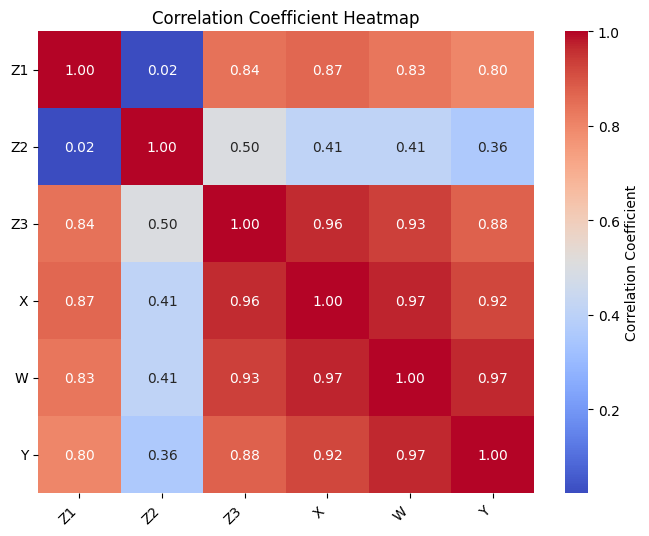

In [58]:
def display_corr_matrix(data: pd.DataFrame) -> None:
    # Calculate correlation coefficients
    #corr_matrix = abs(np.corrcoef(data, rowvar=False))

    scaled_data = pd.DataFrame(StandardScaler().fit_transform(data), columns=data.columns)
    corr_matrix = abs(scaled_data.corr())

    # Create a heatmap plot using seaborn
    plt.figure(figsize=(8, 6))
    heatmap = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar_kws={'label': 'Correlation Coefficient'})

    heatmap.set_xticklabels(data.columns, rotation=45, ha='right')
    heatmap.set_yticklabels(data.columns, rotation=0)

    plt.title('Correlation Coefficient Heatmap')
    plt.show()

#display_corr_matrix(causal_model.data[["Y", "W", "Z2", "Z3"]])
display_corr_matrix(causal_model.data)

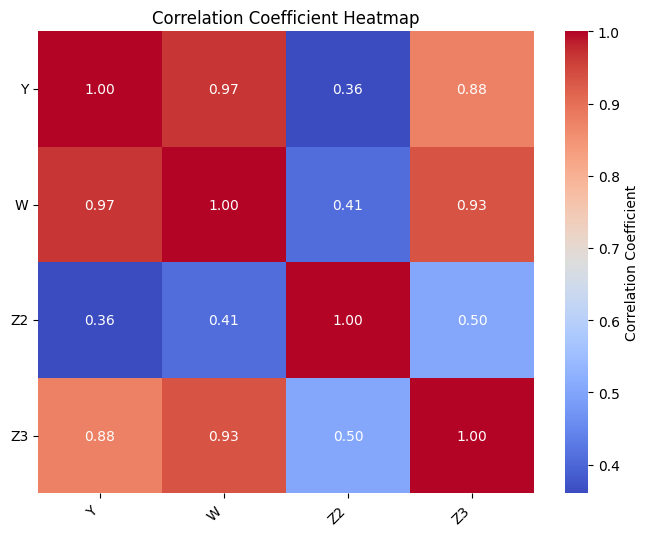

In [51]:
display_corr_matrix(causal_model.data[["Y", "W", "Z2", "Z3"]])

In [52]:
ols_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     5256.
Date:                Mon, 12 Feb 2024   Prob (F-statistic):               0.00
Time:                        08:01:27   Log-Likelihood:                -4601.5
No. Observations:                1000   AIC:                             9211.
Df Residuals:                     996   BIC:                             9231.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.3967      2.636      2.806      0.005       2.225      12.569
W              1.9878      0.038     52.181      0.000       1.913       2.063
Z2             0.6697      0.466      1.438      0.151      -0.244       1.584
Z3            -3.2291      0.383     -8.440      0.000      -3.980      -2.478
==============================================================================
Omnibus:                        1.069   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.586   Jarque-Bera (JB):                0.952
Skew:                           0.016   Prob(JB):                        0.621
Kurtosis:                       3.148   Cond. No.                         404.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
0.941**0.5

0.970051545022222

In [37]:
x

array([[ 1.        ,  0.96689349, -0.3598717 ,  0.87714192],
       [ 0.96689349,  1.        , -0.40824727,  0.93465338],
       [-0.3598717 , -0.40824727,  1.        , -0.50269612],
       [ 0.87714192,  0.93465338, -0.50269612,  1.        ]])

In [31]:
ols_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     5256.
Date:                Mon, 12 Feb 2024   Prob (F-statistic):               0.00
Time:                        07:32:23   Log-Likelihood:                -4601.5
No. Observations:                1000   AIC:                             9211.
Df Residuals:                     996   BIC:                             9231.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.3967      2.636      2.806      0.005       2.225      12.569
W              1.9878      0.038     52.181      0.000       1.913       2.063
Z2             0.6697      0.466      1.438      0.151      -0.244       1.584
Z3            -3.2291      0.383     -8.440      0.000      -3.980      -2.478
==============================================================================
Omnibus:                        1.069   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.586   Jarque-Bera (JB):                0.952
Skew:                           0.016   Prob(JB):                        0.621
Kurtosis:                       3.148   Cond. No.                         404.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
causal_model._pearlean_validate_reversed_edges()

ic| expression: 'Z2 ⫫ W'
ic| expression: 'W ⫫ Z2'
ic| expression: 'Z2 ⫫̸ W | Y'
ic| expression: 'W ⫫̸ Z2 | Y'
ic| expression: 'Z3 ⫫ W'
ic| expression: 'W ⫫ Z3'
ic| expression: 'Z3 ⫫̸ W | Y'
ic| expression: 'W ⫫̸ Z3 | Y'
ic| expression: 'Z1 ⫫ W'
ic| expression: 'W ⫫ Z1'
ic| expression: 'Z1 ⫫̸ W | X'
ic| expression: 'W ⫫̸ Z1 | X'
ic| expression: 'Z3 ⫫ W'
ic| expression: 'W ⫫ Z3'
ic| expression: 'Z3 ⫫̸ W | X'
ic| expression: 'W ⫫̸ Z3 | X'
ic| expression: 'Z2 ⫫ Z1'
ic| expression: 'Z1 ⫫ Z2'
ic| expression: 'Z2 ⫫̸ Z1 | Z3'
ic| expression: 'Z1 ⫫̸ Z2 | Z3'
ic| expression: 'Z2 ⫫ Z1'
ic| expression: 'Z1 ⫫ Z2'
ic| expression: 'Z2 ⫫̸ Z1 | Z3'
ic| expression: 'Z1 ⫫̸ Z2 | Z3'
ic| expression: 'Z2 ⫫ W'
ic| expression: 'W ⫫ Z2'
ic| expression: 'Z2 ⫫̸ W | Y'
ic| expression: 'W ⫫̸ Z2 | Y'
ic| expression: 'Z2 ⫫ X'
ic| expression: 'X ⫫ Z2'
ic| expression: 'Z2 ⫫̸ X | Z3'
ic| expression: 'X ⫫̸ Z2 | Z3'


True

In [ ]:
# TODO: Z1 -> Z3 -> Y looks like a collider - why is that?
# TODO: Also check out Y ⫫ X => OK, Y ⫫̸ X => OK and Y ⫫̸ X | W => does not look right
# BUT ... we are very nearly there with this!!!!!!!

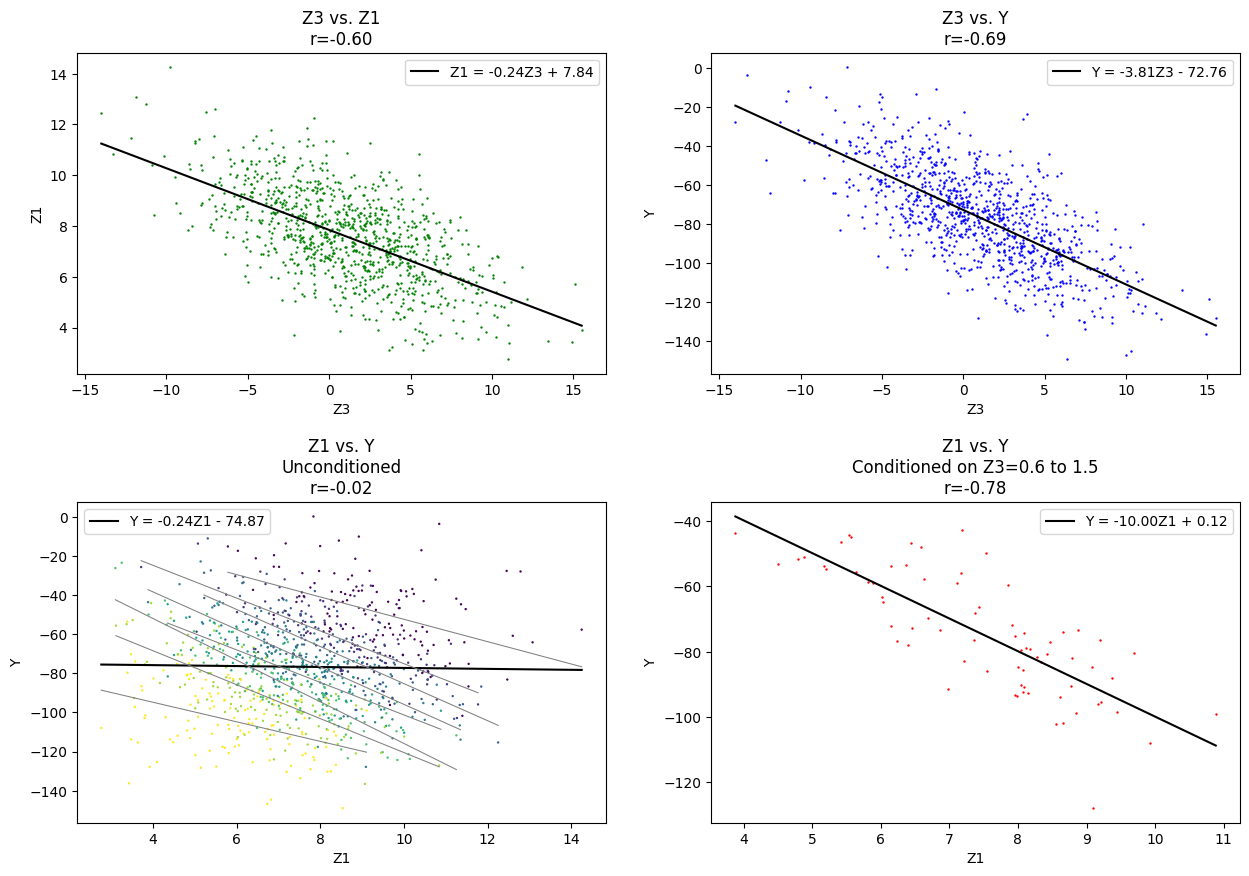

In [23]:
causal_model.scatter_junction({'Z1': 'treatment', 'Z3': 'chain', 'Y': 'outcome'})

In [27]:
is_independent_on_unconditioned, _, ols_results = causal_model.data.dependence(expression=f"Z1 ⫫ Z2")
is_independent_on_unconditioned

ic| expression: 'Z1 ⫫ Z2'


True

In [35]:
is_dependent_on_conditioned, _, ols_results = causal_model.data.dependence(expression=f"Z1 ⫫̸ Z2 | Z3")
is_dependent_on_conditioned


ic| expression: 'Z1 ⫫̸ Z2 | Z3'


True

In [30]:
is_independent_on_unconditioned, _, ols_results = causal_model.data.dependence(expression=f"Y ⫫ X")
is_independent_on_unconditioned

ic| expression: 'Y ⫫ X'


False

In [33]:
is_independent_on_unconditioned, _, ols_results = causal_model.data.dependence(expression=f"Y ⫫̸ X")
is_independent_on_unconditioned

ic| expression: 'Y ⫫̸ X'


True

In [49]:
from itertools import combinations, product

for x in product(["a"], ["b"]):
    print(x)


('a', 'b')


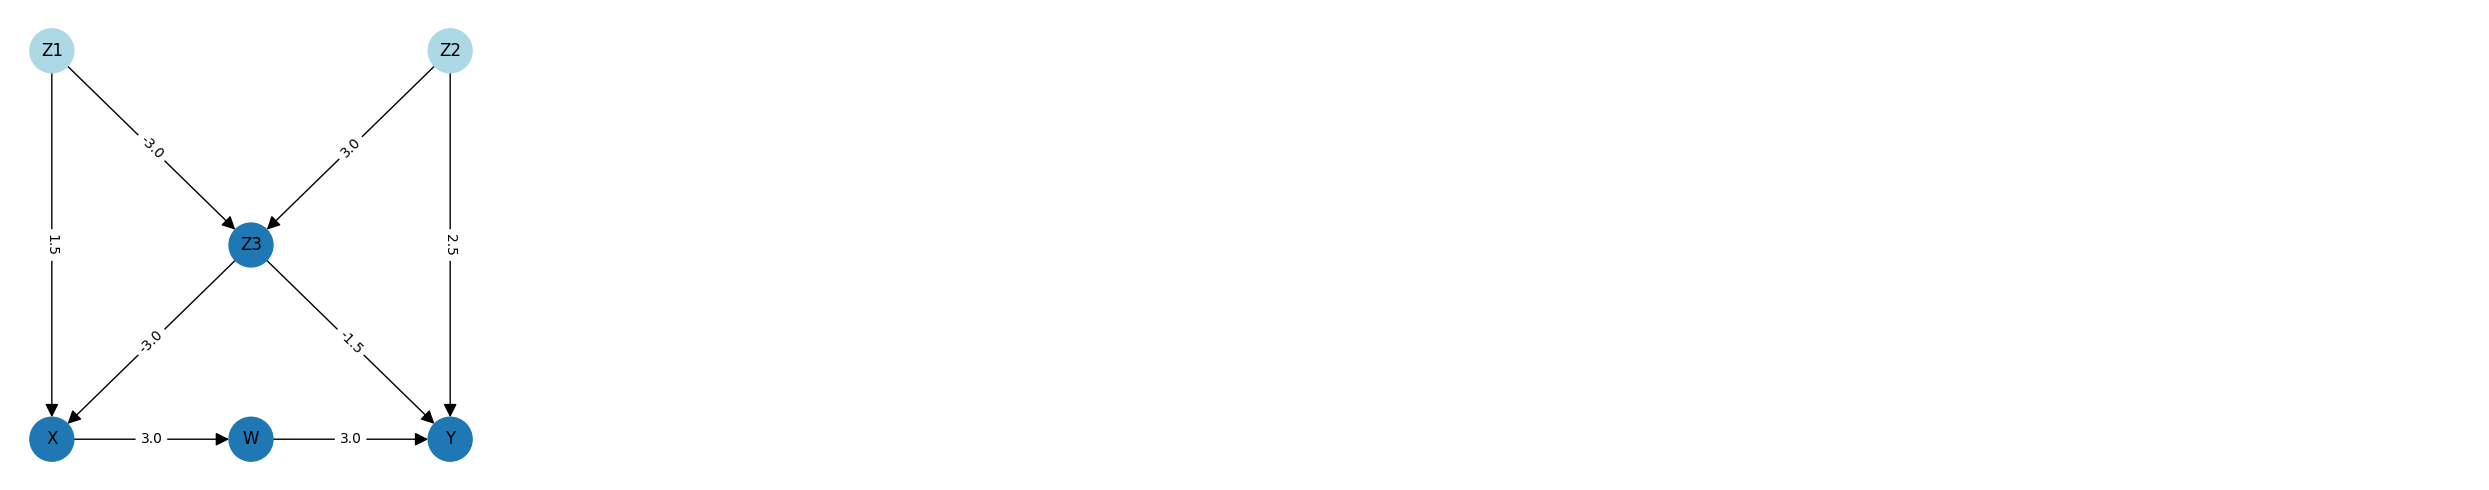

In [23]:
dag.draw(grid_size=5, labels=causal_model.edge_weightings)

In [21]:
causal_model.dag.edges

[('W', 'Y'),
 ('X', 'W'),
 ('Z1', 'X'),
 ('Z1', 'Z3'),
 ('Z2', 'Y'),
 ('Z2', 'Z3'),
 ('Z3', 'X'),
 ('Z3', 'Y')]

('W', 'Y')
created_v_structure: {'X': 'treatment', 'W': 'collider', 'Y': 'outcome'}
old_method_identified_in_data: False
new_method_identified_in_data: False
destroyed_v_structures: {'W': 'treatment', 'Y': 'collider', 'Z2': 'outcome'}
old_method_identified_in_data: True
new_method_identified_in_data: True
destroyed_v_structures: {'W': 'treatment', 'Y': 'collider', 'Z3': 'outcome'}
old_method_identified_in_data: True
new_method_identified_in_data: True
True


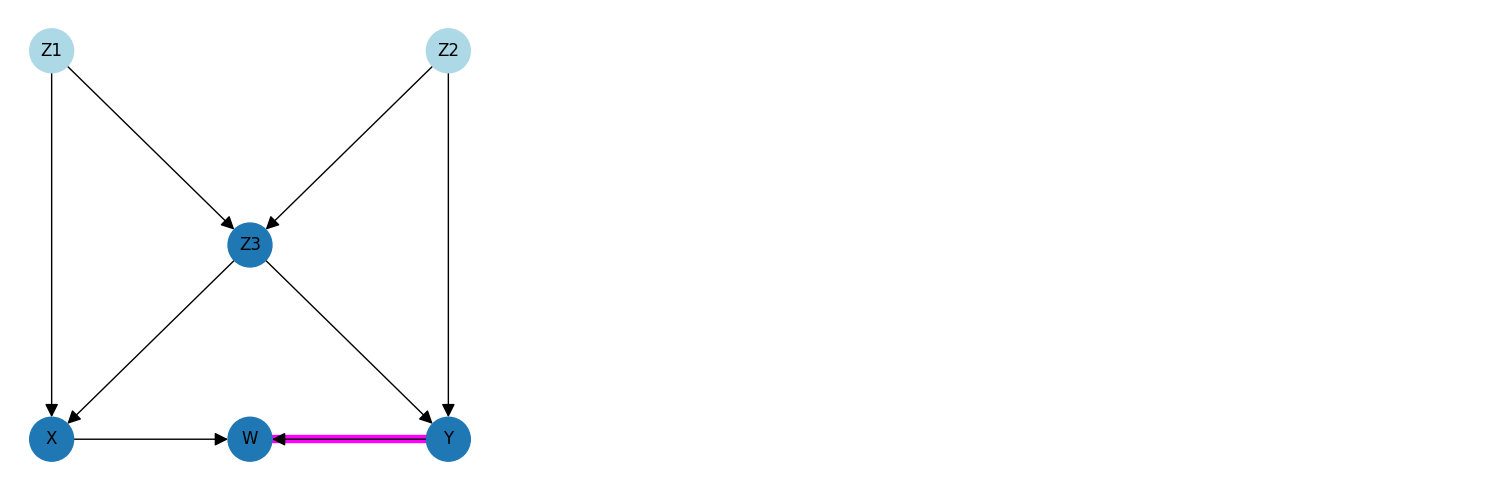

In [22]:
ic.disable()

for i, edge in enumerate(causal_model.dag.edges):

    if i != 0:
        continue

    print(edge)

    new_dag = causal_model.dag.reverse_edges([edge]) # Create a new DAG that is identical to the current DAG except the selected edge is reversed

    if not new_dag.is_acyclic: # If the edge reversal has created a graph that is not acyclic the current edge must be in the correct direction and no further tests are necessary
        continue

    new_dag.draw_paths(paths=[new_dag.edge_to_path(edge)])

    # A new v-structure has been created by reversing the edge. If that v-structure exists in the data then the edge is wrong in the current DAG and hence the DAG is invalid
    for created_v_structure in causal_model.dag.created_v_structures(new_dag=new_dag):
        print(f"created_v_structure: {created_v_structure}")

        old_method_identified_in_data = causal_model._collider_identified_in_data(collider_path_in_dag=created_v_structure, dag=new_dag)
        new_method_identified_in_data = causal_model._v_structure_identified_in_data(v_structure_path_in_dag=created_v_structure)

        print(f"old_method_identified_in_data: {old_method_identified_in_data}")
        print(f"new_method_identified_in_data: {new_method_identified_in_data}")
        #if causal_model._collider_identified_in_data(collider_path_in_dag=created_v_structure, dag=new_dag):
        if causal_model._v_structure_identified_in_data(v_structure_path_in_dag=created_v_structure):
            print("False")
            break

    # An existing v-structure has been destroyed by reversing the edge. If that v-structure does not exist in the data then the edge is wrong in the current DAG and hence the DAG is invalid
    for destroyed_v_structures in causal_model.dag.destroyed_v_structures(new_dag=new_dag):
        print(f"destroyed_v_structures: {destroyed_v_structures}")

        old_method_identified_in_data =  causal_model._collider_identified_in_data(collider_path_in_dag=destroyed_v_structures, dag=causal_model.dag)
        new_method_identified_in_data = causal_model._v_structure_identified_in_data(v_structure_path_in_dag=destroyed_v_structures)

        print(f"old_method_identified_in_data: {old_method_identified_in_data}")
        print(f"new_method_identified_in_data: {new_method_identified_in_data}")

        # if not causal_model._collider_identified_in_data(collider_path_in_dag=destroyed_v_structures, dag=self.dag):
        if not causal_model._v_structure_identified_in_data(v_structure_path_in_dag=destroyed_v_structures):
            print(False)
            break

    print("True")
    break
ic.enable()

In [25]:
for path in new_dag.all_paths():
    print(f"{path}, is_connected: {dag._is_d_connected(dag._condition_path(path, []))}")

{'W': 'treatment', 'Y': 'collider', 'Z3': 'outcome'}, is_connected: False
{'W': 'treatment', 'Y': 'collider', 'Z2': 'fork', 'Z3': 'outcome'}, is_connected: False
{'W': 'treatment', 'X': 'chain', 'Z1': 'fork', 'Z3': 'outcome'}, is_connected: True
{'W': 'treatment', 'X': 'chain', 'Z3': 'outcome'}, is_connected: True


In [29]:
new_dag.is_connected("Z1", "Z2")

False

In [32]:
for possible_link in list(combinations(sorted(new_dag.nodes) ,2)):
    print(f"nodes: {possible_link}, is_connected: {new_dag.is_connected(possible_link[0], possible_link[1])}")


nodes: ('W', 'X'), is_connected: True
nodes: ('W', 'Y'), is_connected: True
nodes: ('W', 'Z1'), is_connected: True
nodes: ('W', 'Z2'), is_connected: True
nodes: ('W', 'Z3'), is_connected: True
nodes: ('X', 'Y'), is_connected: True
nodes: ('X', 'Z1'), is_connected: True
nodes: ('X', 'Z2'), is_connected: True
nodes: ('X', 'Z3'), is_connected: True
nodes: ('Y', 'Z1'), is_connected: True
nodes: ('Y', 'Z2'), is_connected: True
nodes: ('Y', 'Z3'), is_connected: True
nodes: ('Z1', 'Z2'), is_connected: False
nodes: ('Z1', 'Z3'), is_connected: True
nodes: ('Z2', 'Z3'), is_connected: True


Directed Acyclic Graph ...


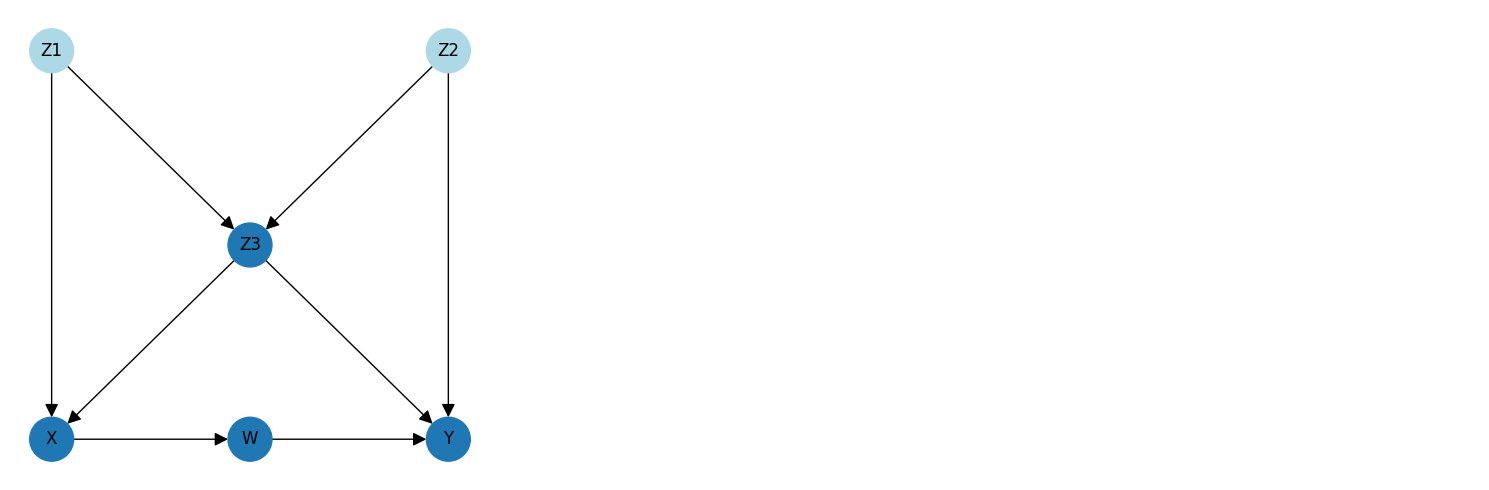

Backdoor paths ...


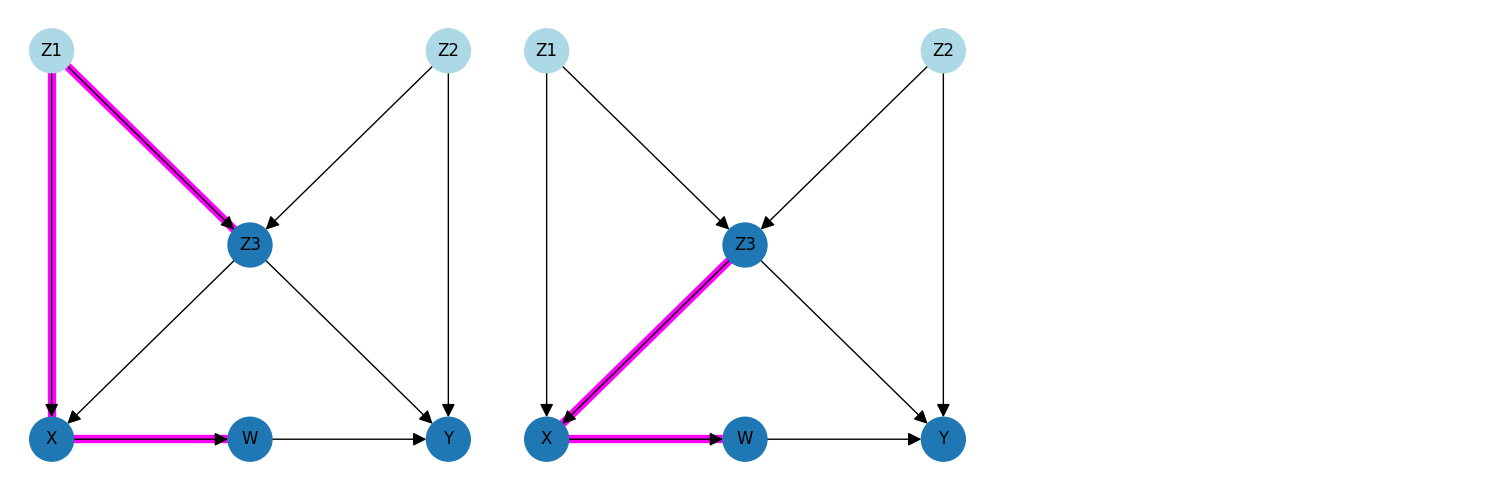

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Frontdoor paths ...


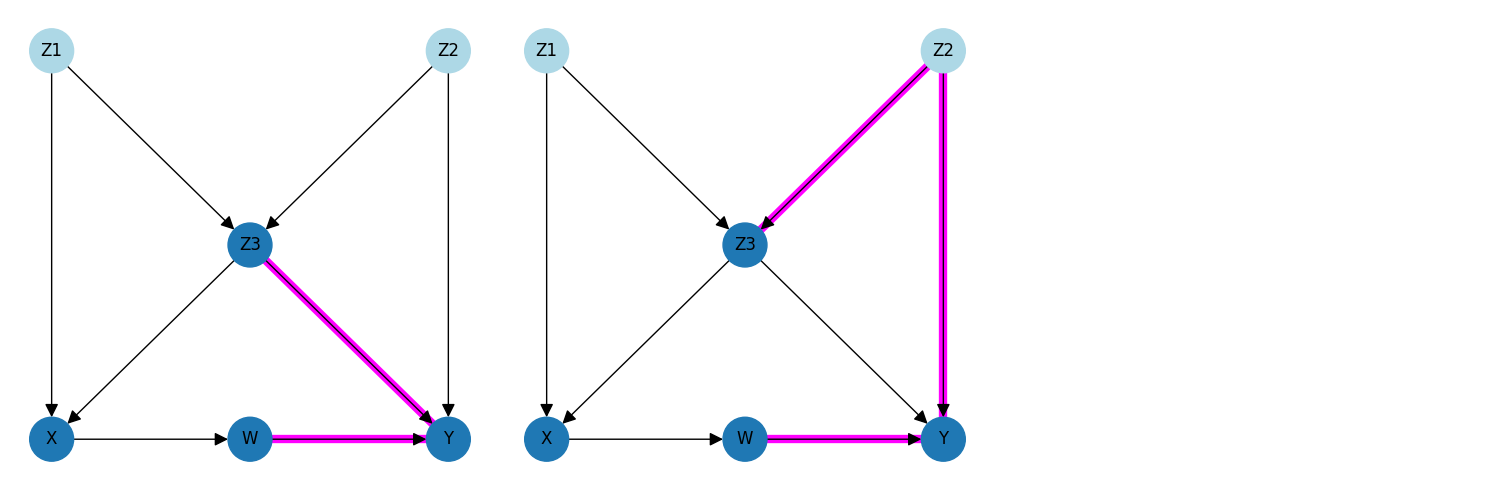

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Valid adjustment sets ...
[['X', 'Y'], ['X', 'Y', 'Z1'], ['X', 'Y', 'Z2'], ['X', 'Y', 'Z1', 'Z2']]


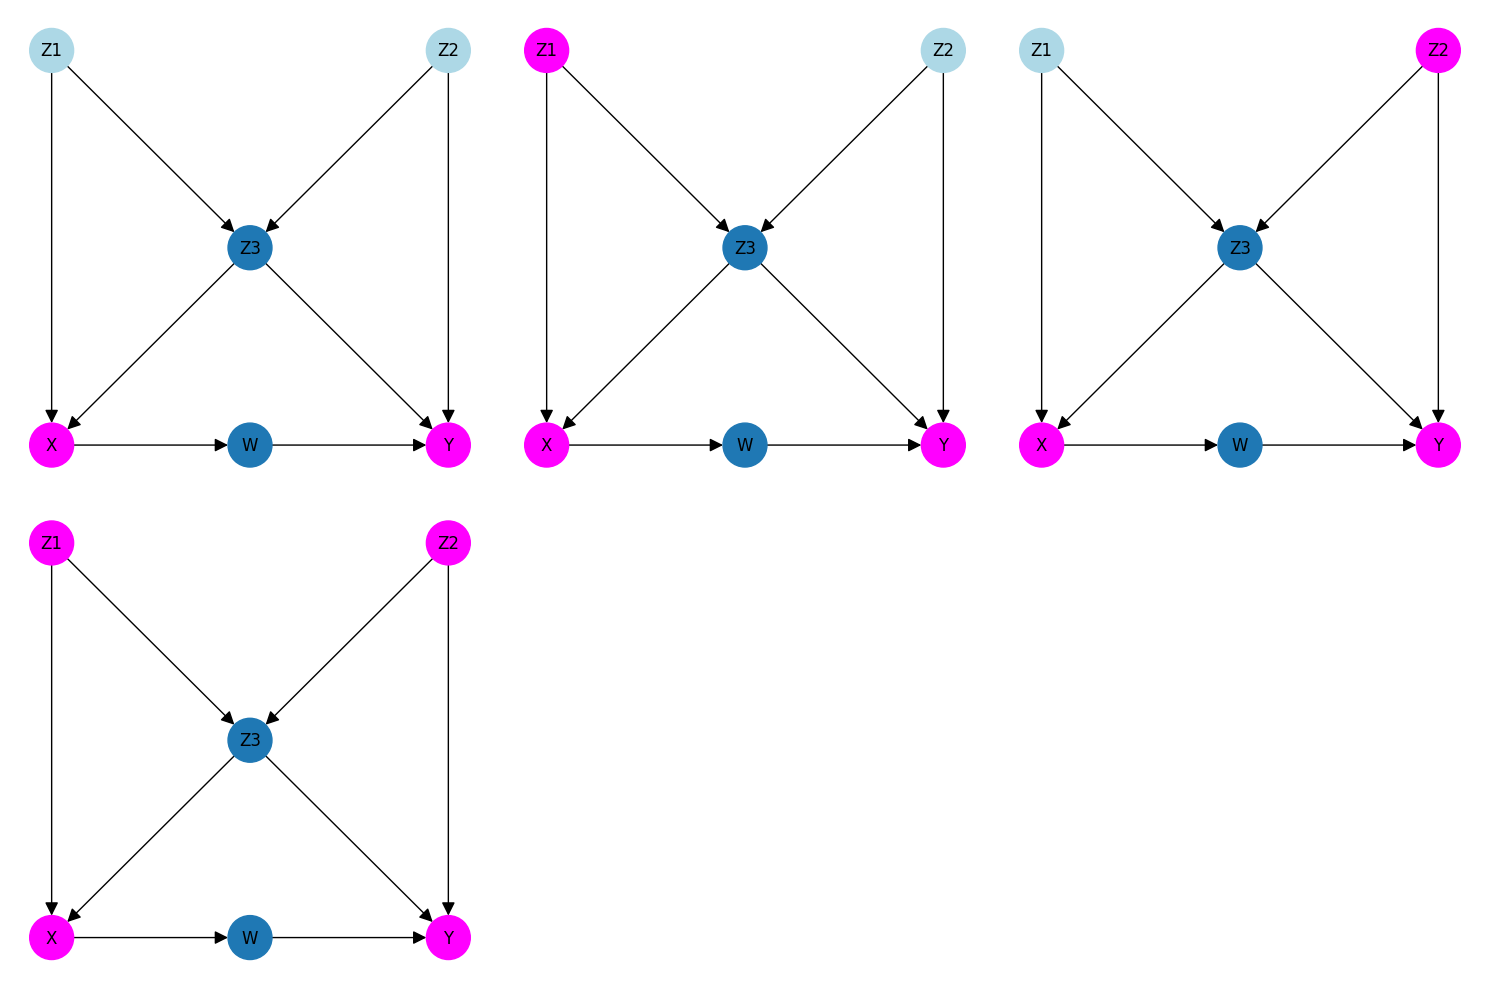

Optimal adjustment set
['X', 'Y']


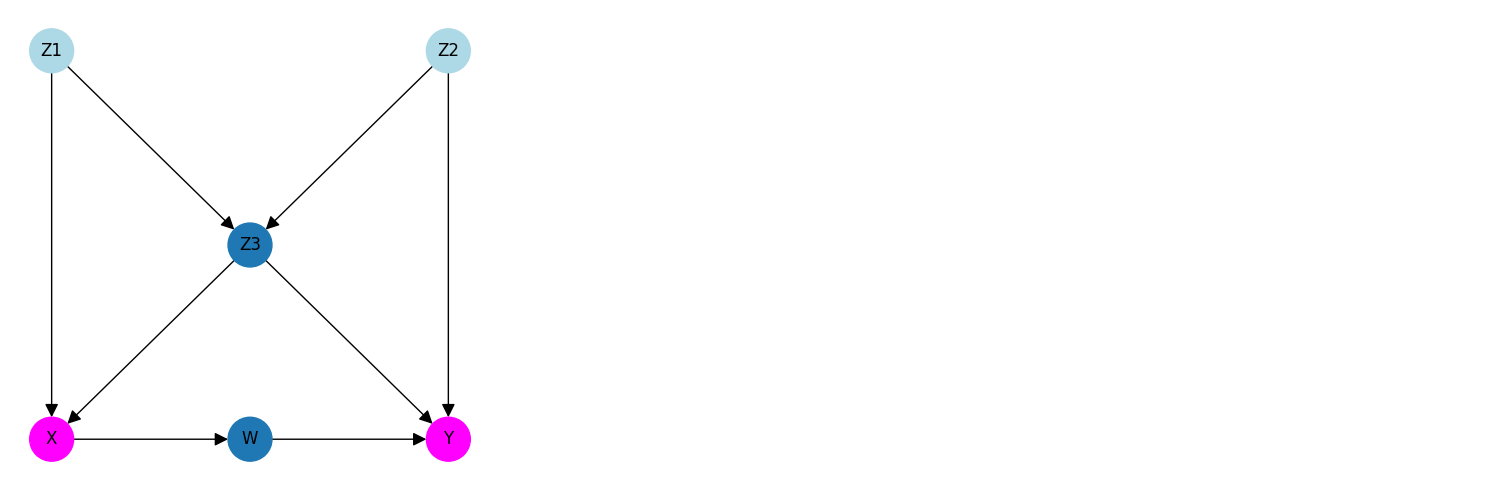

Unconditionally dependent? True
Unconditionally independent? False
Conditionally dependent? True
Conditionally independent? True

patern: backdoor



In [24]:
new_dag: DirectedAcyclicGraph = DirectedAcyclicGraph(treatment="W", outcome="Z3", edges = dag.edges, pos=dag.pos)
new_dag.analyse()

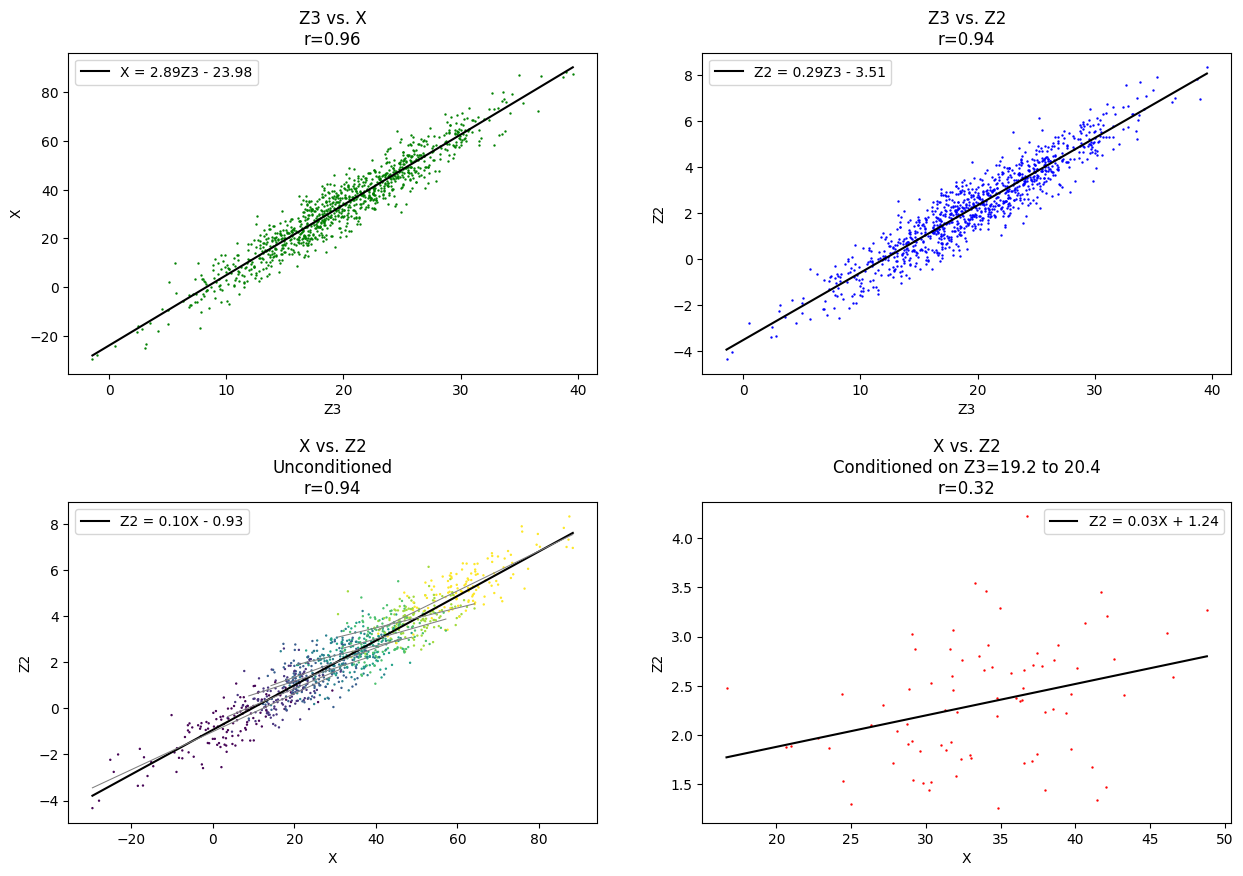

In [48]:
causal_model.scatter_junction({'X': 'treatment', 'Z3': 'collider', 'Z2': 'outcome'})

In [49]:
causal_model._v_structure_identified_in_data(v_structure_path_in_dag={'X': 'treatment', 'Z3': 'collider', 'Z2': 'outcome'})

ic| expression: 'Z2 ⫫ X'


True

Directed Acyclic Graph ...


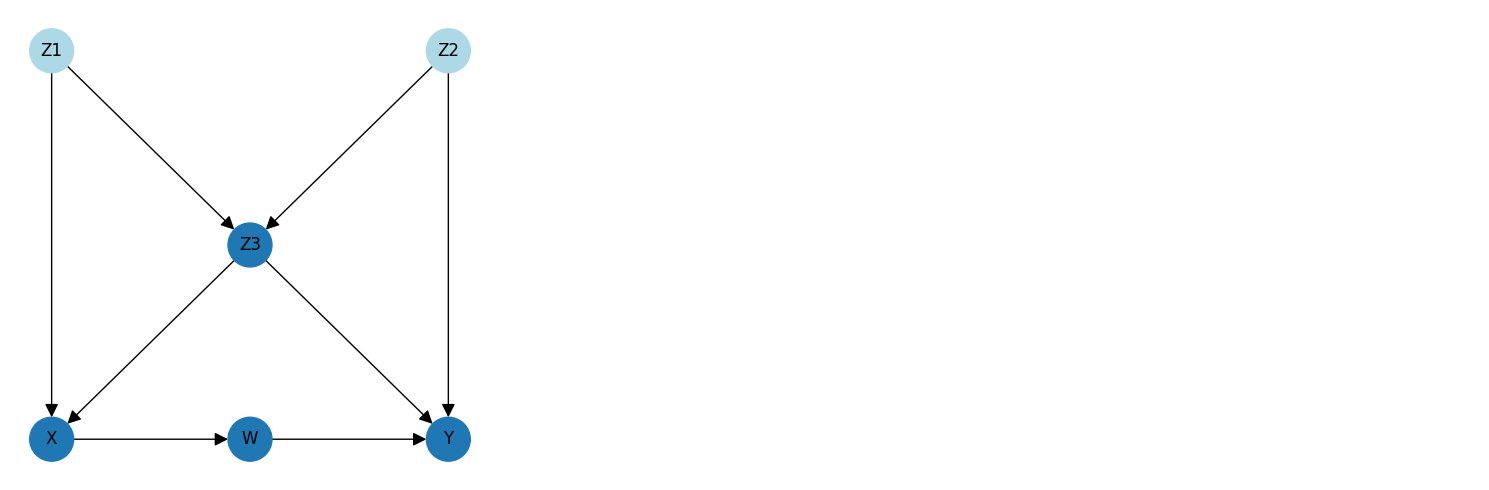

Backdoor paths ...


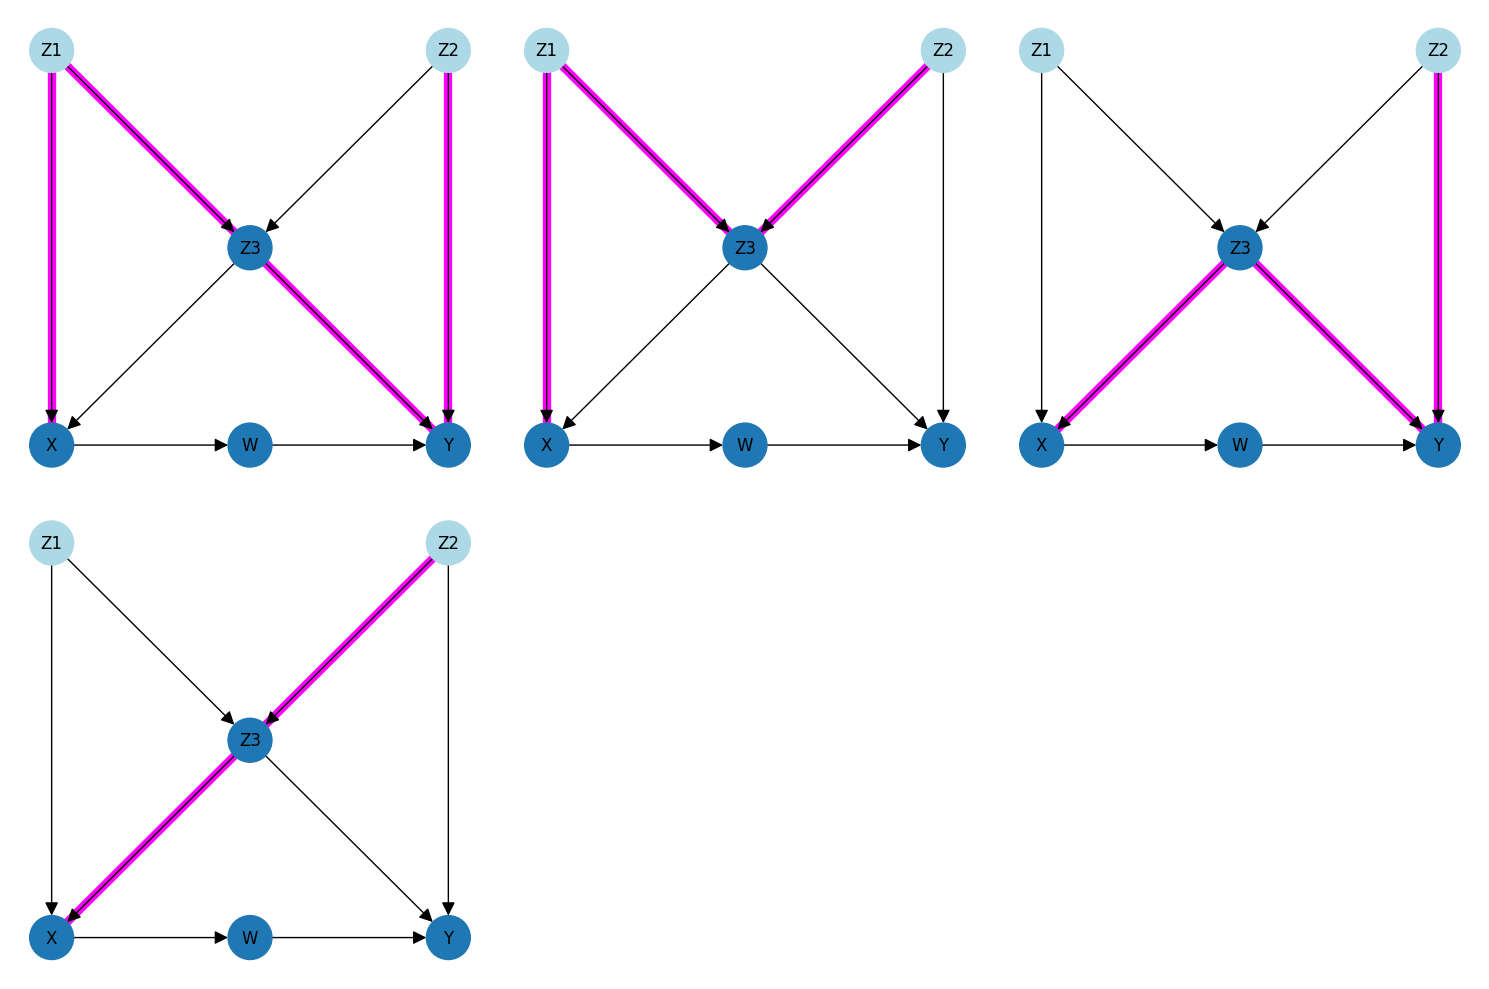

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Frontdoor paths ...


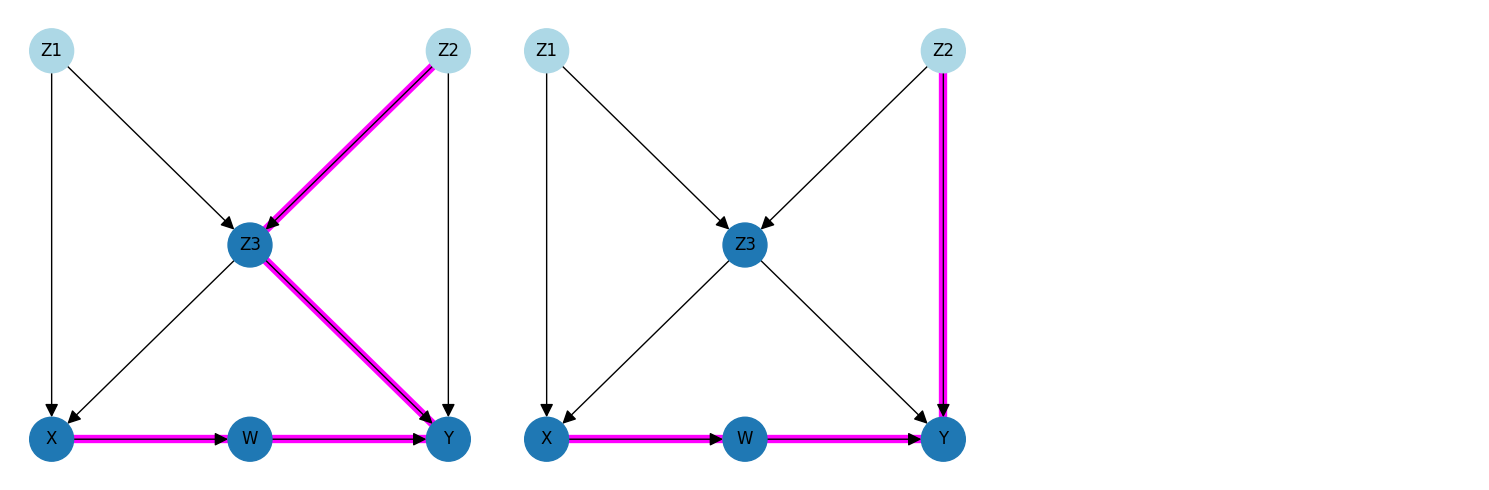

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Valid adjustment sets ...
[['Y', 'Z1', 'Z3']]


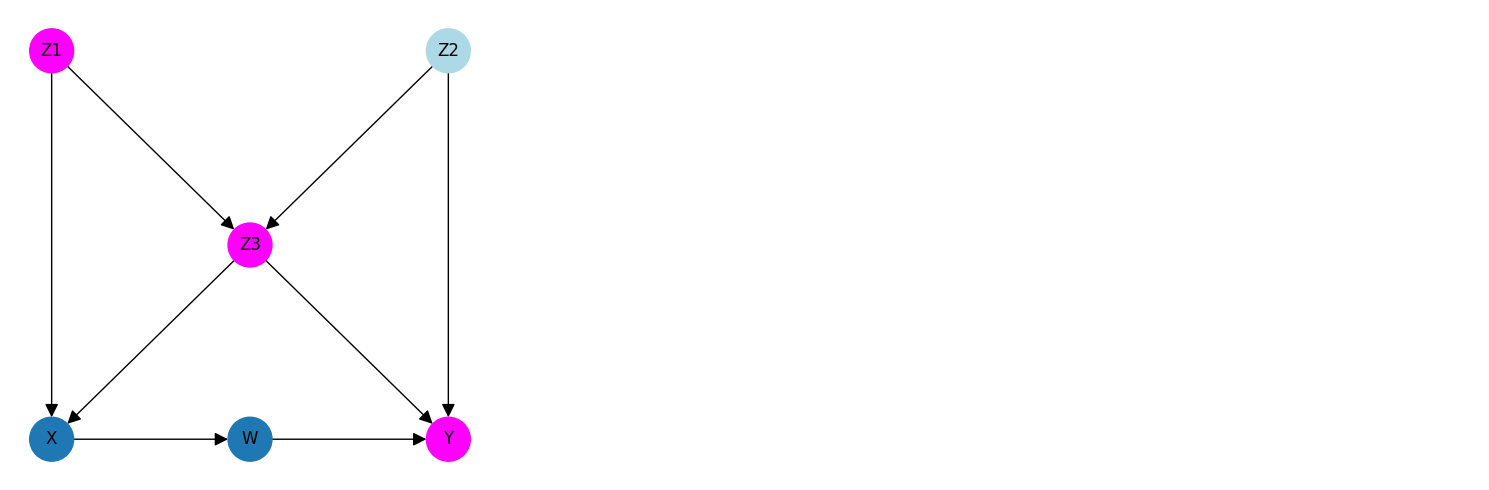

Unconditionally dependent? True
Unconditionally independent? False
Conditionally dependent? True
Conditionally independent? True

patern: backdoor



In [56]:
new_dag: DirectedAcyclicGraph = DirectedAcyclicGraph(treatment="X", outcome="Z2", edges = dag.edges, pos=dag.pos)
new_dag.analyse()

In [44]:
dag.optimal_backdoor_adjustment_set

['Z1', 'Z3']

In [50]:
#{'X': 'treatment', 'Z3': 'fork', 'Y': 'outcome'}

is_independent_on_unconditioned, _, ols_results = causal_model.data.dependence(expression=f"Z2 ⫫ X")
is_independent_on_unconditioned

ic| expression: 'Z2 ⫫ X'


True

In [51]:
ols_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Z2   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     7155.
Date:                Wed, 07 Feb 2024   Prob (F-statistic):               0.00
Time:                        08:50:04   Log-Likelihood:                -1043.7
No. Observations:                1000   AIC:                             2091.
Df Residuals:                     998   BIC:                             2101.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9334      0.044    -21.340      0.000      -1.019      -0.848
X              0.0967      0.001     84.585      0.000       0.094       0.099
==============================================================================
Omnibus:                        3.220   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.200   Jarque-Bera (JB):                3.092
Skew:                           0.131   Prob(JB):                        0.213
Kurtosis:                       3.076   Cond. No.                         77.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
new_dag.outcome

'Y'

In [35]:
new_dag.optimal_backdoor_adjustment_set

['Z1']

In [40]:
ols_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Z2   R-squared:                       0.589
Model:                            OLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     1428.
Date:                Wed, 07 Feb 2024   Prob (F-statistic):          1.05e-194
Time:                        08:21:19   Log-Likelihood:                -1382.4
No. Observations:                1000   AIC:                             2769.
Df Residuals:                     998   BIC:                             2779.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6982      0.045     37.405      0.000       1.609       1.787
W              0.0319      0.001     37.789      0.000       0.030       0.034
==============================================================================
Omnibus:                        9.859   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.007   Jarque-Bera (JB):                7.041
Skew:                           0.074   Prob(JB):                       0.0296
Kurtosis:                       2.616   Cond. No.                         80.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
dag.missing_edge_tests()

{'W': {'expression': 'W ⫫ Z1, Z2, Z3 | X',
  'explanation': 'W is independent of Z1 and Z2 and Z3 once you condition on X'},
 'X': {'expression': 'X ⫫ Z2 | Z1, Z3',
  'explanation': 'X is independent of Z2 once you condition on Z1 and Z3'},
 'Y': {'expression': 'Y ⫫ X, Z1 | W, Z2, Z3',
  'explanation': 'Y is independent of X and Z1 once you condition on W and Z2 and Z3'},
 'Z1': {'expression': 'Z1 ⫫ Z2', 'explanation': 'Z1 is independent of Z2'}}

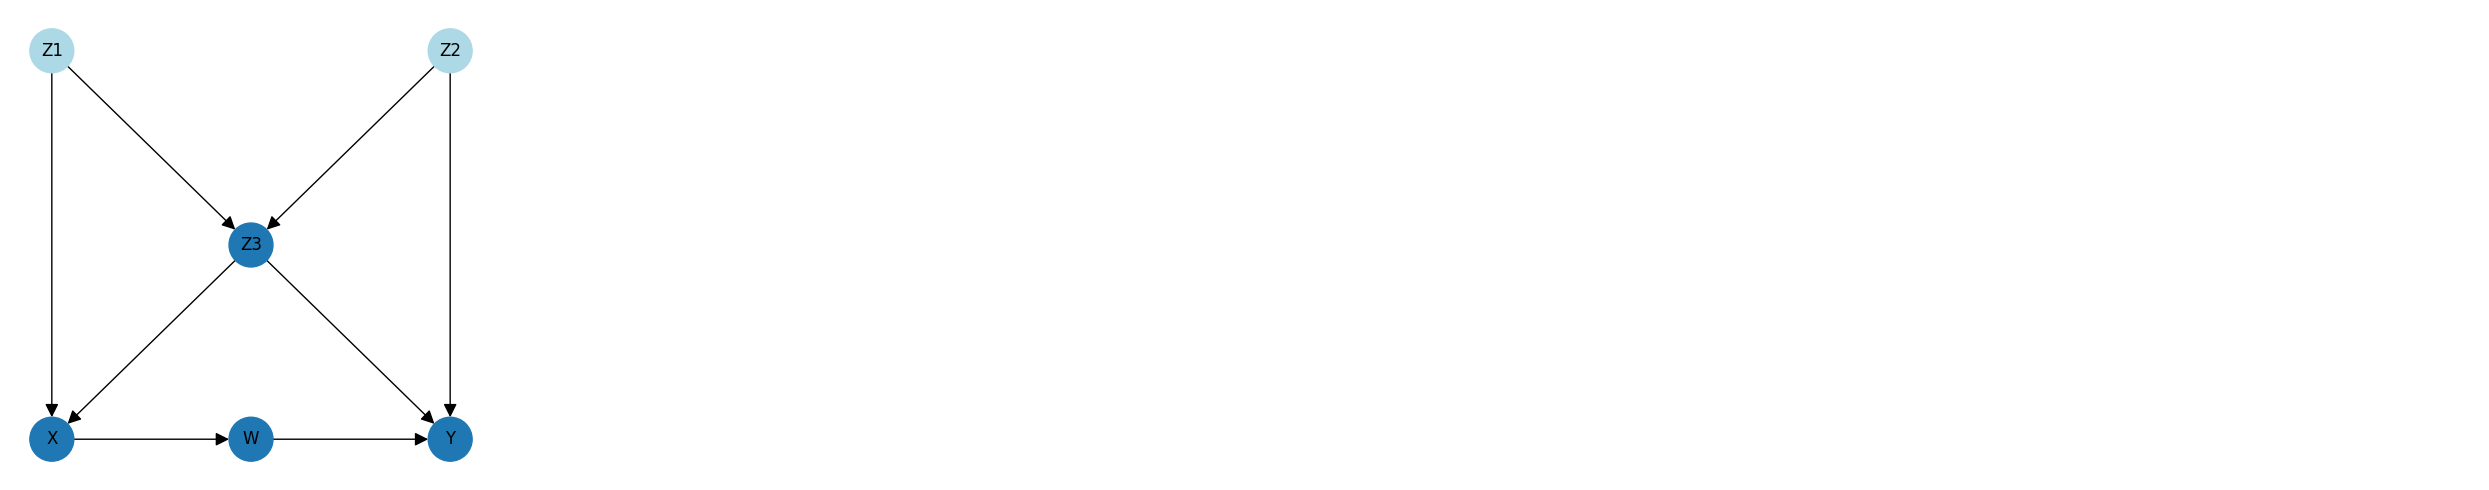

In [21]:
dag.draw(grid_size=5)

So, we are there then!

Before attempting to validate reversed edges we should ensure that there are no missing edges and no spurious edges.

If we get that far then we have the right connections, but we have not necessarily ascertained the right direction.

So if we find a fork we can use the DAG to ascertain adjacency BECAUSE we have already validated that there are no missing (or spurious) edges.

Therfore the reliance on the DAG to ascertain adjacency in the data is valid provided that the missing / spurious tests have been carried out first.

We can then go ahead and identify / differentiate v-structures from every other node type and proceed onto reversing them and seeing what happens!!!!

:-)

In [22]:
valid, missing = causal_model._validate_missing_edges()
print(valid)
print(missing)

ic| expression: 'W ⫫ Z1, Z2, Z3 | X'
ic| expression: 'X ⫫ Z2 | Z1, Z3'
ic| expression: 'Y ⫫ X, Z1 | W, Z2, Z3'
ic| expression: 'Z1 ⫫ Z2'


True
[]


In [23]:
valid, spurious = causal_model._validate_spurious_edges()
print(valid)
print(spurious)

ic| expression: 'W ⫫̸ X'
ic| expression: 'X ⫫̸ Z1, Z3'
ic| expression: 'Y ⫫̸ W, Z2, Z3'
ic| expression: 'Z3 ⫫̸ Z1, Z2'


True
[]


In [26]:
causal_model._pearlean_validate_reversed_edges()

True

In [25]:
valid, reversed = causal_model._validate_reversed_edges()
print(valid)
print(reversed)

True
[]


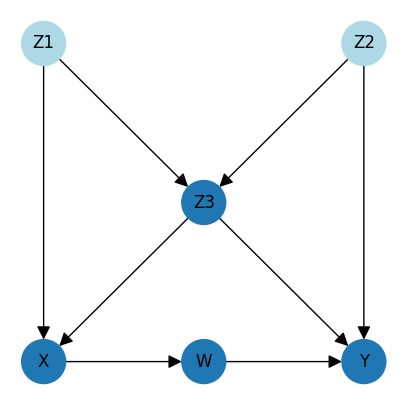

In [27]:
dag.draw()

In [66]:
valid

True

In [67]:
spurious

[]

In [20]:
is_independent_on_unconditioned, _, ols_results = causal_model.data.dependence(expression=f"Z3 ⫫ W")
is_independent_on_unconditioned

ic| expression: 'Z3 ⫫ W'


True

In [21]:
for junction in dag.junctions:
    start = list(junction.keys())[0]
    intermediary = list(junction.keys())[1]
    end = list(junction.keys())[2]

    end_to_start = (end, start) in dag.edges

    print(f"junction={str(junction)}, end connected to start = {end_to_start}")

junction={'X': 'treatment', 'W': 'chain', 'Y': 'outcome'}, end connected to start = False
junction={'Z1': 'treatment', 'X': 'chain', 'W': 'outcome'}, end connected to start = False
junction={'Z3': 'treatment', 'X': 'chain', 'W': 'outcome'}, end connected to start = False
junction={'Z1': 'treatment', 'Z3': 'chain', 'X': 'outcome'}, end connected to start = False
junction={'Z1': 'treatment', 'Z3': 'chain', 'Y': 'outcome'}, end connected to start = False
junction={'Z2': 'treatment', 'Z3': 'chain', 'X': 'outcome'}, end connected to start = False
junction={'Z2': 'treatment', 'Z3': 'chain', 'Y': 'outcome'}, end connected to start = False
junction={'X': 'treatment', 'Z1': 'fork', 'Z3': 'outcome'}, end connected to start = True
junction={'X': 'treatment', 'Z3': 'fork', 'Y': 'outcome'}, end connected to start = False
junction={'Y': 'treatment', 'Z2': 'fork', 'Z3': 'outcome'}, end connected to start = True
junction={'W': 'treatment', 'Y': 'collider', 'Z2': 'outcome'}, end connected to start = Fa

In [22]:
("Z3", "X") in causal_model.dag.edges

True

In [23]:
is_independent_on_unconditioned, _, ols_results = causal_model.data.dependence(expression=f"Z3 ⫫ X")
is_independent_on_unconditioned

ic| expression: 'Z3 ⫫ X'


True

Directed Acyclic Graph ...


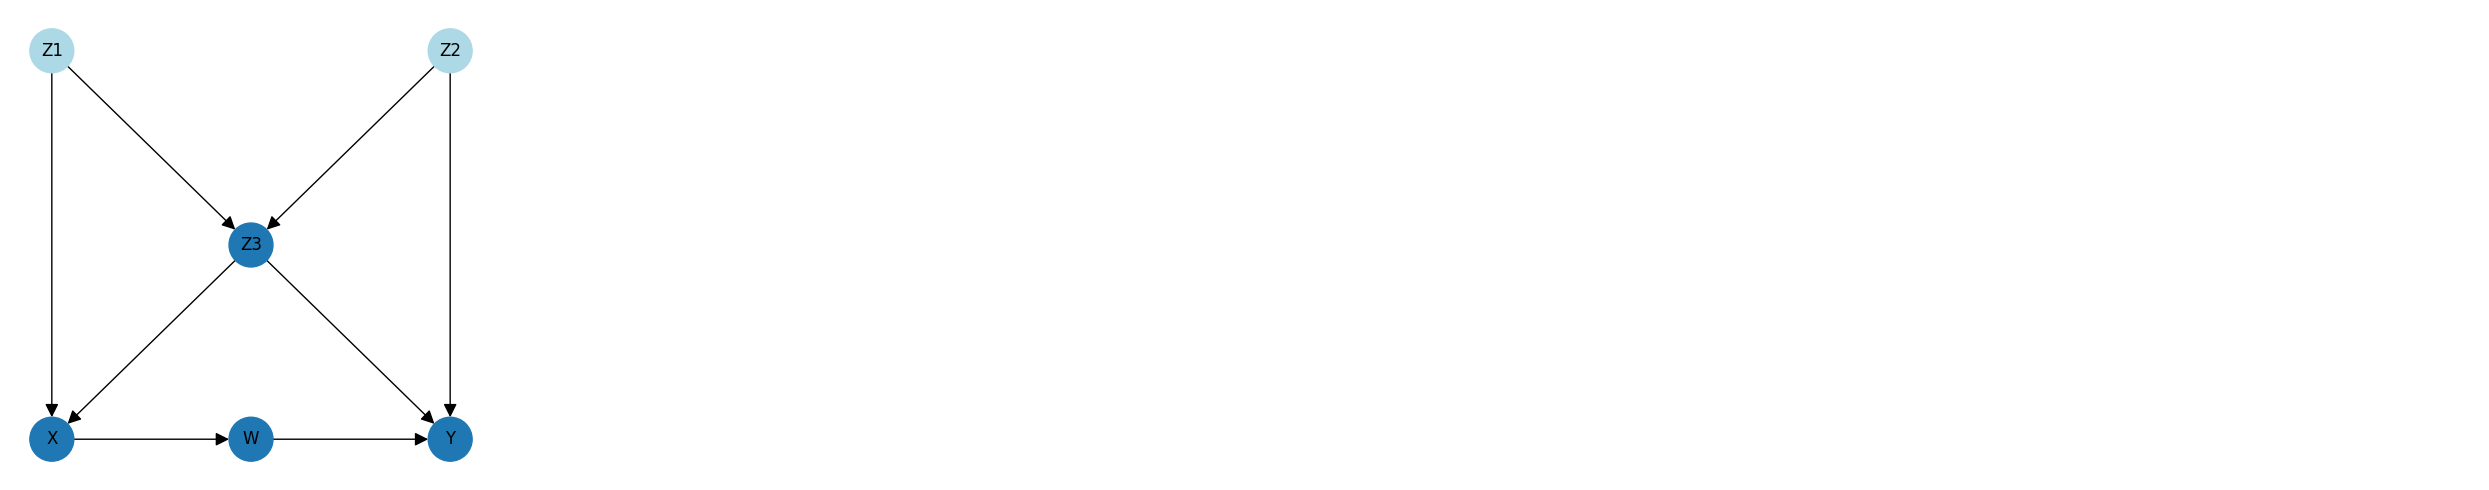

Backdoor paths ...


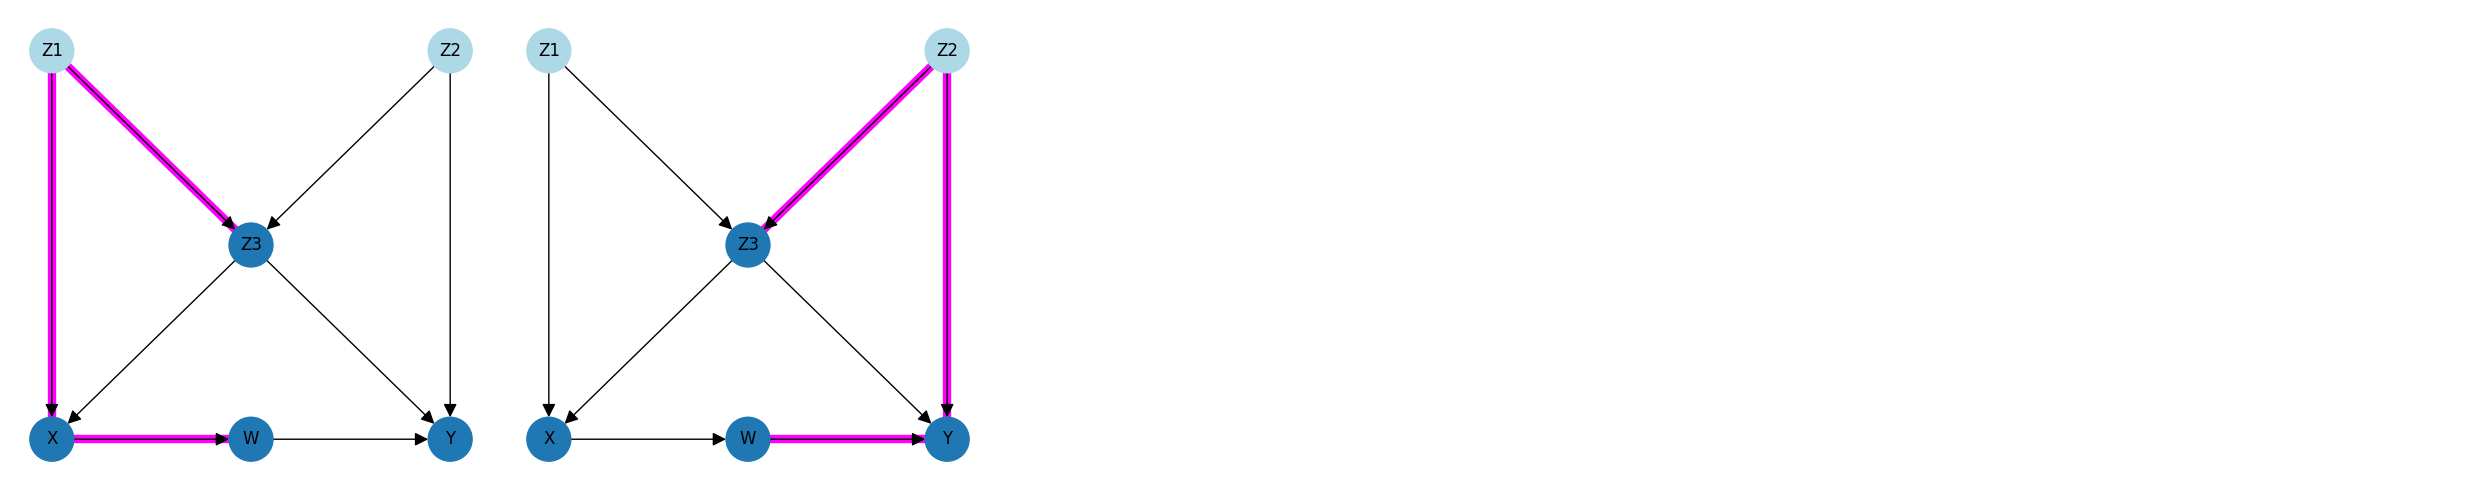

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Frontdoor paths ...


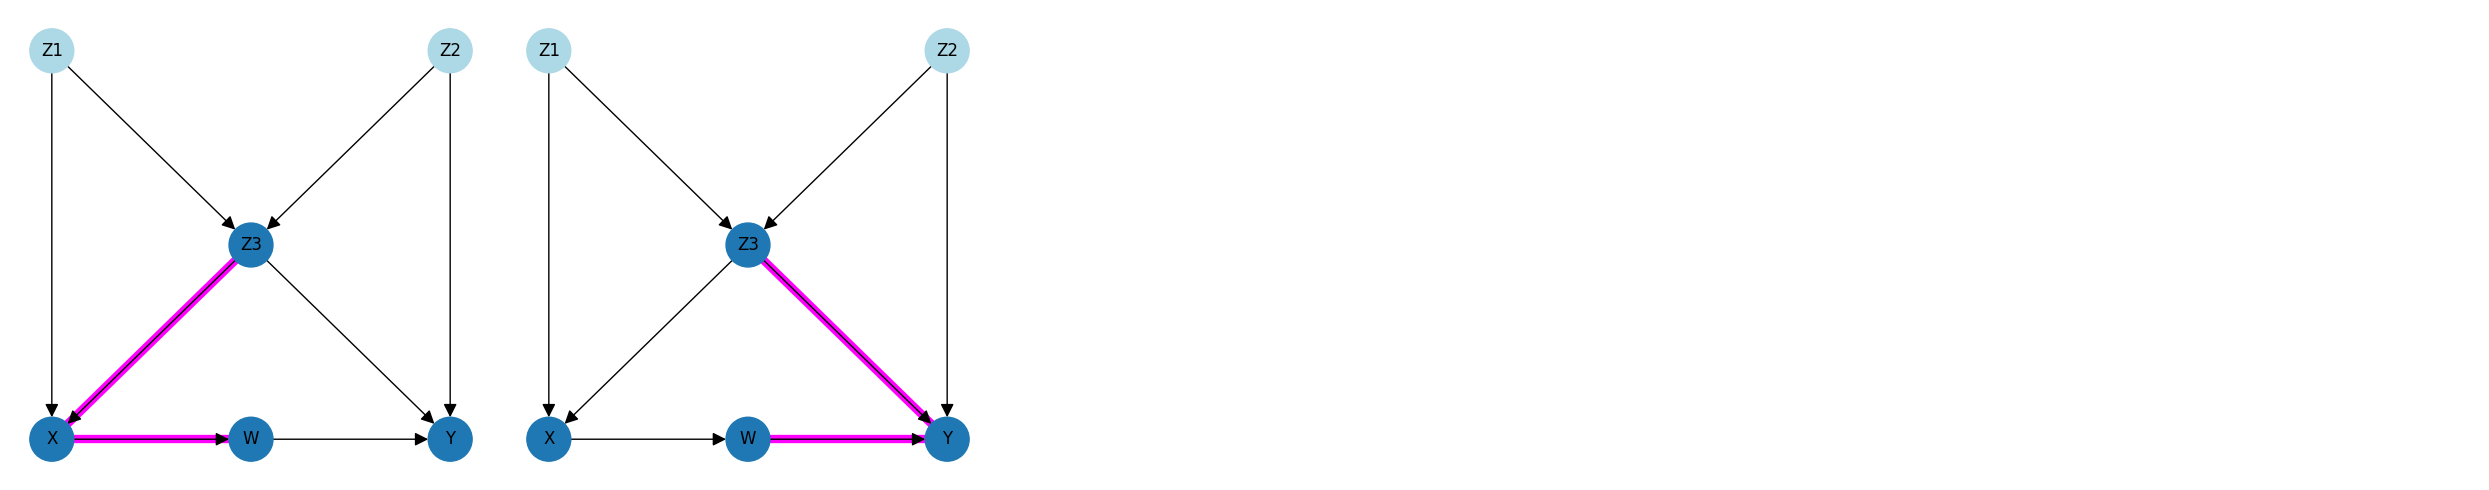

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Valid adjustment sets ...
[['Z1'], ['Z1', 'Z2'], ['X', 'Y', 'Z2'], ['Y', 'Z1', 'Z2'], ['X', 'Y', 'Z1', 'Z2']]


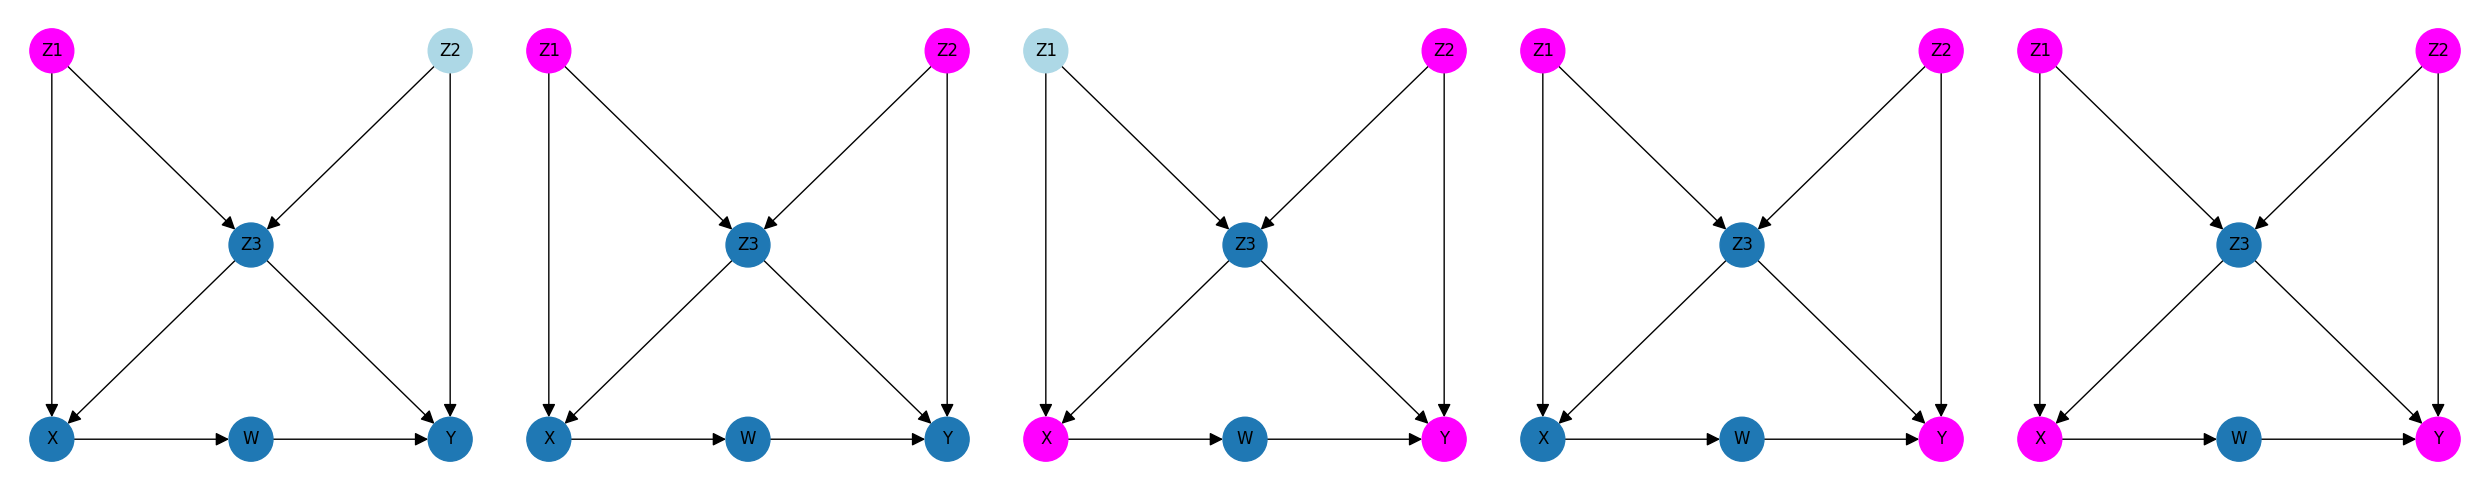

Optimal adjustment set
['Z1']


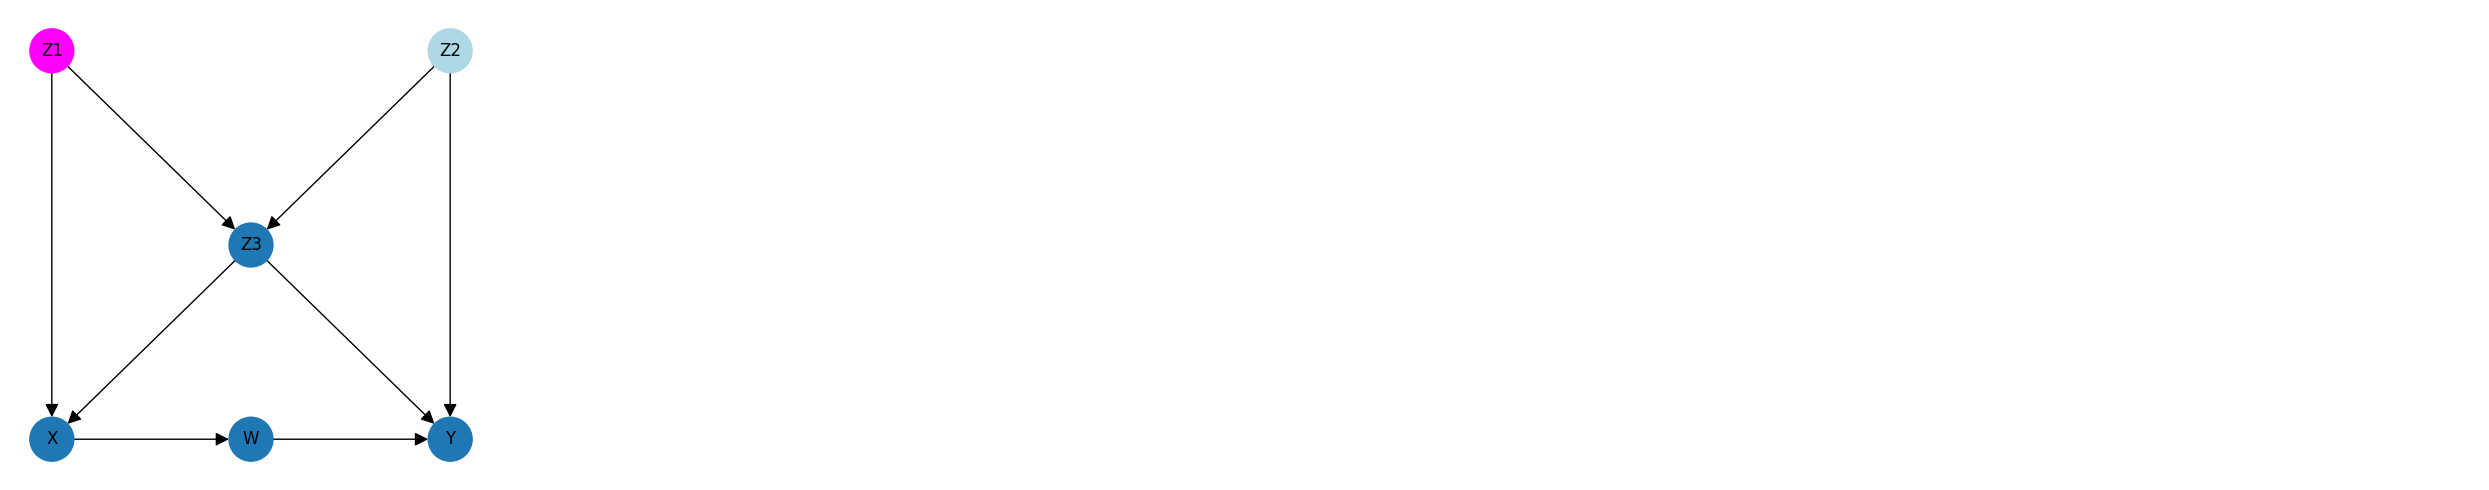

Unconditionally dependent? True
Unconditionally independent? False
Conditionally dependent? True
Conditionally independent? True

patern: backdoor



In [24]:
new_dag: DirectedAcyclicGraph = DirectedAcyclicGraph(treatment="Z3", outcome="W", edges = dag.edges, pos=dag.pos)
new_dag.analyse(cols=5)

In [25]:
from statsmodels.formula.api import ols

In [26]:
ols_results.rsquared**0.5

0.9431505603174664

In [27]:
is_independent_on_unconditioned, _, ols_results = causal_model.data.dependence(expression=f"Z2 ⫫ W")
ols_results.summary()

ic| expression: 'Z2 ⫫ W'


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Z2   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.334
Method:                 Least Squares   F-statistic:                     501.9
Date:                Tue, 06 Feb 2024   Prob (F-statistic):           2.24e-90
Time:                        17:23:37   Log-Likelihood:                -1763.0
No. Observations:                1000   AIC:                             3530.
Df Residuals:                     998   BIC:                             3540.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7471      0.058    115.874      0.000       6.633       6.861
W              0.0261      0.001     22.403      0.000       0.024       0.028
==============================================================================
Omnibus:                        3.102   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.212   Jarque-Bera (JB):                3.028
Skew:                           0.096   Prob(JB):                        0.220
Kurtosis:                       3.189   Cond. No.                         65.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

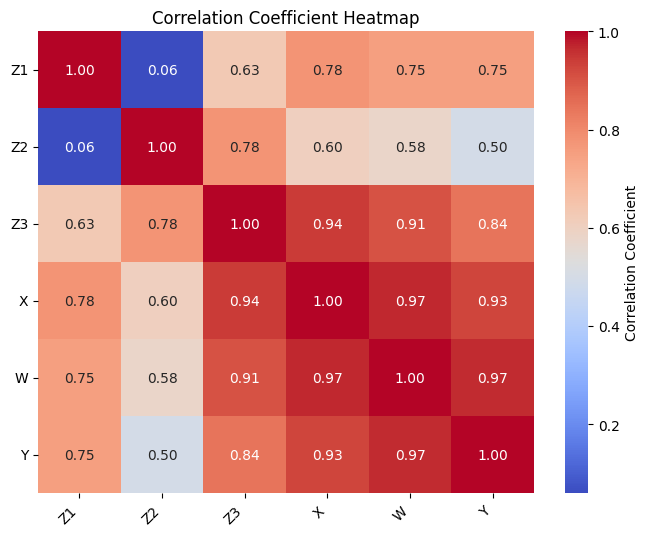

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
# Calculate correlation coefficients
corr_matrix = abs(np.corrcoef(causal_model.data, rowvar=False))

# Create a heatmap plot using seaborn
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar_kws={'label': 'Correlation Coefficient'})

heatmap.set_xticklabels(causal_model.data.columns, rotation=45, ha='right')
heatmap.set_yticklabels(causal_model.data, rotation=0)

plt.title('Correlation Coefficient Heatmap')
plt.show()

In [29]:
np.corrcoef(causal_model.data, causal_model.data)

array([[1.        , 0.99926485, 0.99994193, ..., 0.99986566, 0.99905136,
        0.99914024],
       [0.99926485, 1.        , 0.99885054, ..., 0.9994646 , 0.99881551,
        0.99953111],
       [0.99994193, 0.99885054, 1.        , ..., 0.999746  , 0.99891813,
        0.99870763],
       ...,
       [0.99986566, 0.9994646 , 0.999746  , ..., 1.        , 0.99858969,
        0.99890134],
       [0.99905136, 0.99881551, 0.99891813, ..., 0.99858969, 1.        ,
        0.99907558],
       [0.99914024, 0.99953111, 0.99870763, ..., 0.99890134, 0.99907558,
        1.        ]])

What if the answer is to block all the backdoor and front door paths and then just look at the co-efficient on its own?

In [30]:
ols_formula = "Z2 ~ Z1"
#ols_formula = "Z2 ~ W + X + Y + Z3"
#ols_formula = "Z2 ~ W + X + Y + Z3"
ols_results = ols(ols_formula, causal_model.data).fit()

ols_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Z2   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     3.476
Date:                Tue, 06 Feb 2024   Prob (F-statistic):             0.0626
Time:                        17:23:38   Log-Likelihood:                -1965.0
No. Observations:                1000   AIC:                             3934.
Df Residuals:                     998   BIC:                             3944.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.3012      0.217     29.057      0.000       5.876       6.727
Z1            -0.0568      0.030     -1.864      0.063      -0.117       0.003
==============================================================================
Omnibus:                        4.897   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.086   Jarque-Bera (JB):                5.413
Skew:                           0.087   Prob(JB):                       0.0668
Kurtosis:                       3.316   Cond. No.                         28.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
ols_results.rsquared**0.5

0.05891224666441559

Directed Acyclic Graph ...


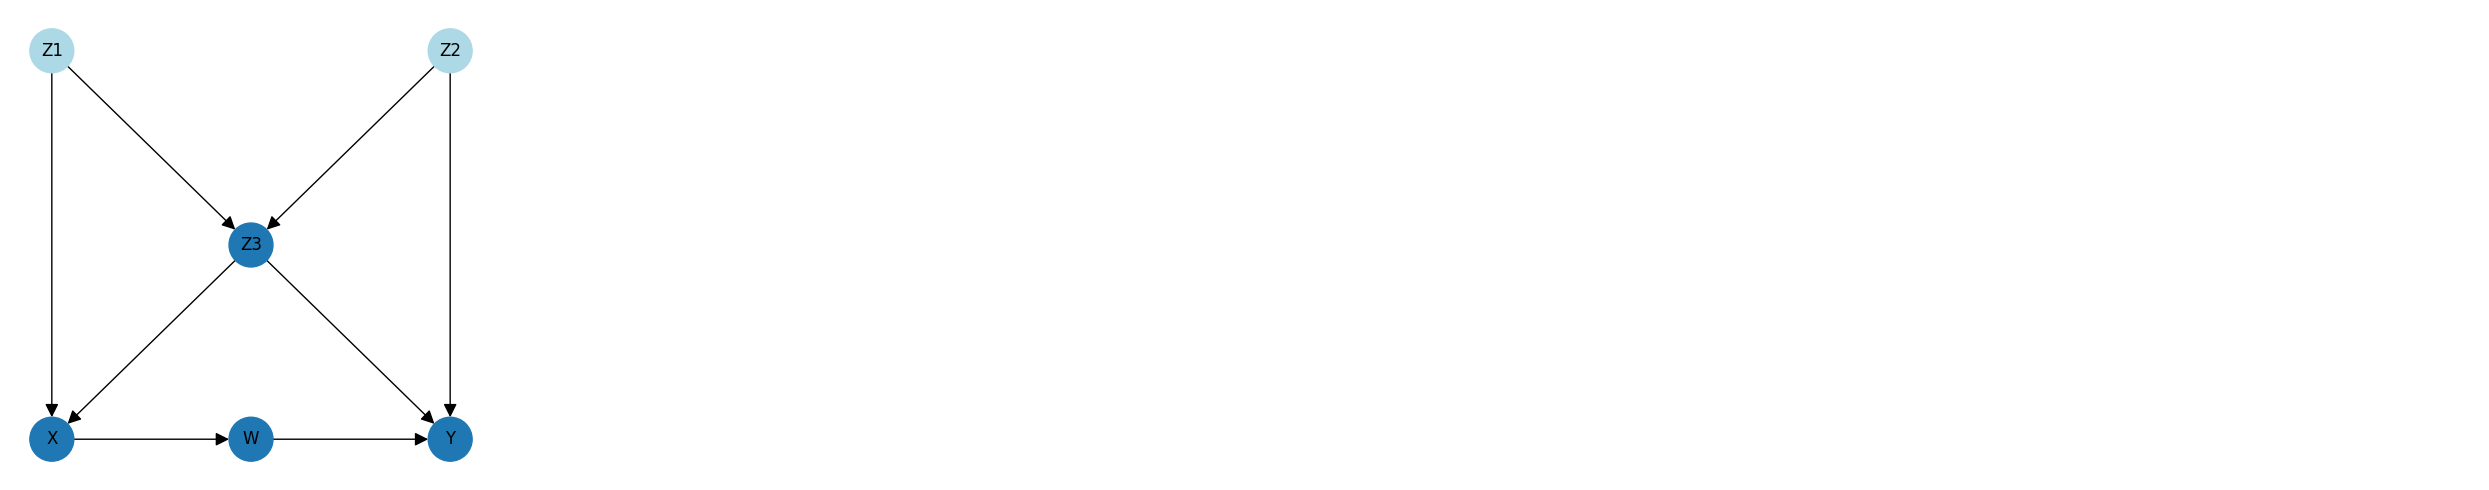

Backdoor paths ...


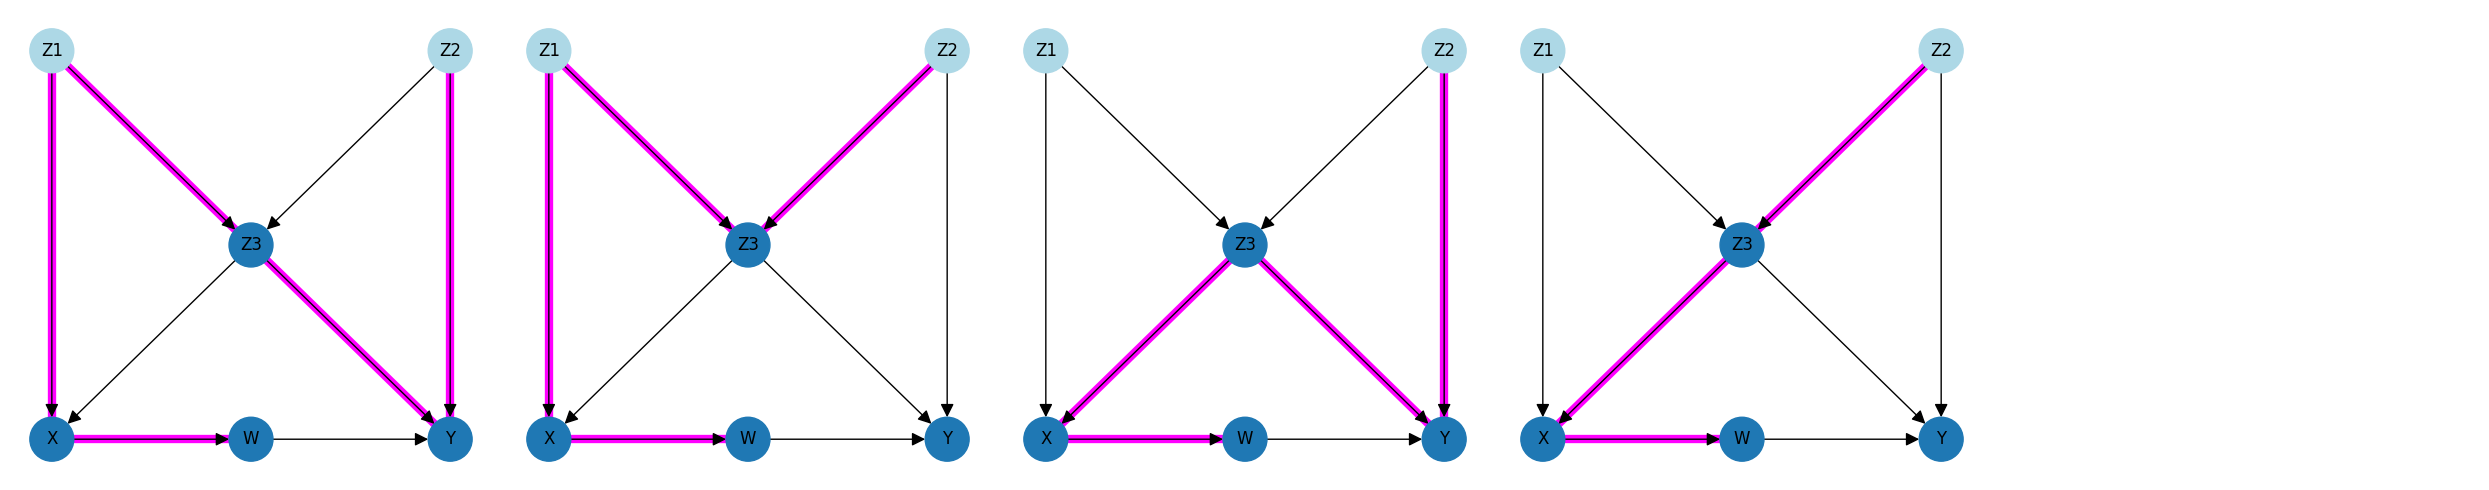

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Frontdoor paths ...


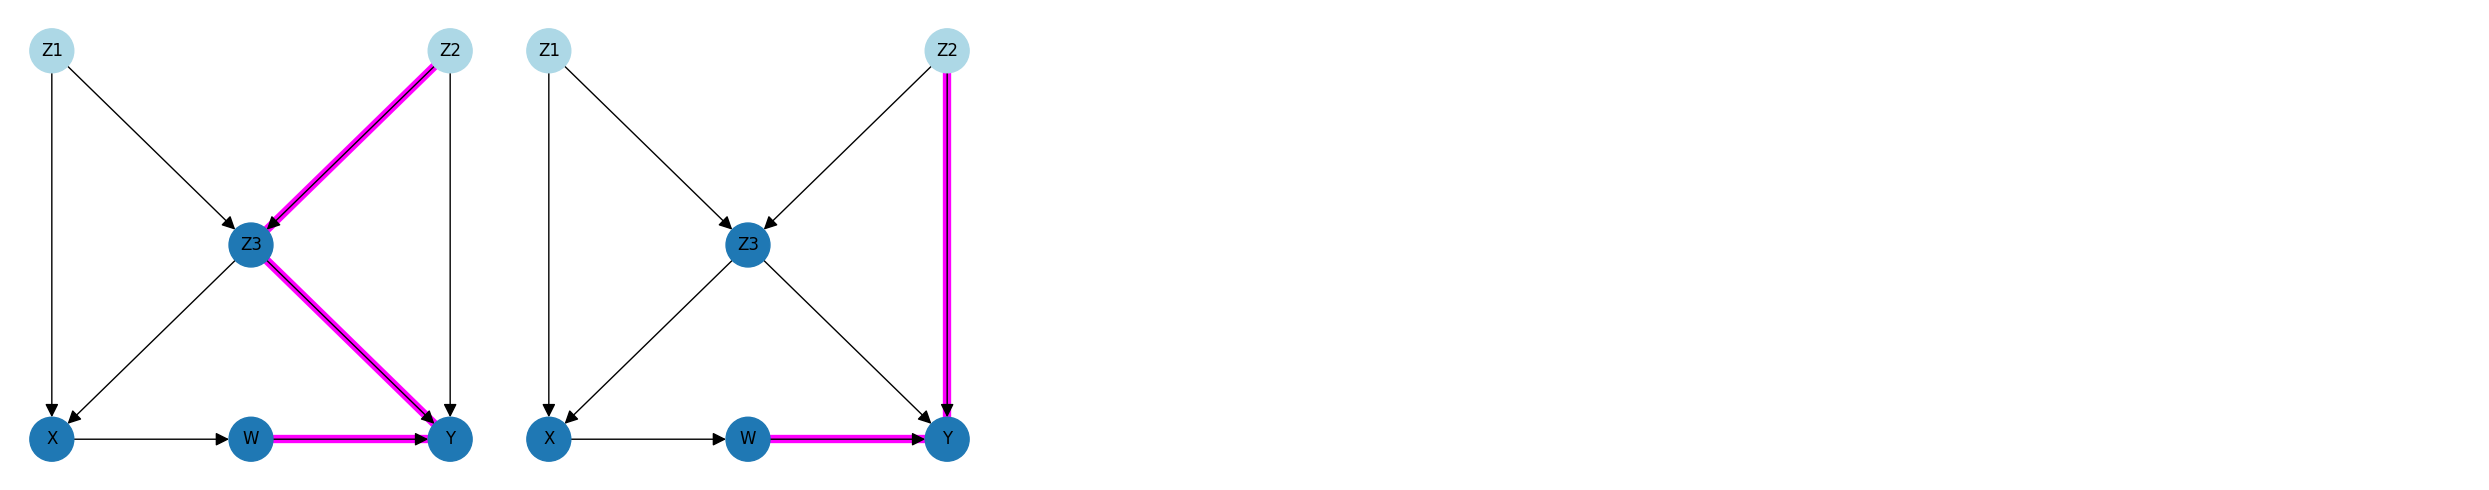

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Valid adjustment sets ...
[['X', 'Y'], ['X', 'Y', 'Z1'], ['Y', 'Z1', 'Z3'], ['X', 'Y', 'Z3'], ['X', 'Y', 'Z1', 'Z3']]


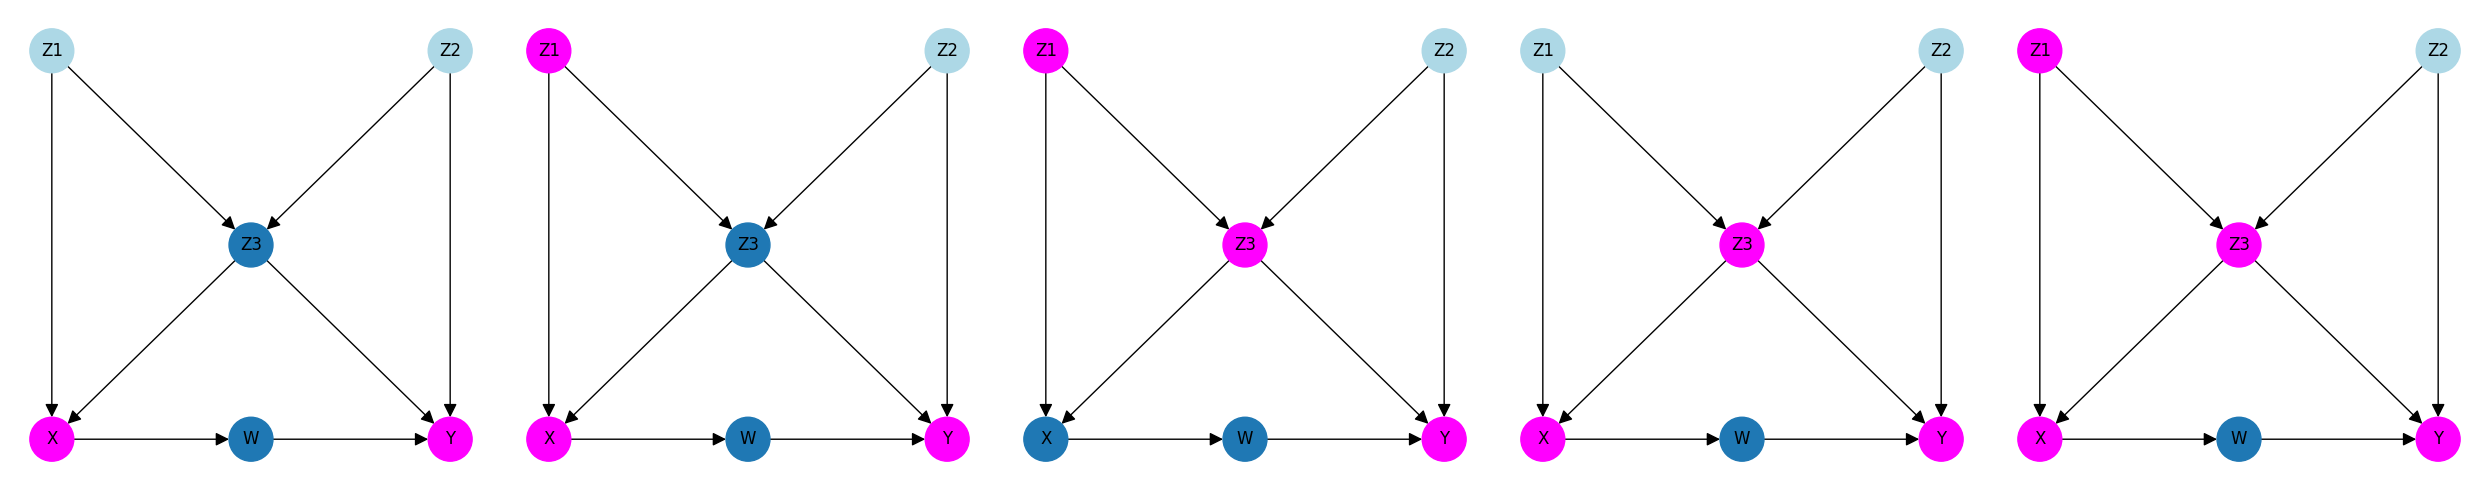

Optimal adjustment set
['X', 'Y']


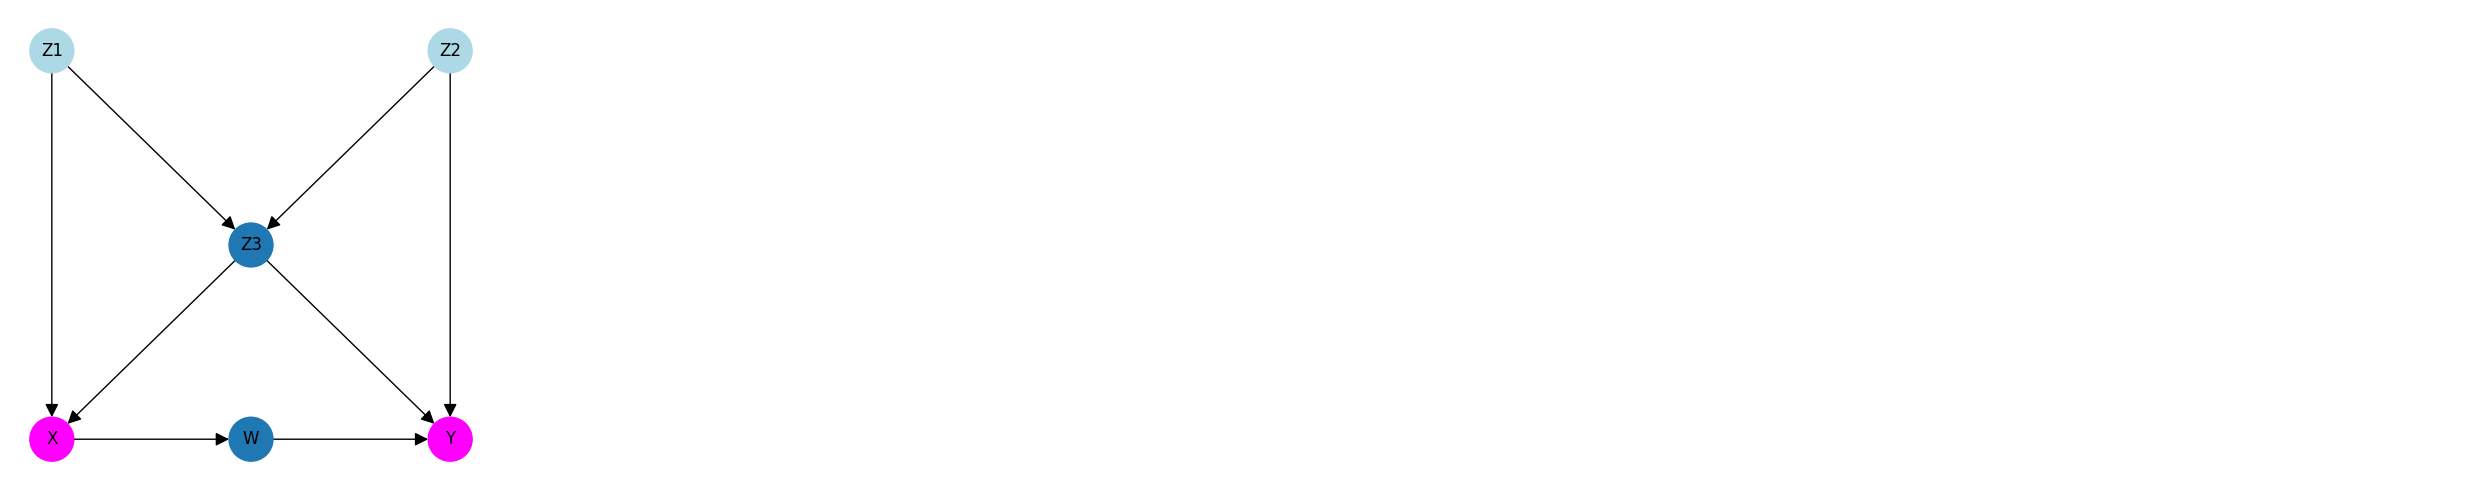

Unconditionally dependent? True
Unconditionally independent? False
Conditionally dependent? True
Conditionally independent? True

patern: backdoor



In [32]:
new_dag: DirectedAcyclicGraph = DirectedAcyclicGraph(treatment="W", outcome="Z2", edges = dag.edges, pos=dag.pos)
new_dag.analyse(cols=5)

In [33]:
ic.disable()
for junction in dag.junctions:
    #collider_identified_in_data = causal_model._collider_identified_in_data(junction, dag)

    start = list(junction.keys())[0]
    intermediary = list(junction.keys())[1]
    end = list(junction.keys())[2]

    is_independent_on_unconditioned, _, ols_results = causal_model.data.dependence(expression=f"{end} ⫫ {start}")
    is_dependent_on_conditioned, _, ols_results = causal_model.data.dependence(expression=f"{end} ⫫̸ {start} | {intermediary}")

    is_dependent_on_unconditioned, _, ols_results = causal_model.data.dependence(expression=f"{end} ⫫̸ {start}")


    #collider_identified_in_data = causal_model._collider_identified_in_data(collider_path_in_dag=junction, dag=dag)
    collider_identified_in_data = is_independent_on_unconditioned & is_independent_on_unconditioned

    #collider_identified_in_data = (is_independent_on_unconditioned) & (is_dependent_on_unconditioned==False)

    print(f"junction={junction}, junction type={dag.junction_type(junction)}, collider identified in data = {collider_identified_in_data}")
ic.enable()

junction={'X': 'treatment', 'W': 'chain', 'Y': 'outcome'}, junction type=chain, collider identified in data = False
junction={'Z1': 'treatment', 'X': 'chain', 'W': 'outcome'}, junction type=chain, collider identified in data = False
junction={'Z3': 'treatment', 'X': 'chain', 'W': 'outcome'}, junction type=chain, collider identified in data = False
junction={'Z1': 'treatment', 'Z3': 'chain', 'X': 'outcome'}, junction type=chain, collider identified in data = False
junction={'Z1': 'treatment', 'Z3': 'chain', 'Y': 'outcome'}, junction type=chain, collider identified in data = False
junction={'Z2': 'treatment', 'Z3': 'chain', 'X': 'outcome'}, junction type=chain, collider identified in data = False
junction={'Z2': 'treatment', 'Z3': 'chain', 'Y': 'outcome'}, junction type=chain, collider identified in data = False
junction={'X': 'treatment', 'Z1': 'fork', 'Z3': 'outcome'}, junction type=fork, collider identified in data = True
junction={'X': 'treatment', 'Z3': 'fork', 'Y': 'outcome'}, junc

- Both methods successfully identify the v-structures but the old method also correctly identifies one of the colliders with adjacency (Z2 -> Y <- Z3>)
- So on the face of it the old method is better but it certainly warrants more investigation because ...
- In Z2 -> Y <- Z3 messages can pass directly from Z2 to Z3 when Y is unconditioned so the old method is wrong!!!

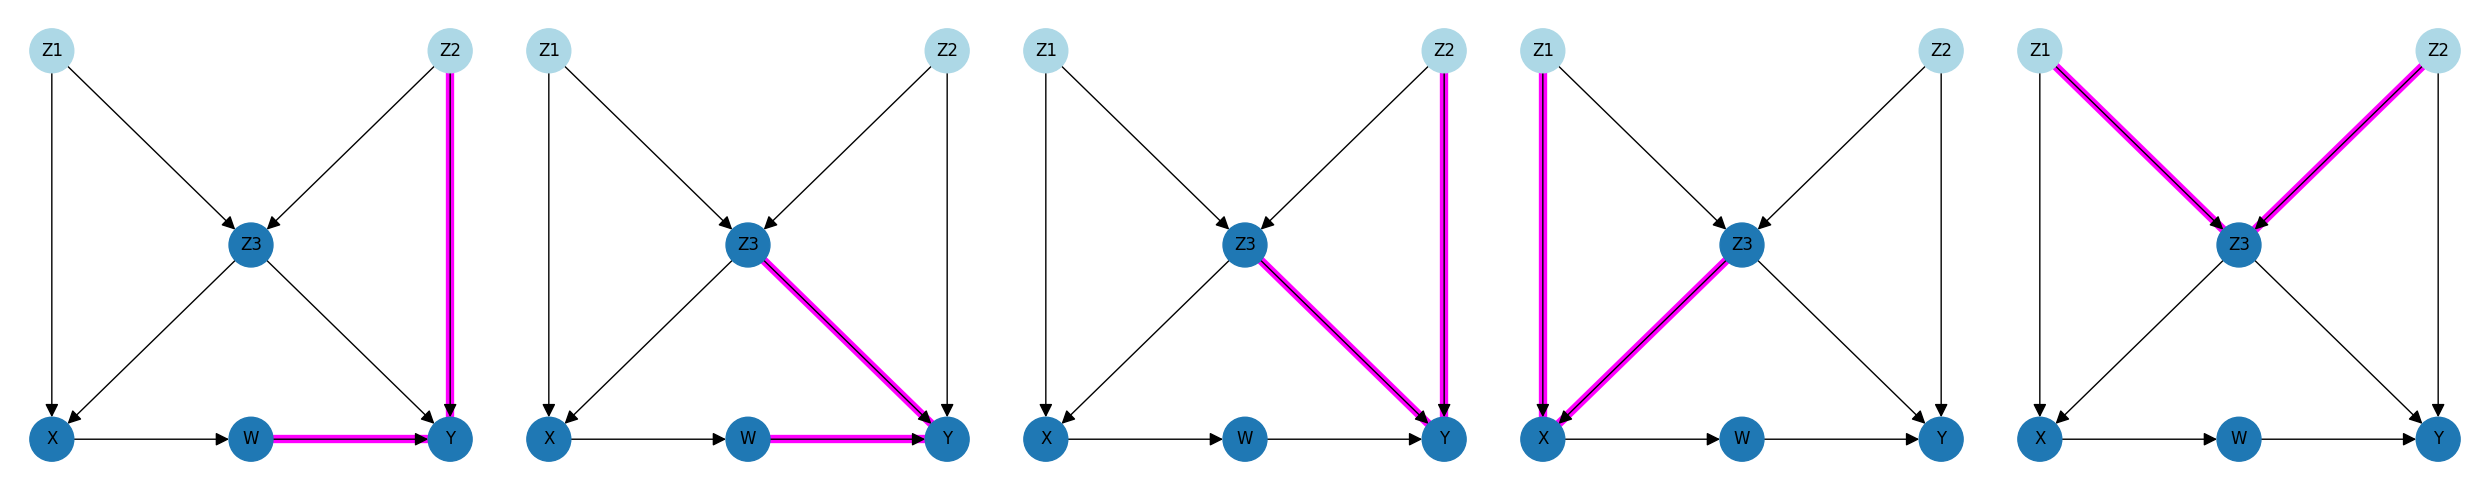

In [34]:
dag.draw_paths(paths=dag.colliders, cols=5)

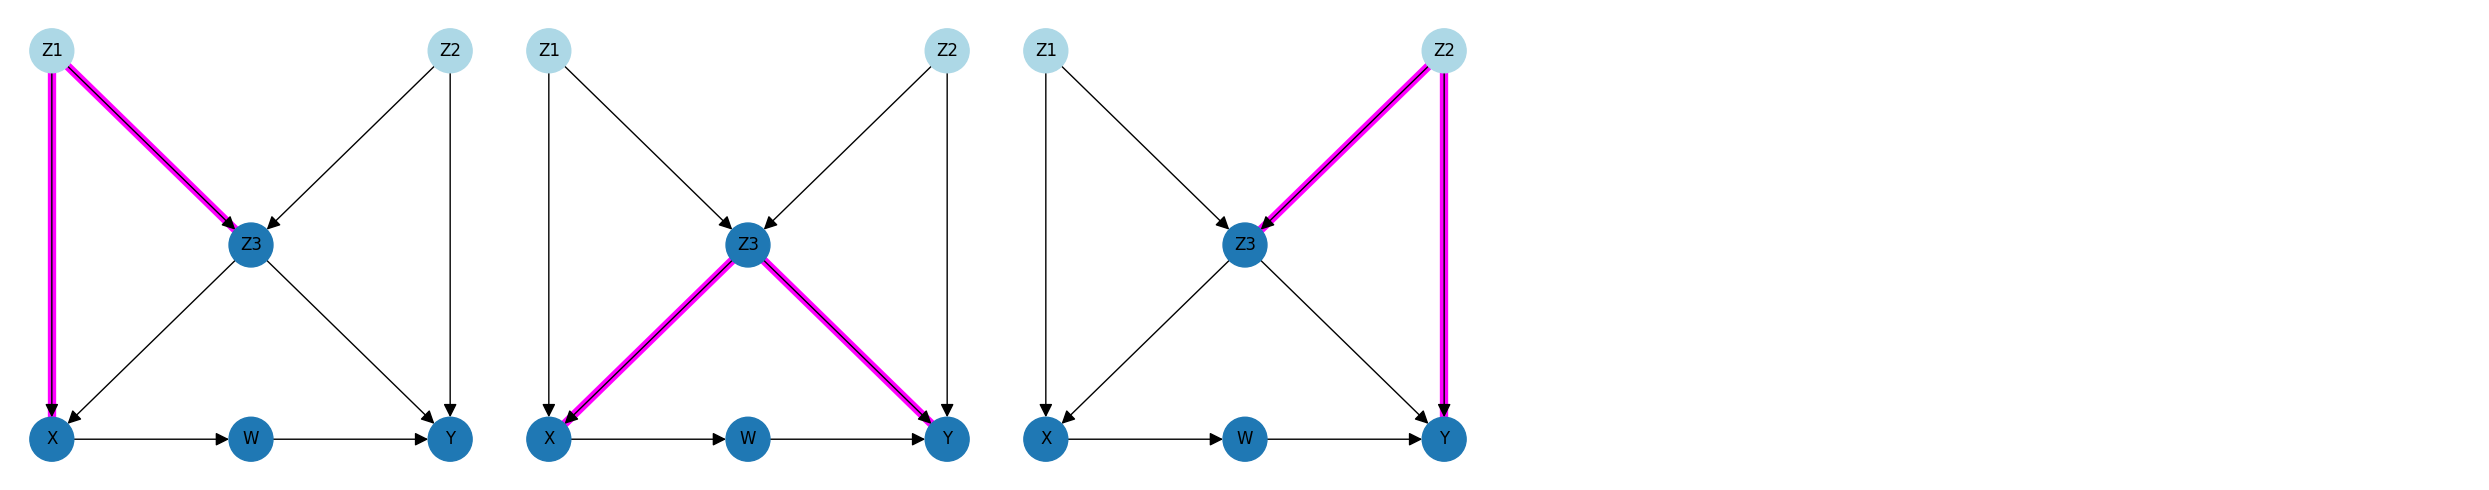

In [35]:
dag.draw_paths(paths=dag.forks, cols=5)

Directed Acyclic Graph ...


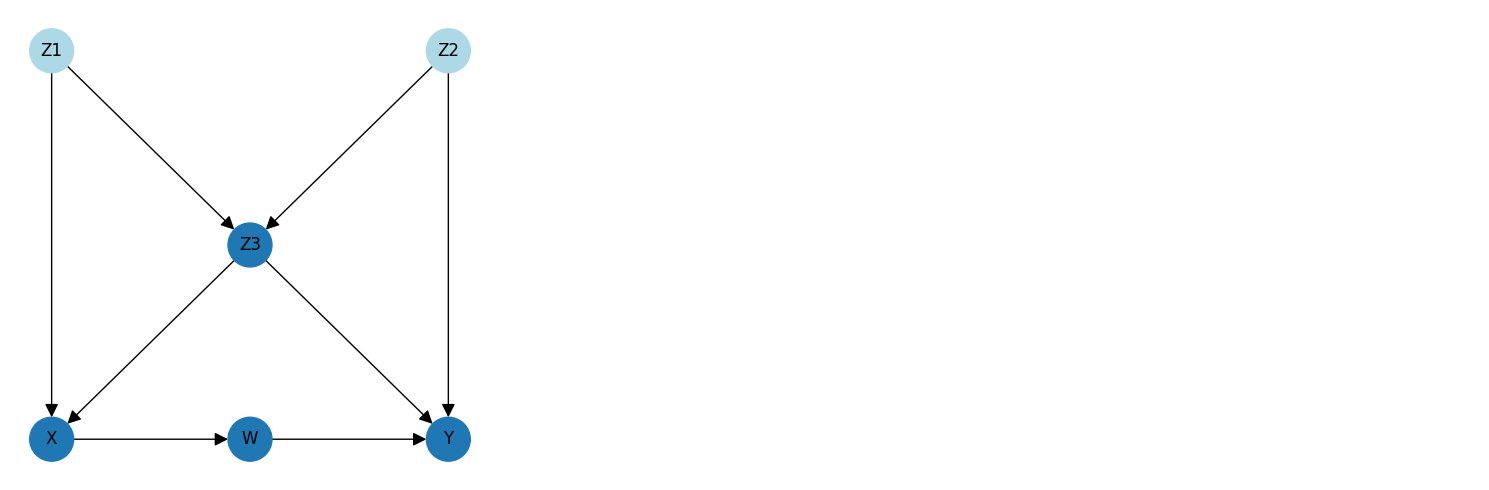

Backdoor paths ...


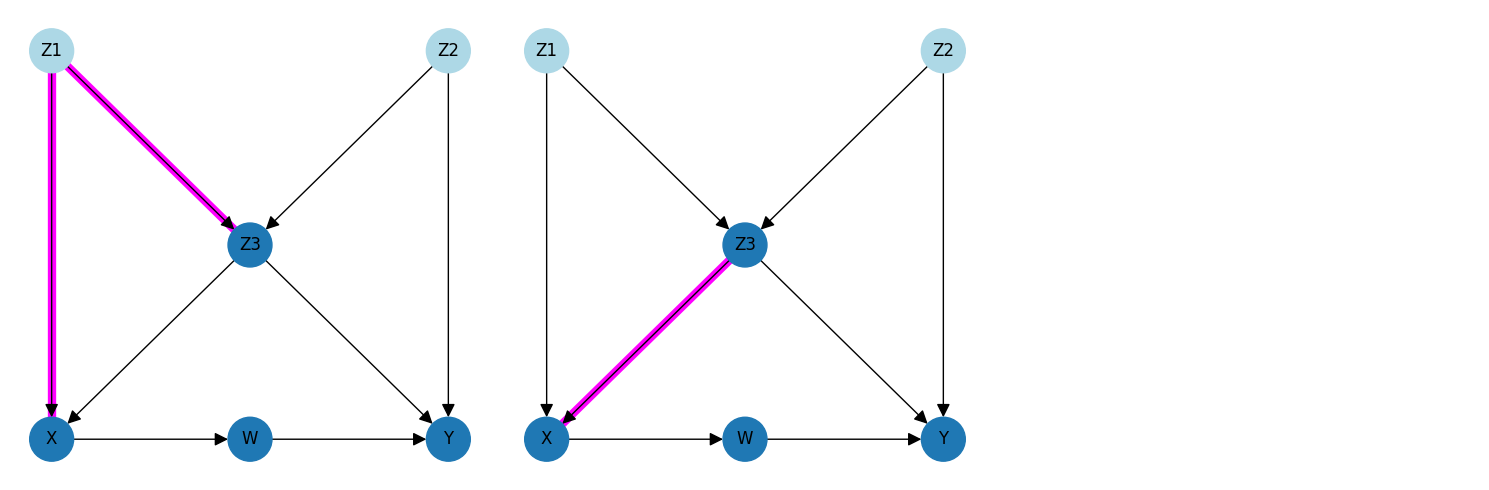

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Frontdoor paths ...


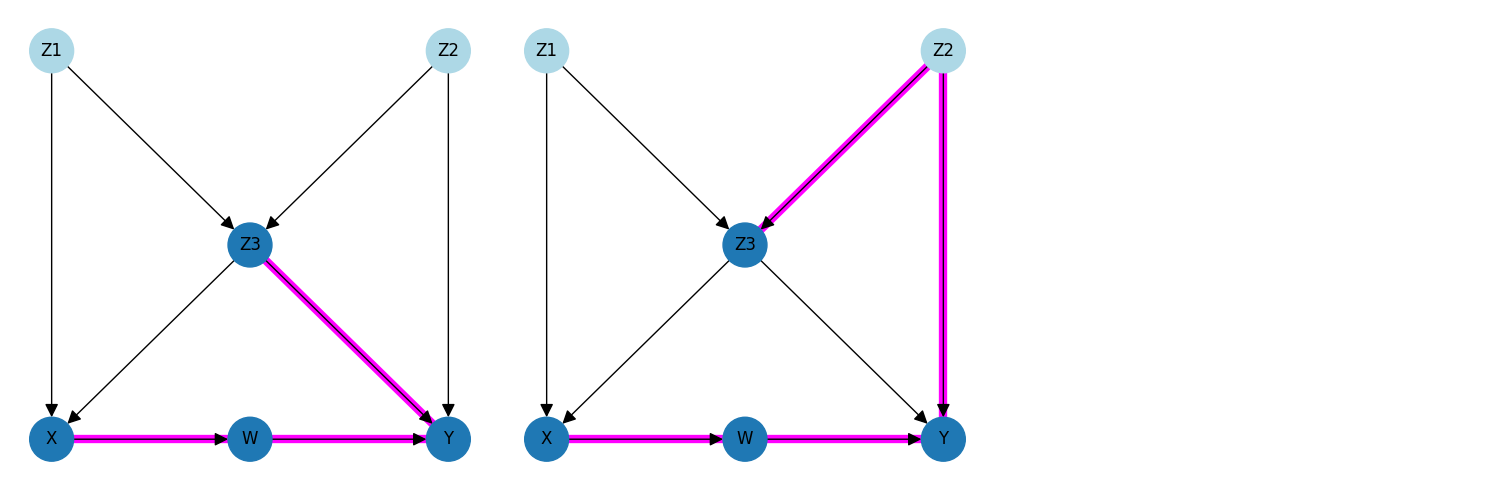

<IPython.core.display.Math object>

<IPython.core.display.Math object>

There are no valid adjustment sets

Unconditionally dependent? True
Unconditionally independent? False
Conditionally dependent? True
Conditionally independent? False

patern: none



In [36]:
new_dag: DirectedAcyclicGraph = DirectedAcyclicGraph(treatment="X", outcome="Z3", edges = dag.edges, pos=dag.pos)
new_dag.analyse()

In [37]:
new_dag.optimal_backdoor_adjustment_set

Directed Acyclic Graph ...


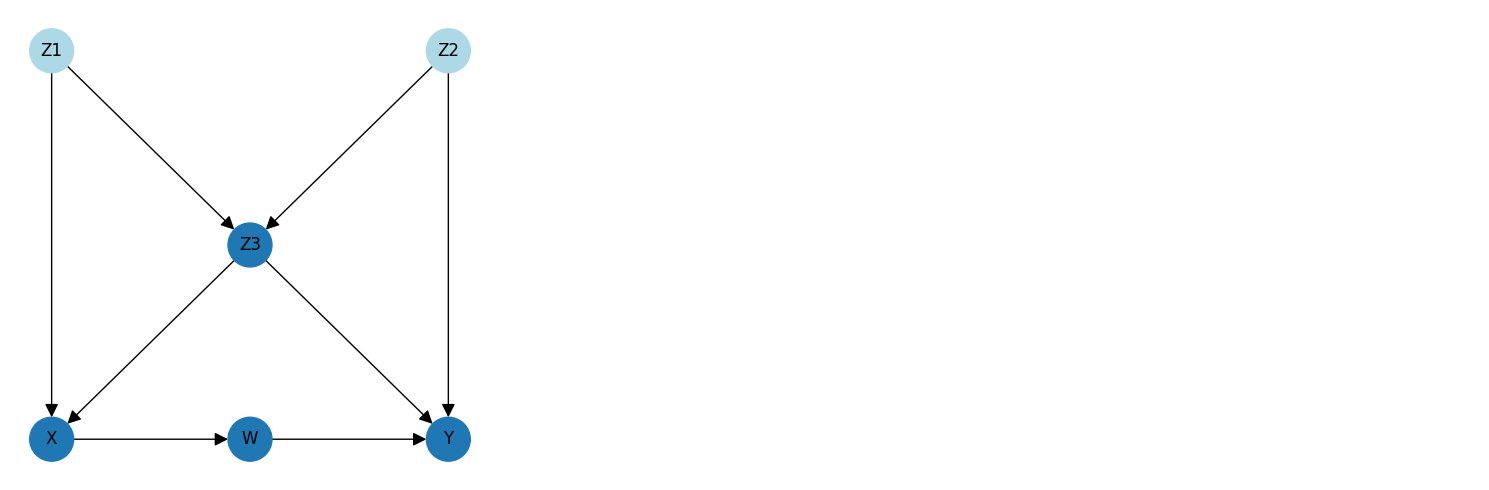

Frontdoor paths ...


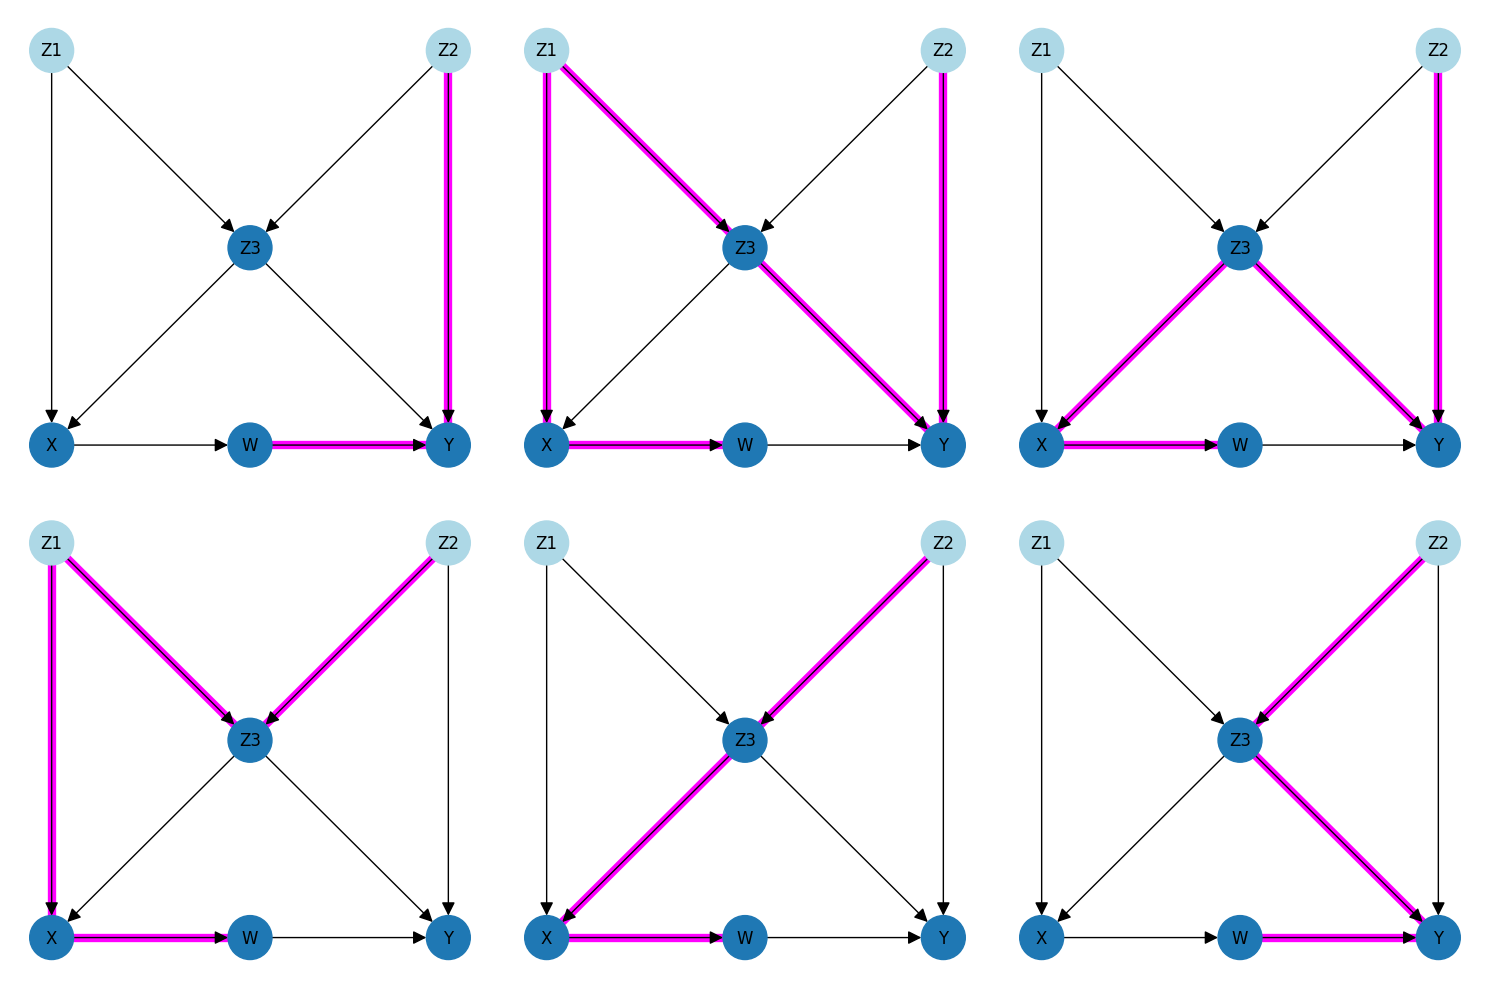

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Valid adjustment sets ...
[[], ['Z1'], ['Y'], ['Z3'], ['Y', 'Z1'], ['X', 'Y'], ['Y', 'Z3'], ['X', 'Y', 'Z1'], ['Y', 'Z1', 'Z3'], ['X', 'Y', 'Z3'], ['X', 'Y', 'Z1', 'Z3']]


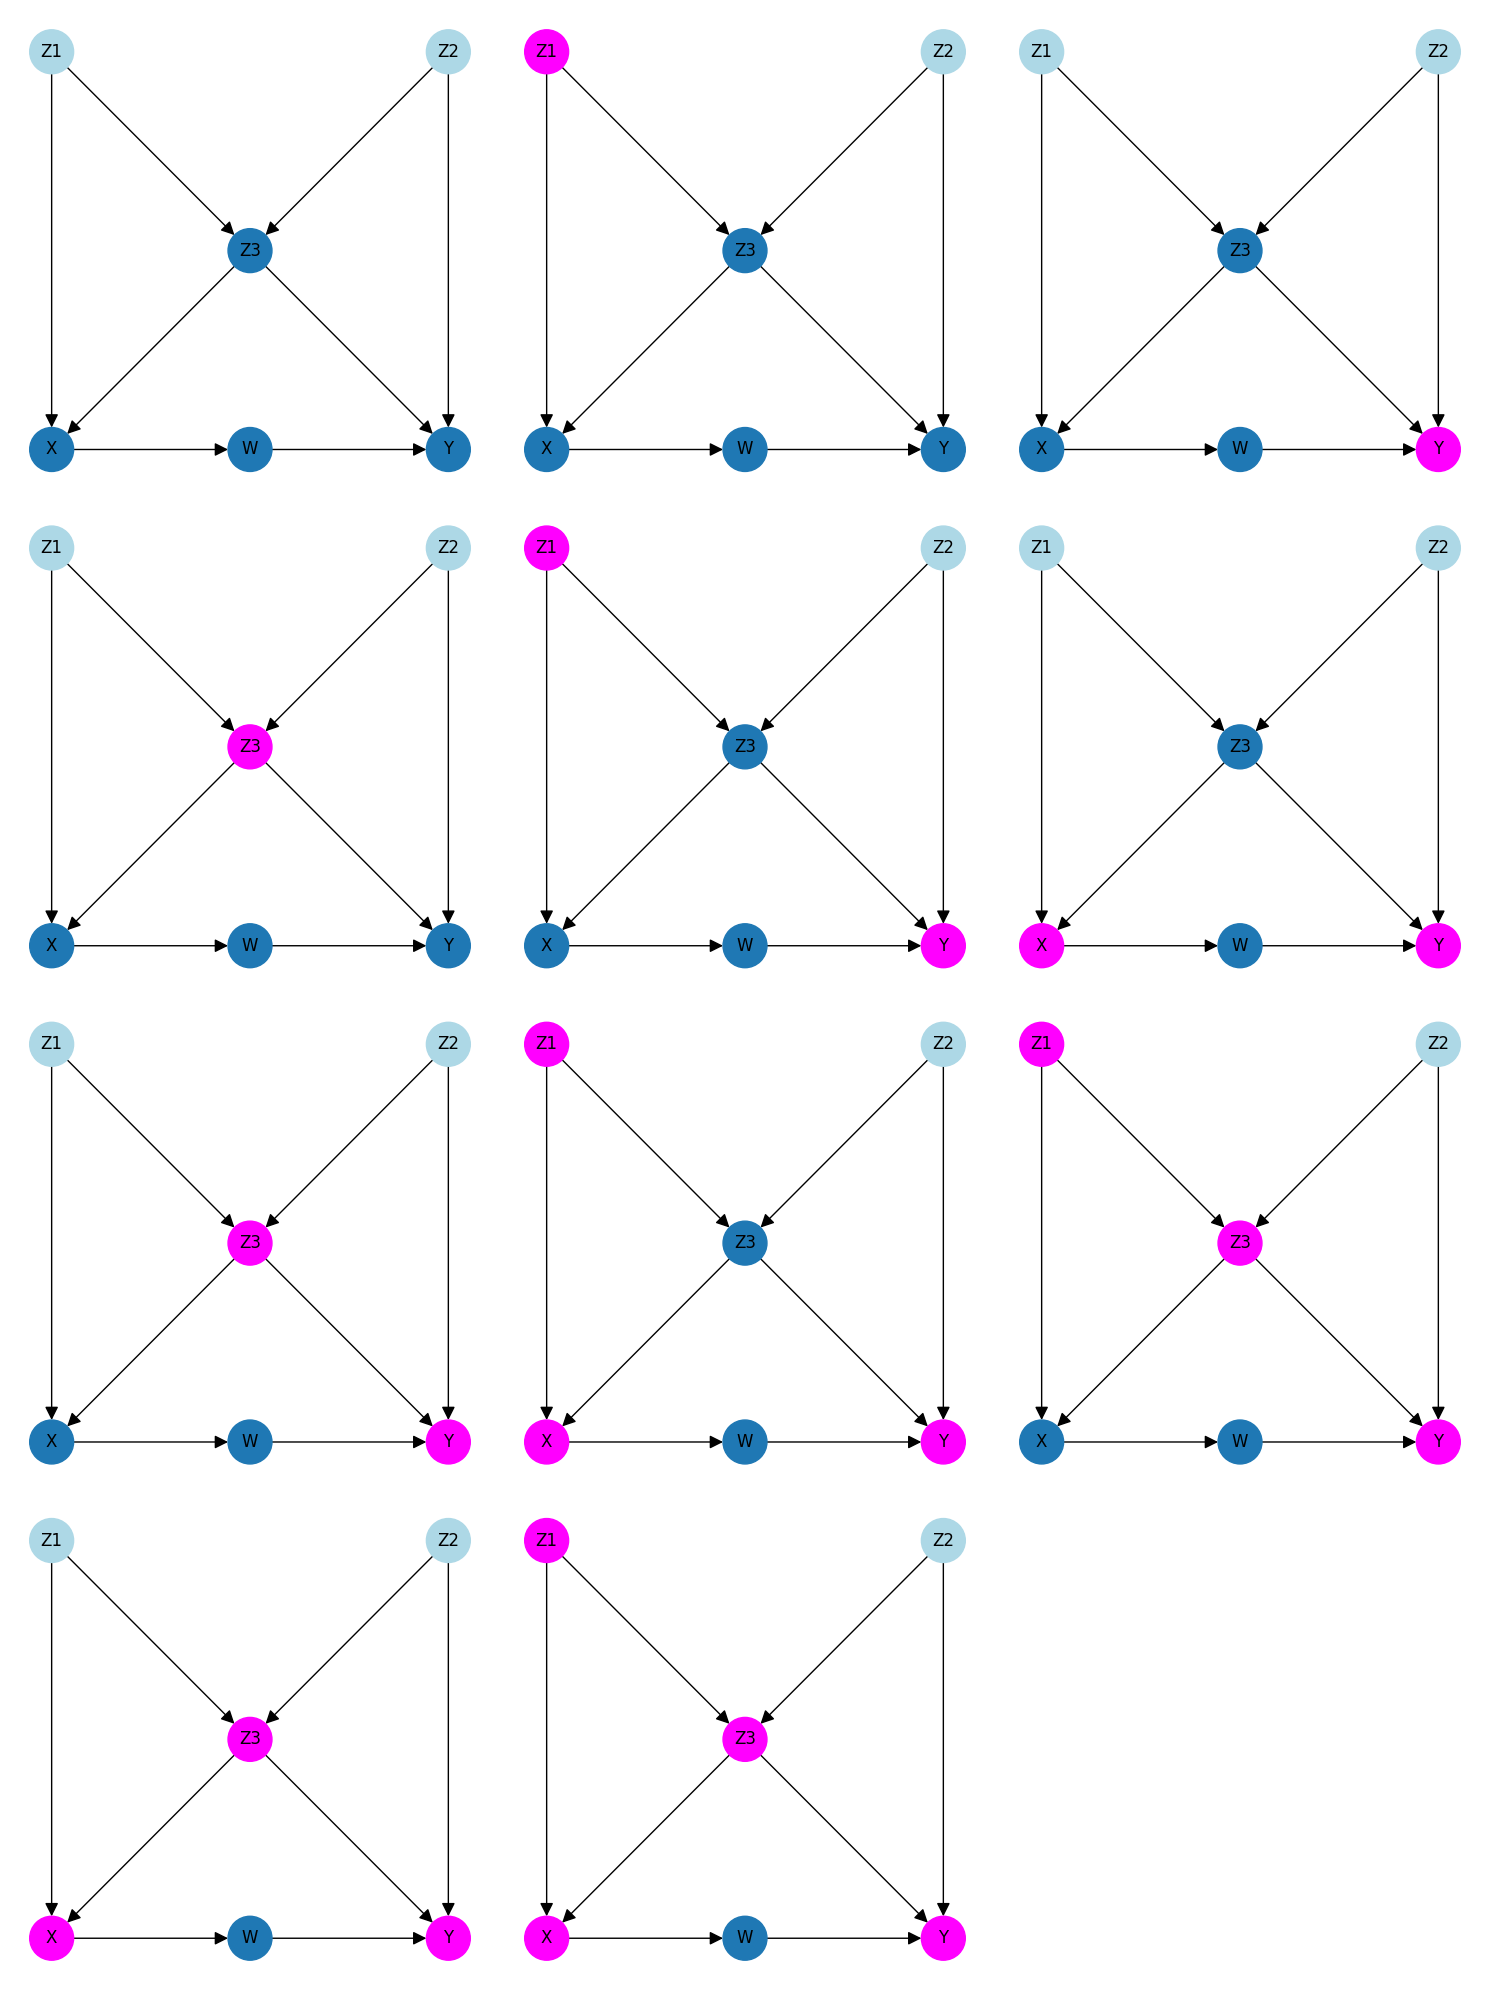

Optimal adjustment set
[]


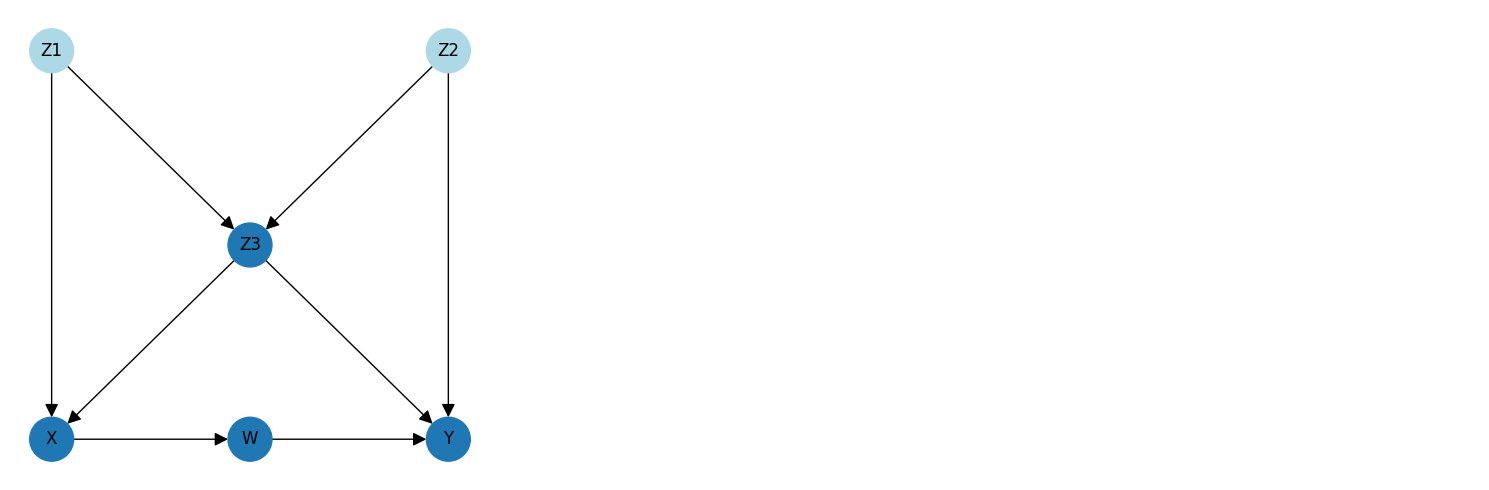

Unconditionally dependent? True
Unconditionally independent? False
Conditionally dependent? True
Conditionally independent? True

patern: backdoor



In [38]:
new_dag: DirectedAcyclicGraph = DirectedAcyclicGraph(treatment="Z2", outcome="W", edges = dag.edges, pos=dag.pos)
new_dag.analyse()

In [39]:
start = "X"
end = "Y"

is_independent_on_unconditioned, _, ols_results = causal_model.data.dependence(expression=f"{end} ⫫ {start}")
print(is_independent_on_unconditioned)

#is_dependent_on_unconditioned, _, ols_results = causal_model.data.dependence(expression=f"{end} ⫫̸ {start}")
#print(is_dependent_on_unconditioned)

ols_results.summary()

ic| expression: 'Y ⫫ X'


False


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     6067.
Date:                Tue, 06 Feb 2024   Prob (F-statistic):               0.00
Time:                        17:23:41   Log-Likelihood:                -5097.5
No. Observations:                1000   AIC:                         1.020e+04
Df Residuals:                     998   BIC:                         1.021e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     35.4682      1.646     21.543      0.000      32.237      38.699
X             -5.2476      0.067    -77.893      0.000      -5.380      -5.115
==============================================================================
Omnibus:                        4.548   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.103   Jarque-Bera (JB):                4.505
Skew:                          -0.138   Prob(JB):                        0.105
Kurtosis:                       2.821   Cond. No.                         32.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Directed Acyclic Graph ...


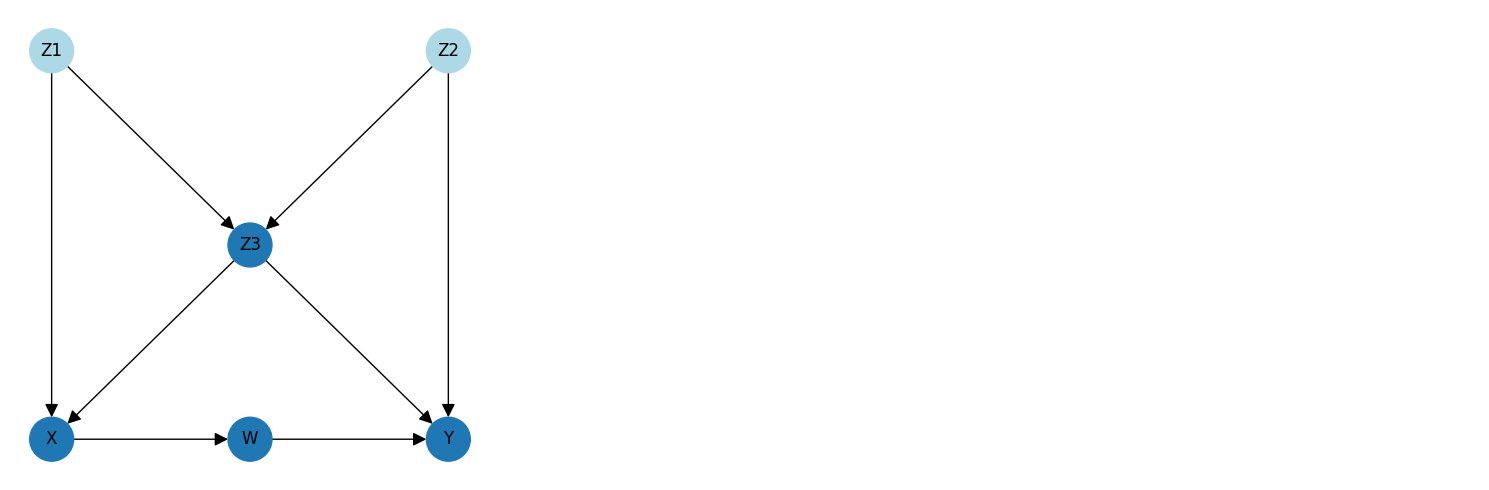

Backdoor paths ...


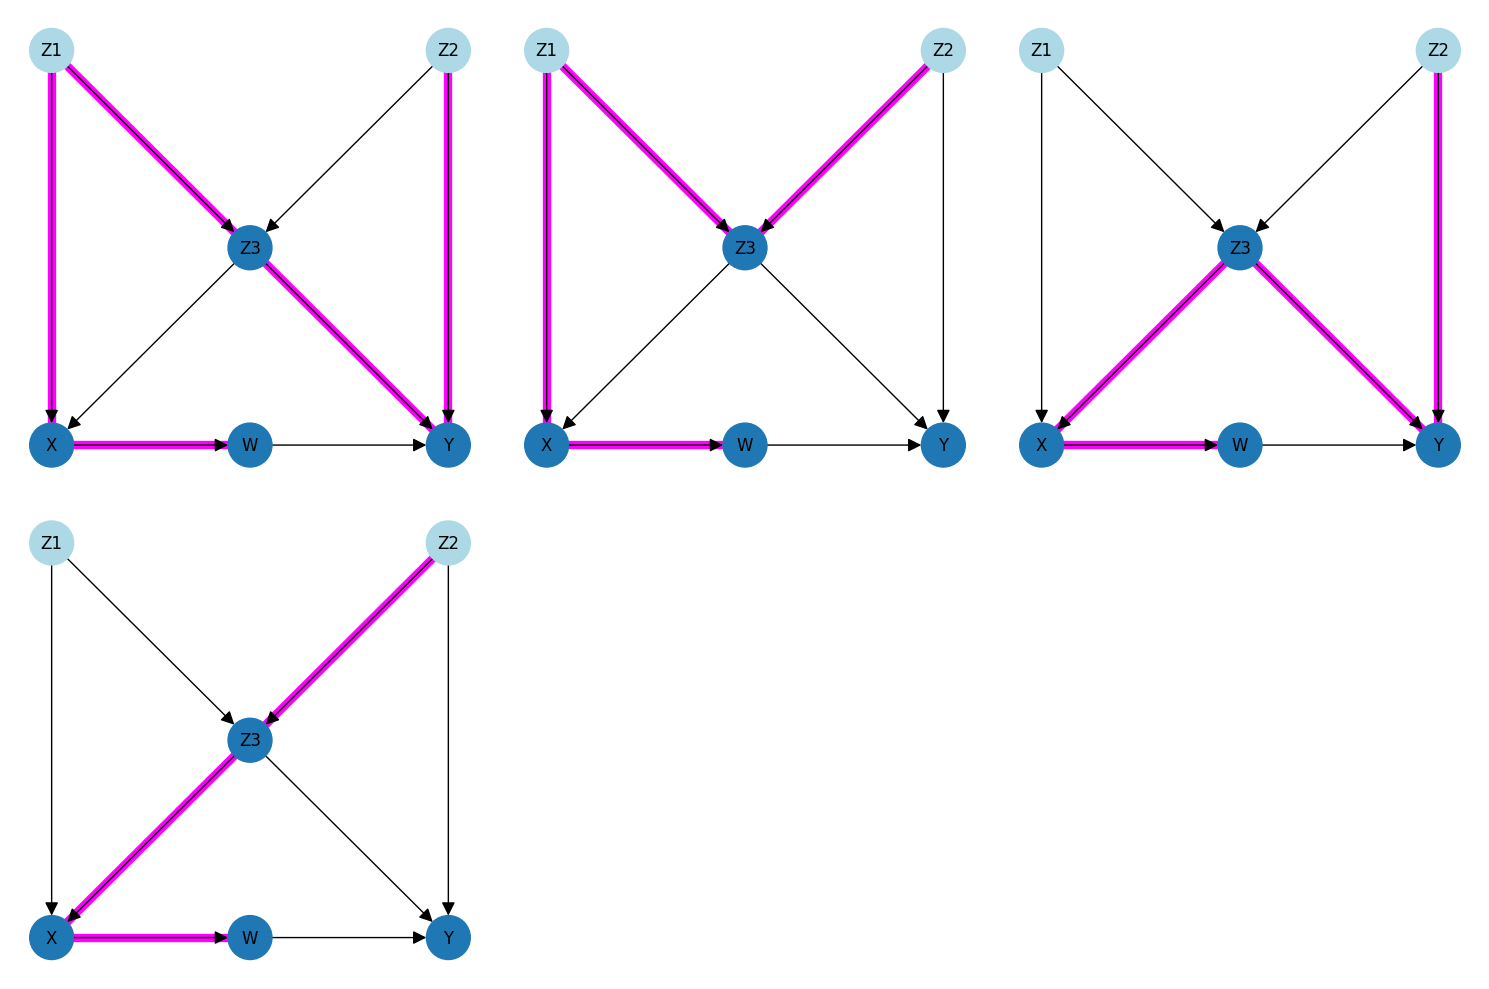

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Frontdoor paths ...


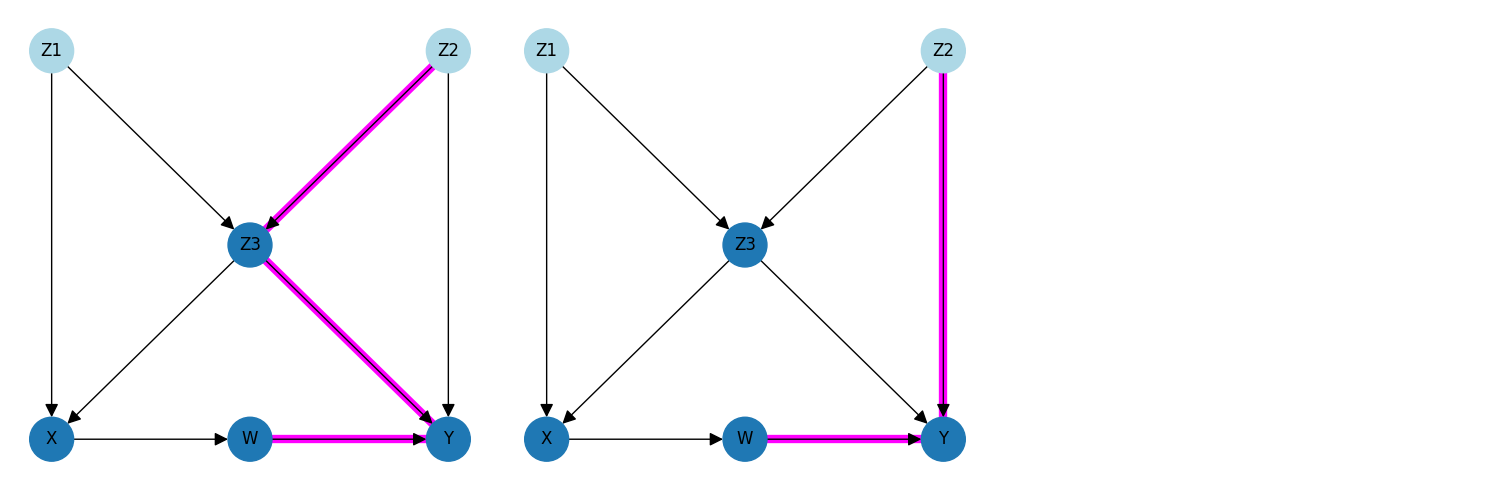

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Valid adjustment sets ...
[['X', 'Y'], ['Y', 'Z1', 'Z3'], ['X', 'Y', 'Z1'], ['X', 'Y', 'Z3'], ['X', 'Y', 'Z1', 'Z3']]


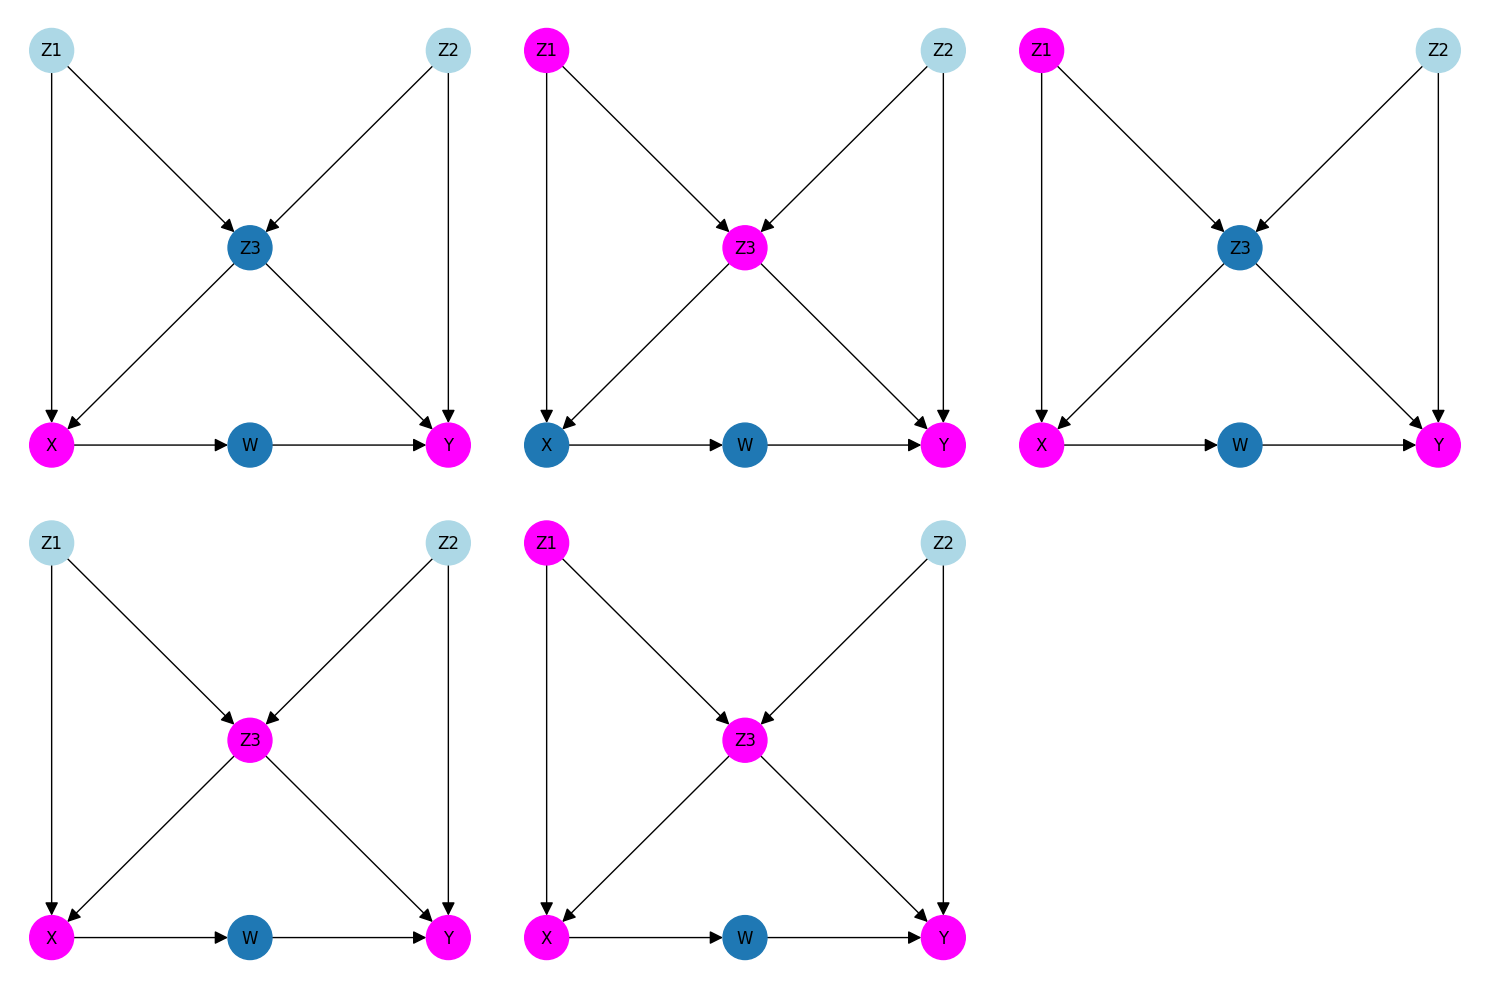

Optimal adjustment set
['X', 'Y']


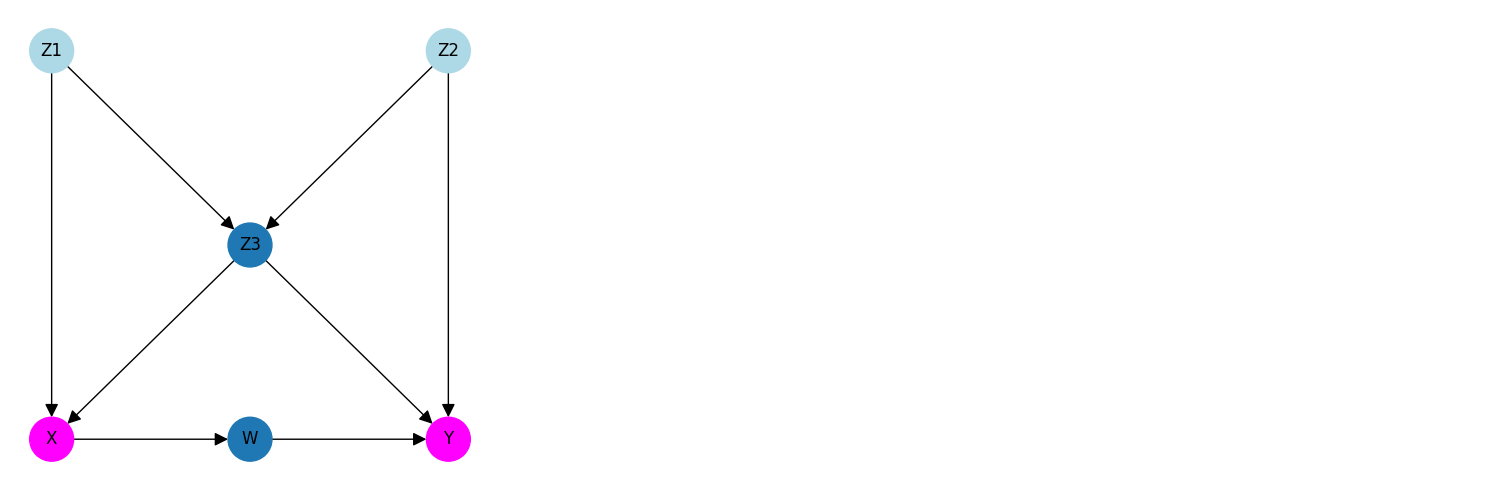

Unconditionally dependent? True
Unconditionally independent? False
Conditionally dependent? True
Conditionally independent? True

patern: backdoor



In [84]:
new_dag: DirectedAcyclicGraph = DirectedAcyclicGraph(treatment="W", outcome="Z2", edges = dag.edges, pos=dag.pos)
new_dag.analyse()

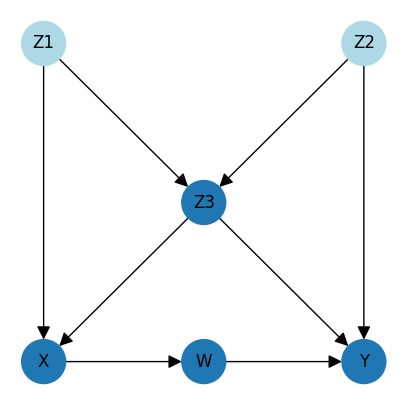

In [23]:
dag.draw()

In [31]:
import matplotlib.pyplot as plt

{'X': 'treatment', 'W': 'chain', 'Y': 'outcome'}, chain


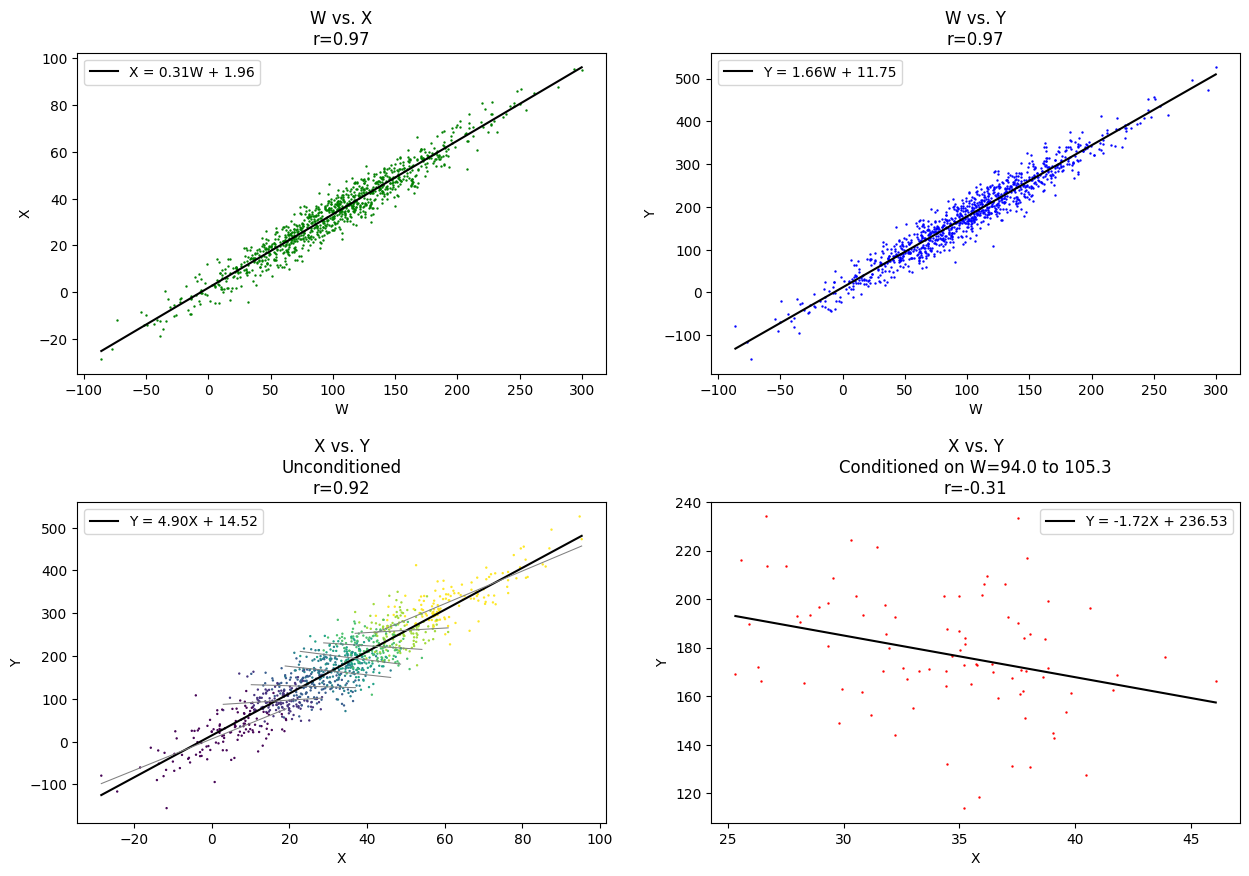

{'Z1': 'treatment', 'X': 'chain', 'W': 'outcome'}, chain


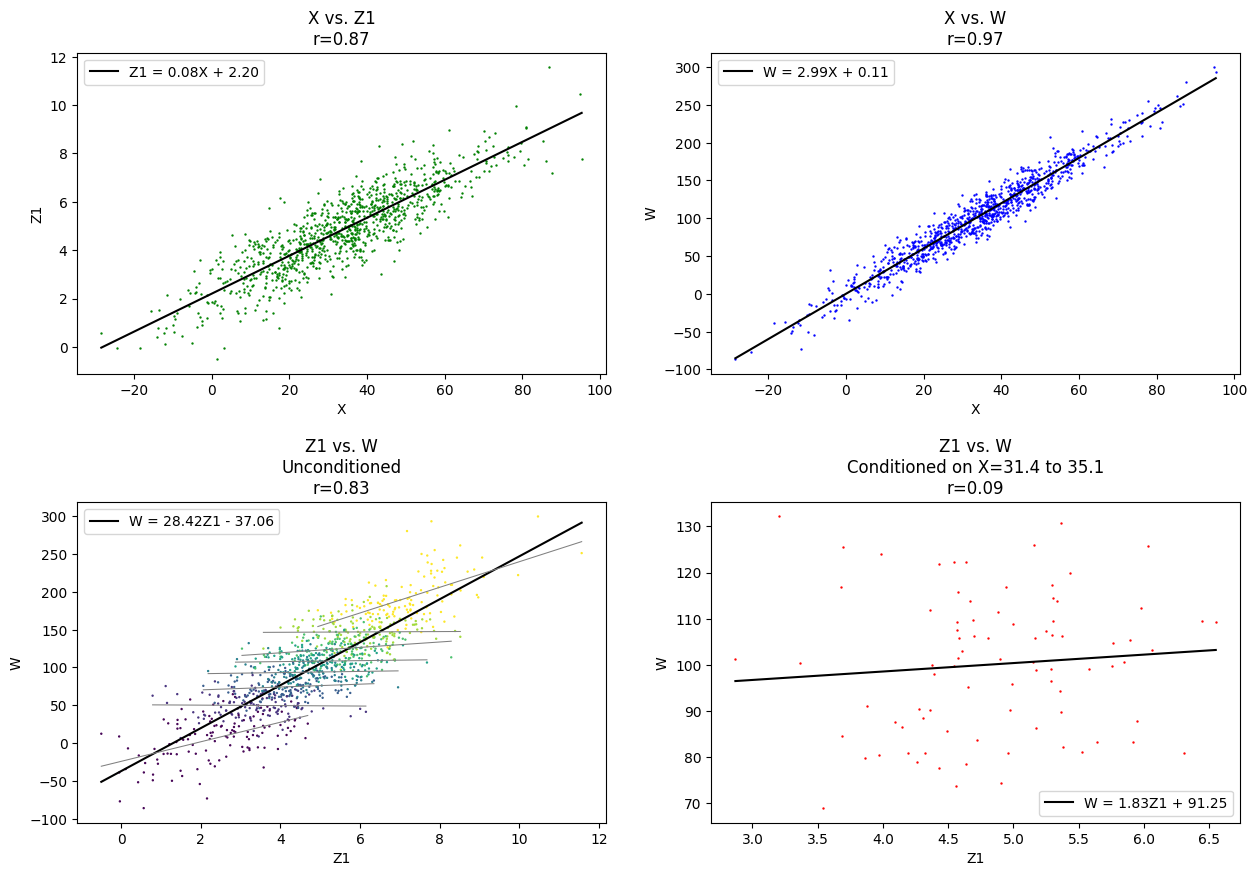

{'Z3': 'treatment', 'X': 'chain', 'W': 'outcome'}, chain


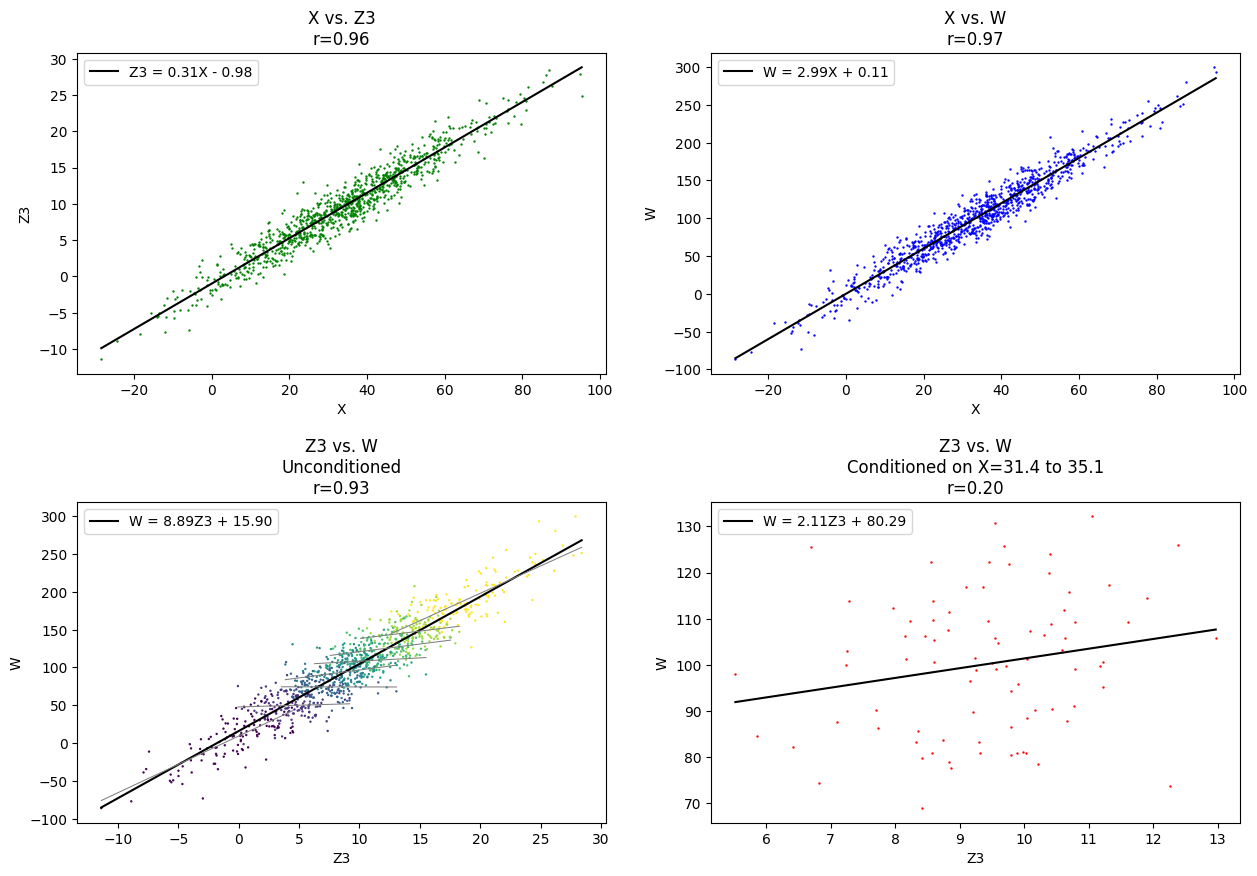

{'Z1': 'treatment', 'Z3': 'chain', 'X': 'outcome'}, chain


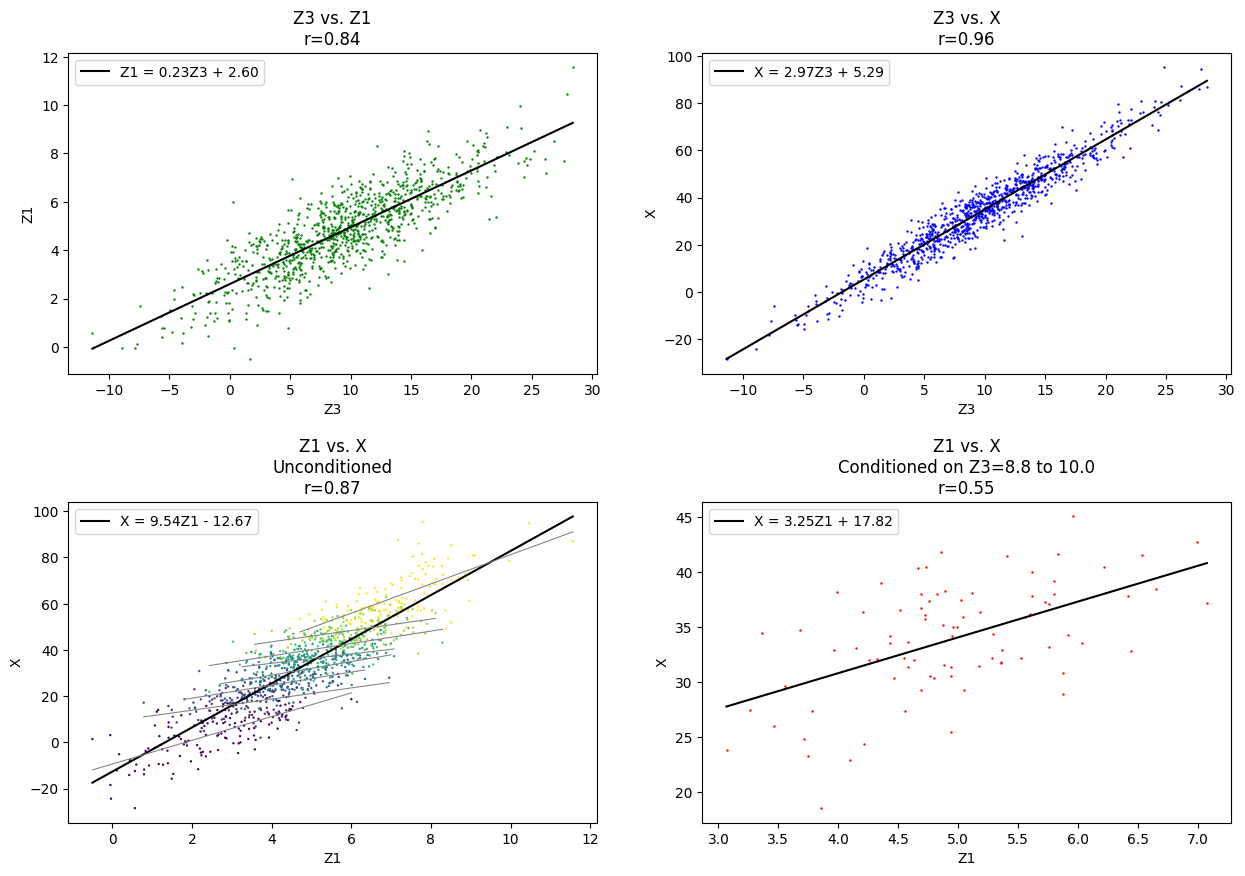

{'Z1': 'treatment', 'Z3': 'chain', 'Y': 'outcome'}, chain


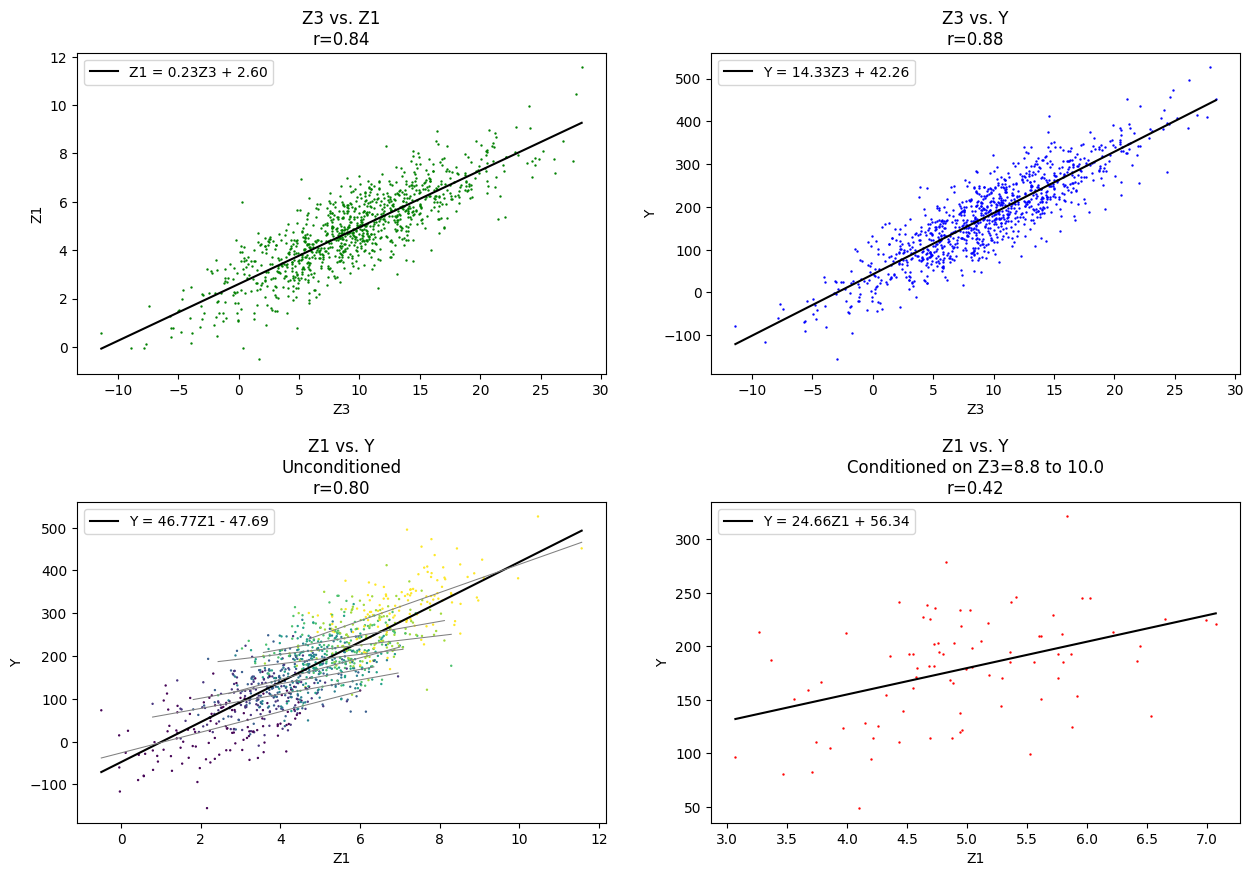

{'Z2': 'treatment', 'Z3': 'chain', 'X': 'outcome'}, chain


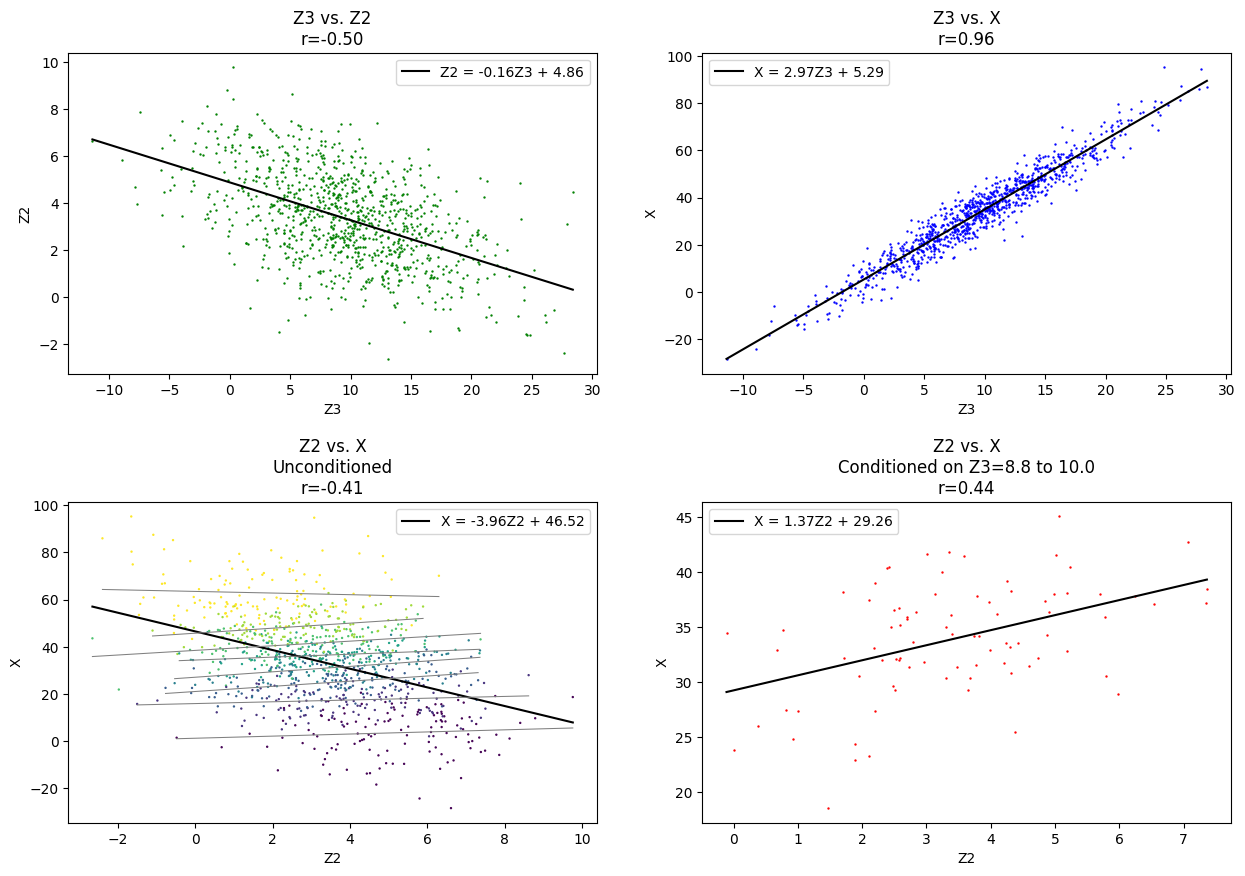

{'Z2': 'treatment', 'Z3': 'chain', 'Y': 'outcome'}, chain


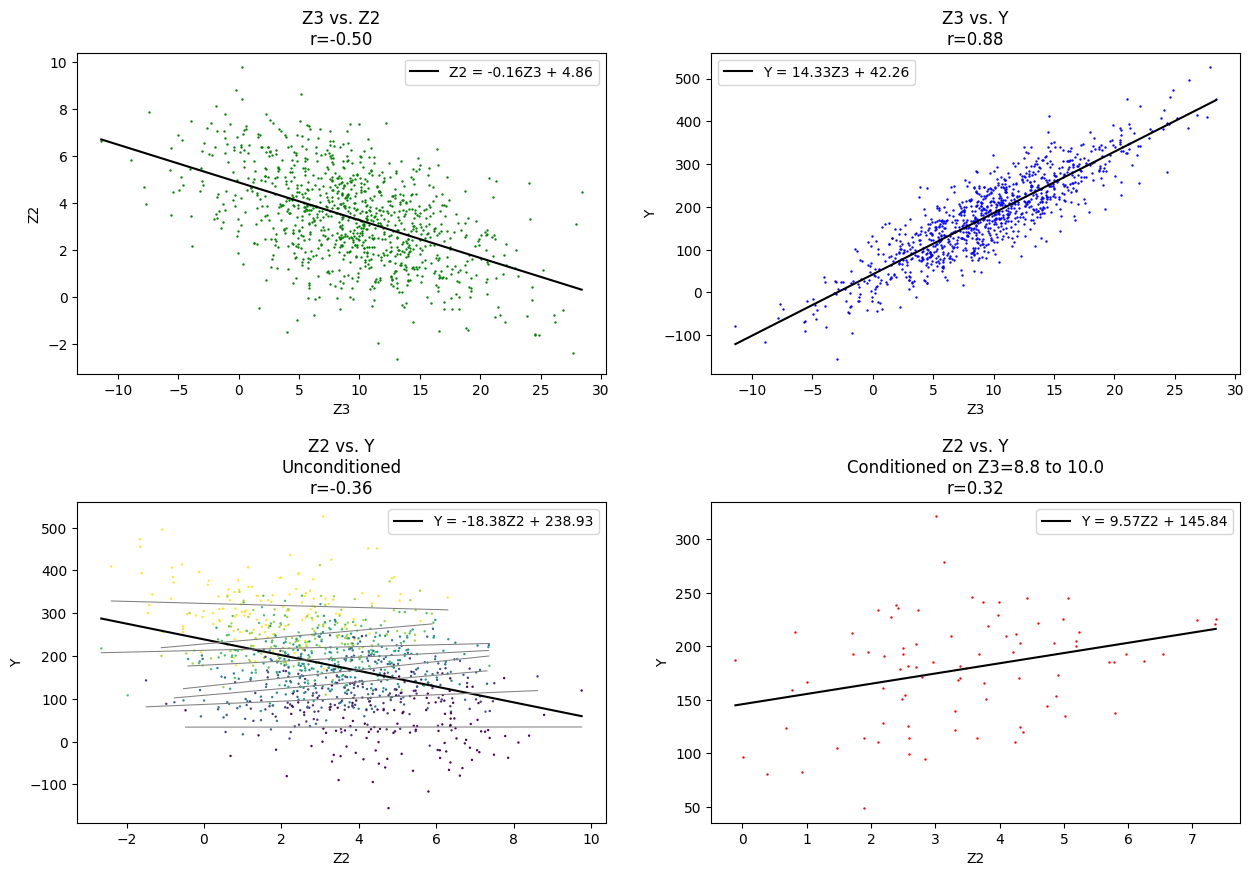

{'X': 'treatment', 'Z1': 'fork', 'Z3': 'outcome'}, fork


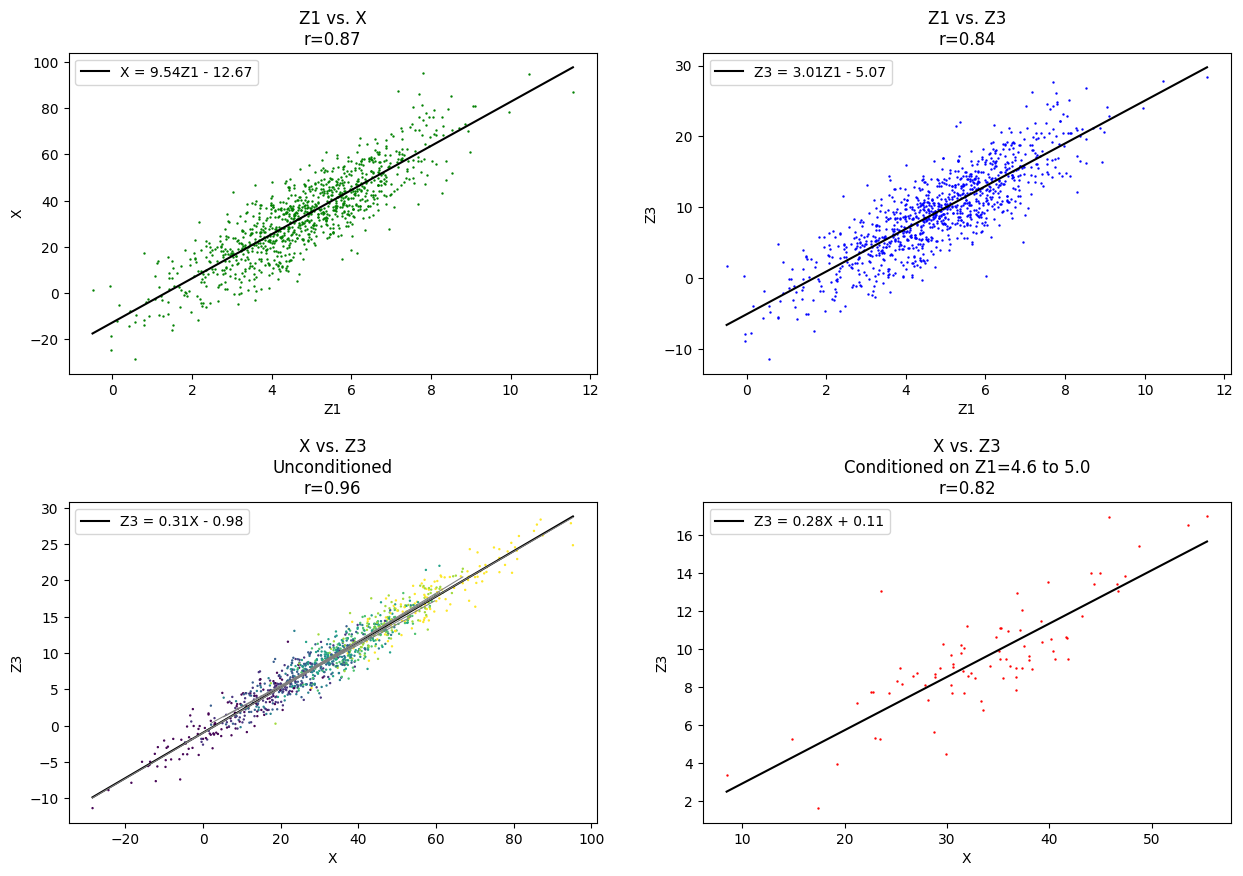

{'X': 'treatment', 'Z3': 'fork', 'Y': 'outcome'}, fork


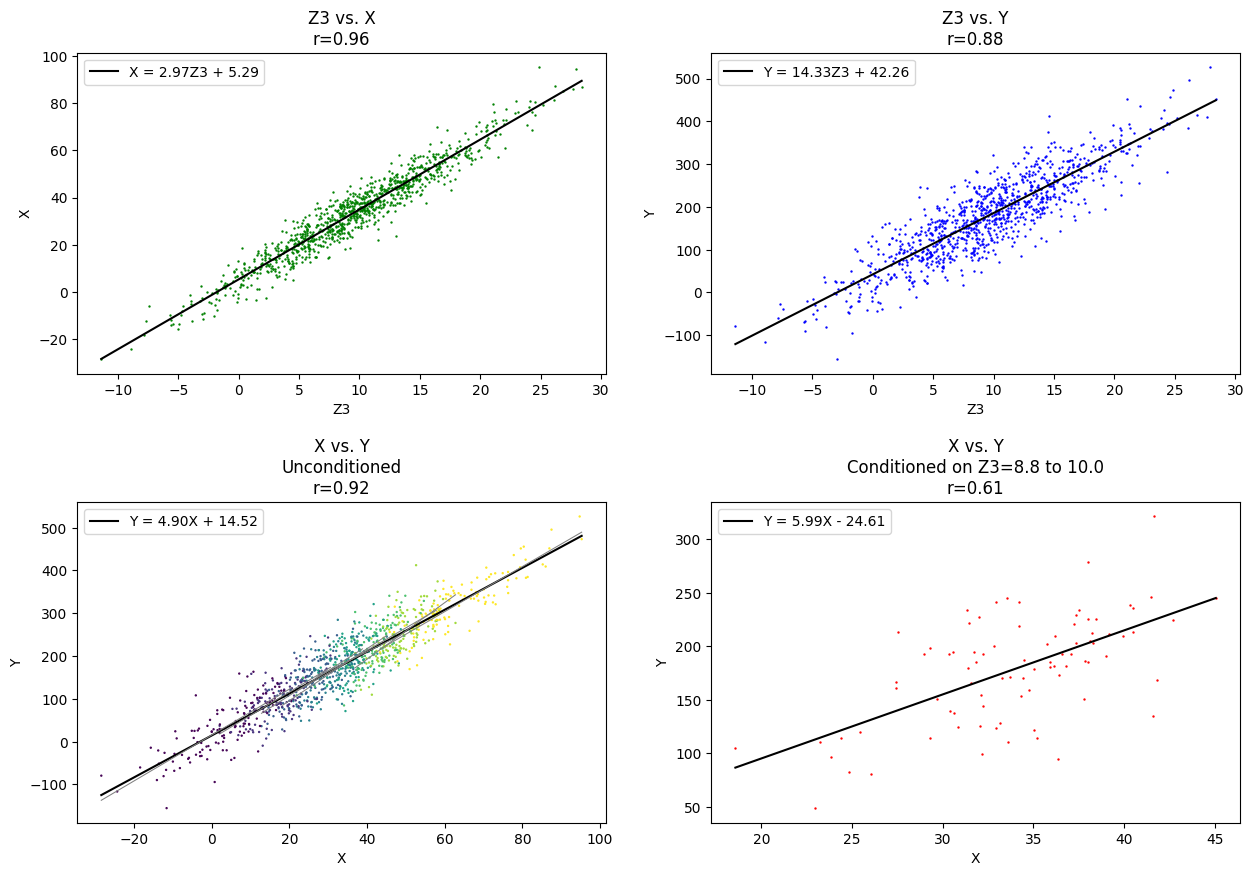

{'Y': 'treatment', 'Z2': 'fork', 'Z3': 'outcome'}, fork


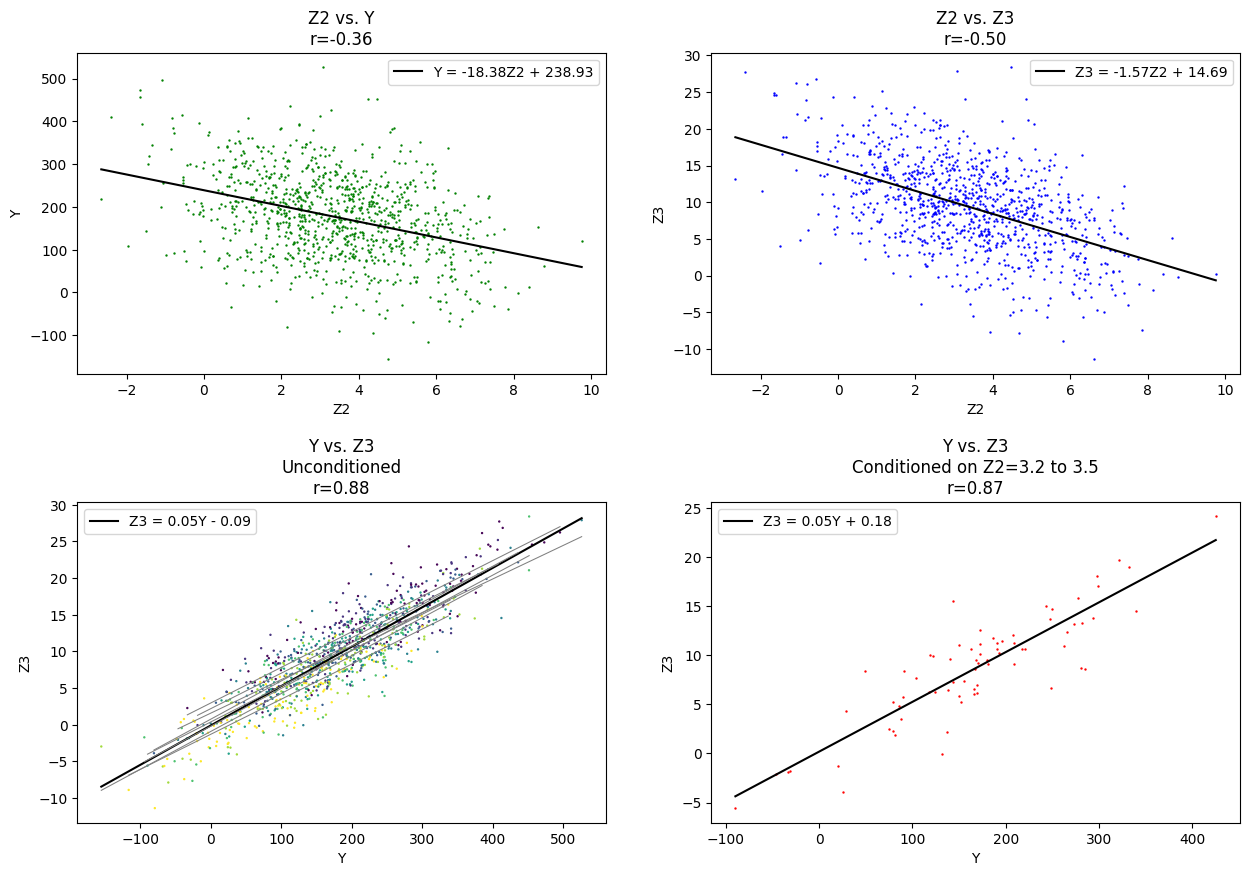

{'W': 'treatment', 'Y': 'collider', 'Z2': 'outcome'}, v-structure


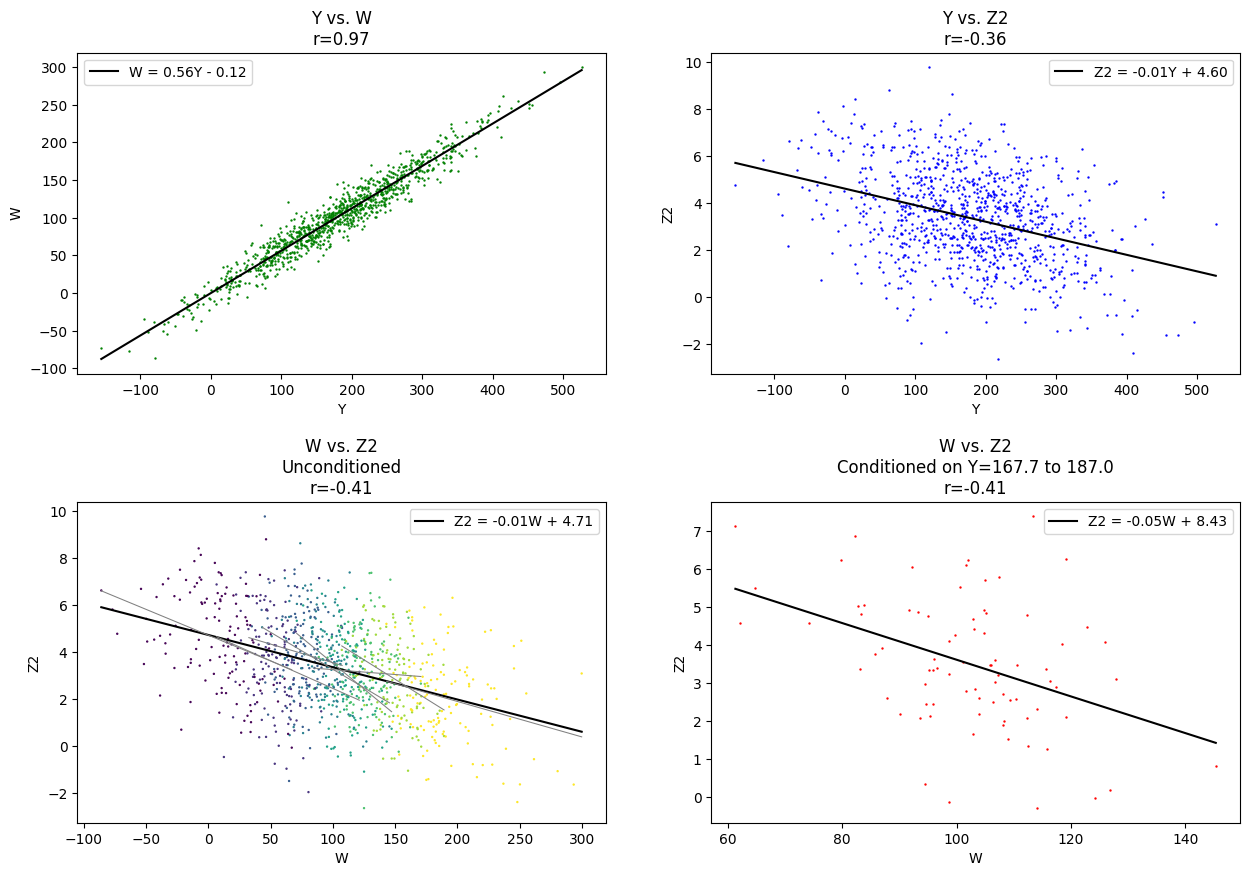

{'W': 'treatment', 'Y': 'collider', 'Z3': 'outcome'}, v-structure


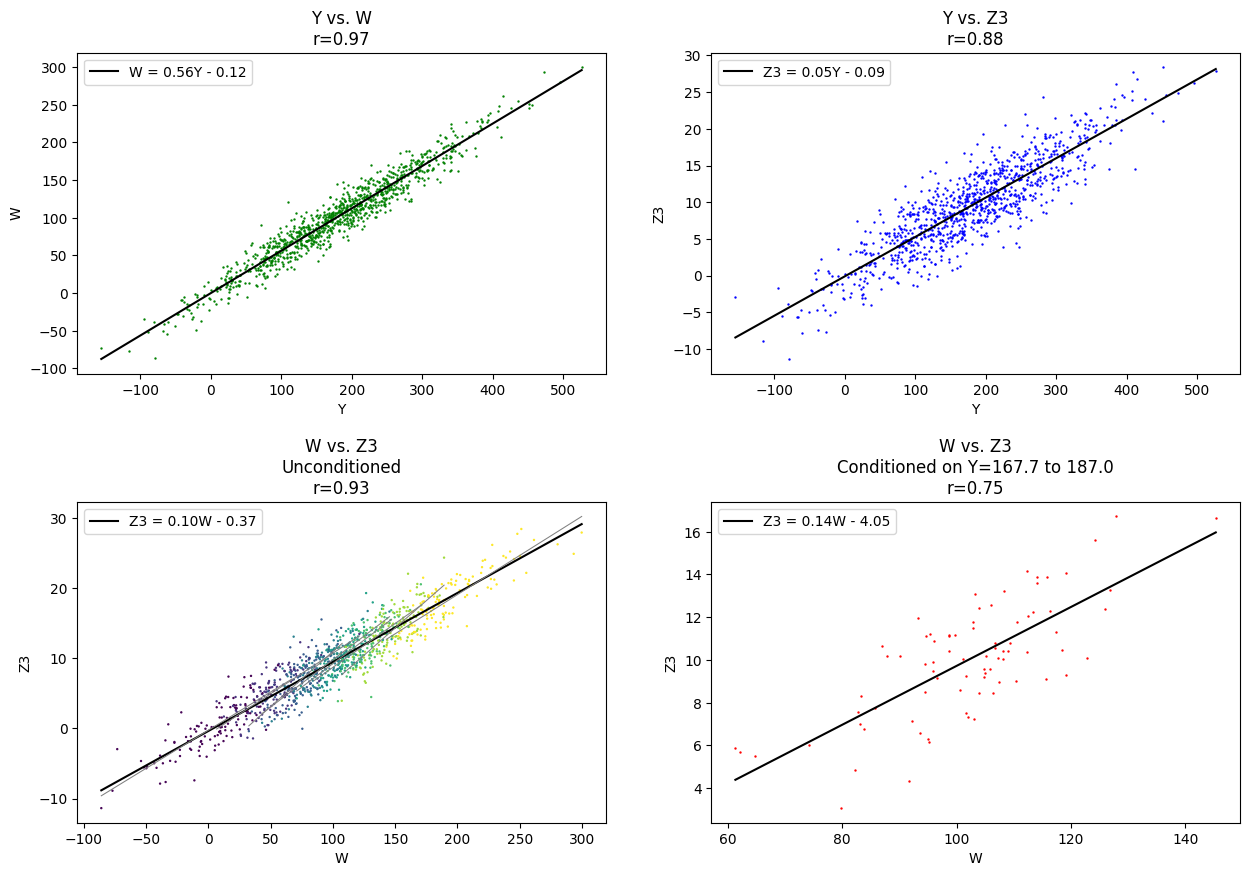

{'Z2': 'treatment', 'Y': 'collider', 'Z3': 'outcome'}, collider


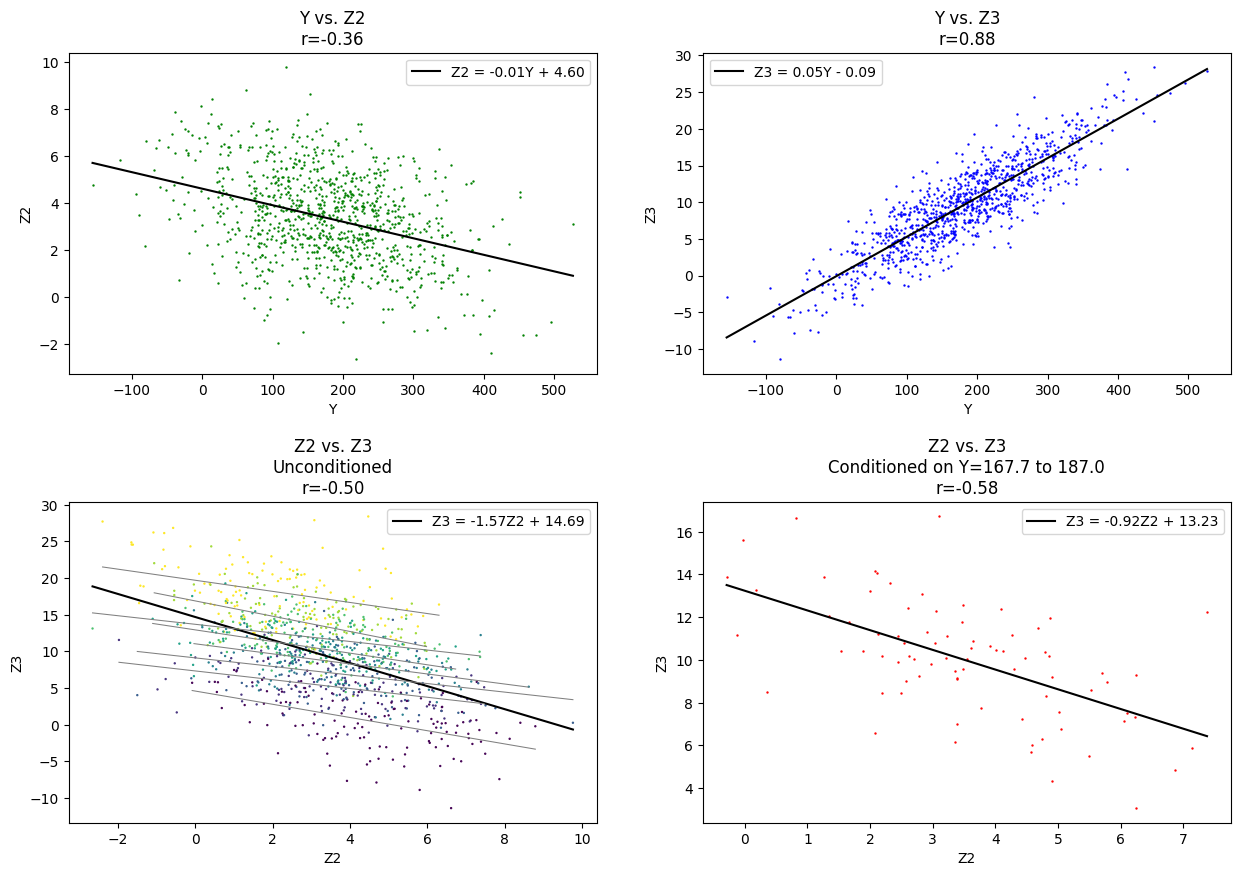

{'Z1': 'treatment', 'X': 'collider', 'Z3': 'outcome'}, collider


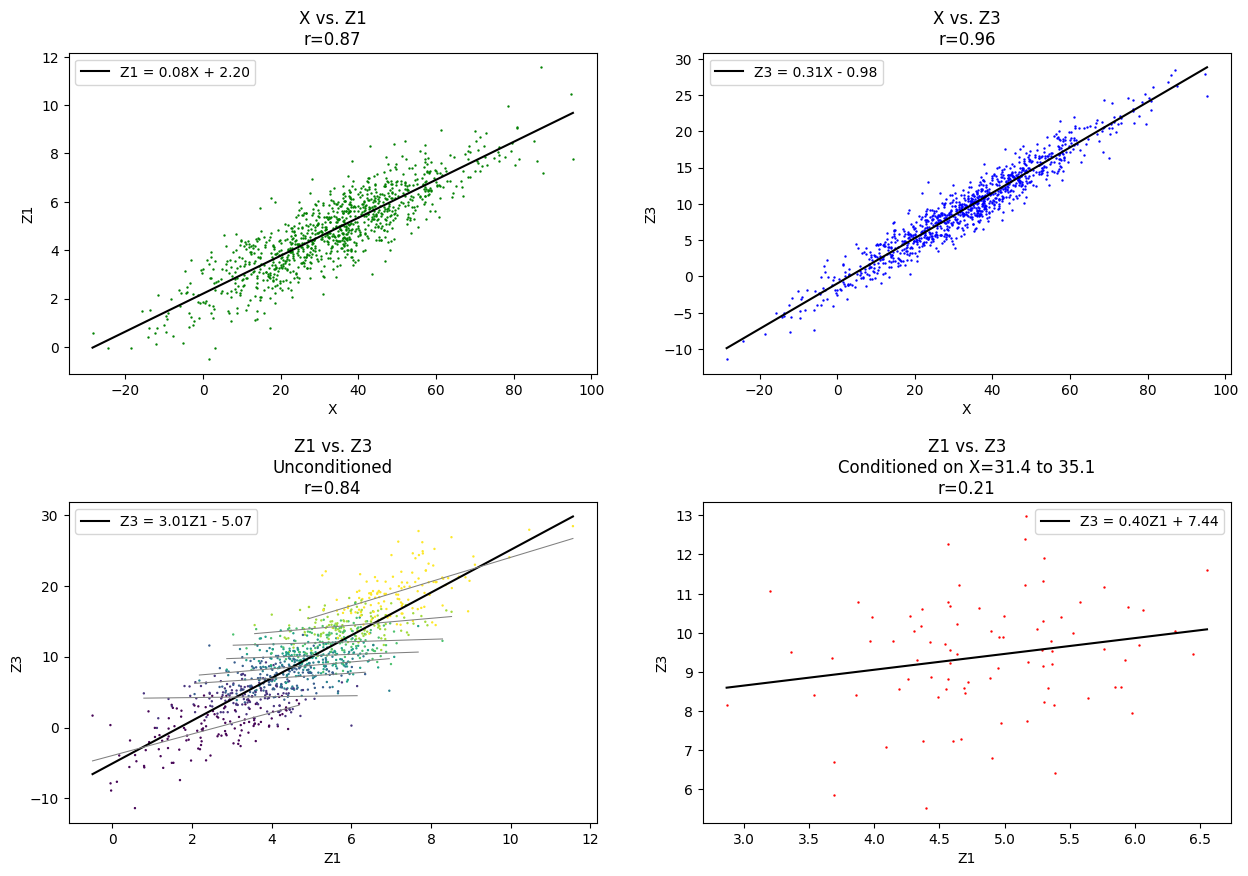

{'Z1': 'treatment', 'Z3': 'collider', 'Z2': 'outcome'}, v-structure


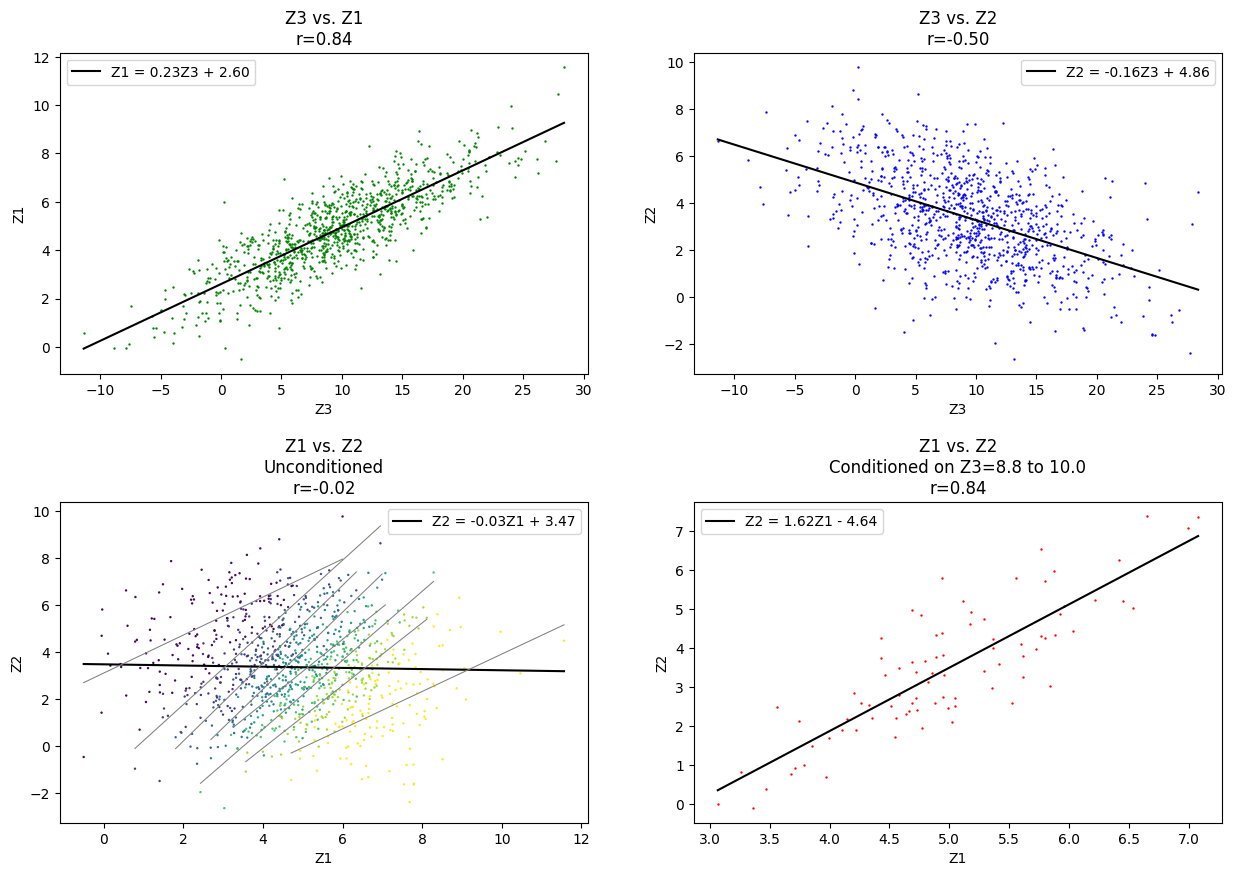

In [32]:
for junction in dag.junctions:
    print(f"{junction}, {dag.junction_type(junction)}")
    causal_model.scatter_junction(junction=junction)
    plt.show()

In [23]:
pvalue = ols_results.pvalues["X"]
pvalue == 0

True

In [37]:
start = "W"
end = "Z2"

is_independent_on_unconditioned, _, ols_results = causal_model.data.dependence(expression=f"{end} ⫫ {start} | X, Y")
print(is_independent_on_unconditioned)

#is_dependent_on_unconditioned, _, ols_results = causal_model.data.dependence(expression=f"{end} ⫫̸ {start}")
#print(is_dependent_on_unconditioned)

ols_results.summary()

ic| expression: 'Z2 ⫫ W | X, Y'


True


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Z2   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     76.04
Date:                Thu, 01 Feb 2024   Prob (F-statistic):           2.73e-44
Time:                        08:45:13   Log-Likelihood:                -1976.7
No. Observations:                1000   AIC:                             3961.
Df Residuals:                     996   BIC:                             3981.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6261      0.118     39.292      0.000       4.395       4.857
W             -0.0258      0.006     -4.225      0.000      -0.038      -0.014
X             -0.0140      0.012     -1.118      0.264      -0.038       0.011
Y              0.0099      0.002      4.384      0.000       0.005       0.014
==============================================================================
Omnibus:                        0.720   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.698   Jarque-Bera (JB):                0.804
Skew:                          -0.039   Prob(JB):                        0.669
Kurtosis:                       2.885   Cond. No.                         503.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
start = "W"
end = "Z2"

is_independent_on_unconditioned, _, ols_results = causal_model.data.dependence(expression=f"{end} ⫫ {start}")
print(is_independent_on_unconditioned)

#is_dependent_on_unconditioned, _, ols_results = causal_model.data.dependence(expression=f"{end} ⫫̸ {start}")
#print(is_dependent_on_unconditioned)

ols_results.summary()

ic| expression: 'Z2 ⫫ W'


True


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Z2   R-squared:                       0.167
Model:                            OLS   Adj. R-squared:                  0.166
Method:                 Least Squares   F-statistic:                     199.6
Date:                Thu, 01 Feb 2024   Prob (F-statistic):           1.90e-41
Time:                        08:41:38   Log-Likelihood:                -1988.7
No. Observations:                1000   AIC:                             3981.
Df Residuals:                     998   BIC:                             3991.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.7150      0.112     42.122      0.000       4.495       4.935
W             -0.0137      0.001    -14.128      0.000      -0.016      -0.012
==============================================================================
Omnibus:                        1.407   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.495   Jarque-Bera (JB):                1.420
Skew:                          -0.042   Prob(JB):                        0.492
Kurtosis:                       2.835   Cond. No.                         230.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
start = "Z1"
end = "Z2"

is_independent_on_unconditioned, _, ols_results = causal_model.data.dependence(expression=f"{end} ⫫ {start}")
print(is_independent_on_unconditioned)

#is_dependent_on_unconditioned, _, ols_results = causal_model.data.dependence(expression=f"{end} ⫫̸ {start}")
#print(is_dependent_on_unconditioned)

ols_results.summary()

ic| expression: 'Z2 ⫫ Z1'


True


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Z2   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.4873
Date:                Thu, 01 Feb 2024   Prob (F-statistic):              0.485
Time:                        08:40:50   Log-Likelihood:                -2079.6
No. Observations:                1000   AIC:                             4163.
Df Residuals:                     998   BIC:                             4173.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.4672      0.185     18.745      0.000       3.104       3.830
Z1            -0.0253      0.036     -0.698      0.485      -0.096       0.046
==============================================================================
Omnibus:                        1.114   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.573   Jarque-Bera (JB):                1.131
Skew:                           0.002   Prob(JB):                        0.568
Kurtosis:                       2.835   Cond. No.                         15.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
start = "X"
end = "Y"

is_independent_on_unconditioned, _, ols_results = causal_model.data.dependence(expression=f"{end} ⫫ {start}")
print(is_independent_on_unconditioned)

#is_dependent_on_unconditioned, _, ols_results = causal_model.data.dependence(expression=f"{end} ⫫̸ {start}")
#print(is_dependent_on_unconditioned)

ols_results.summary()

ic| expression: 'Y ⫫ X'


False


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     5730.
Date:                Thu, 01 Feb 2024   Prob (F-statistic):               0.00
Time:                        08:40:23   Log-Likelihood:                -5059.0
No. Observations:                1000   AIC:                         1.012e+04
Df Residuals:                     998   BIC:                         1.013e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     14.5192      2.467      5.885      0.000       9.678      19.361
X              4.8966      0.065     75.696      0.000       4.770       5.024
==============================================================================
Omnibus:                        2.615   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.270   Jarque-Bera (JB):                2.549
Skew:                           0.079   Prob(JB):                        0.280
Kurtosis:                       3.191   Cond. No.                         78.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
start = "W"
end = "Z2"

is_independent_on_unconditioned, _, ols_results = causal_model.data.dependence(expression=f"{end} ⫫ {start}")
print(is_independent_on_unconditioned)

is_dependent_on_unconditioned, _, ols_results = causal_model.data.dependence(expression=f"{end} ⫫̸ {start}")
print(is_dependent_on_unconditioned)

ols_results.summary()

ic| expression: 'Z2 ⫫ W'
ic| expression: 'Z2 ⫫̸ W'


True
True


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Z2   R-squared:                       0.167
Model:                            OLS   Adj. R-squared:                  0.166
Method:                 Least Squares   F-statistic:                     199.6
Date:                Thu, 01 Feb 2024   Prob (F-statistic):           1.90e-41
Time:                        08:51:48   Log-Likelihood:                -1988.7
No. Observations:                1000   AIC:                             3981.
Df Residuals:                     998   BIC:                             3991.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.7150      0.112     42.122      0.000       4.495       4.935
W             -0.0137      0.001    -14.128      0.000      -0.016      -0.012
==============================================================================
Omnibus:                        1.407   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.495   Jarque-Bera (JB):                1.420
Skew:                          -0.042   Prob(JB):                        0.492
Kurtosis:                       2.835   Cond. No.                         230.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
ols_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     5730.
Date:                Thu, 01 Feb 2024   Prob (F-statistic):               0.00
Time:                        08:31:44   Log-Likelihood:                -5059.0
No. Observations:                1000   AIC:                         1.012e+04
Df Residuals:                     998   BIC:                         1.013e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     14.5192      2.467      5.885      0.000       9.678      19.361
X              4.8966      0.065     75.696      0.000       4.770       5.024
==============================================================================
Omnibus:                        2.615   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.270   Jarque-Bera (JB):                2.549
Skew:                           0.079   Prob(JB):                        0.280
Kurtosis:                       3.191   Cond. No.                         78.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
is_dependent_on_unconditioned, _, ols_results = causal_model.data.dependence(expression=f"Z3 ⫫̸ X")
is_dependent_on_unconditioned

ic| expression: 'Z3 ⫫̸ X'


True

In [19]:
ols_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Z3   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                 1.283e+04
Date:                Thu, 01 Feb 2024   Prob (F-statistic):               0.00
Time:                        08:16:45   Log-Likelihood:                -1905.0
No. Observations:                1000   AIC:                             3814.
Df Residuals:                     998   BIC:                             3824.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9752      0.105     -9.262      0.000      -1.182      -0.769
X              0.3127      0.003    113.279      0.000       0.307       0.318
==============================================================================
Omnibus:                        4.234   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.120   Jarque-Bera (JB):                4.394
Skew:                           0.099   Prob(JB):                        0.111
Kurtosis:                       3.258   Cond. No.                         78.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

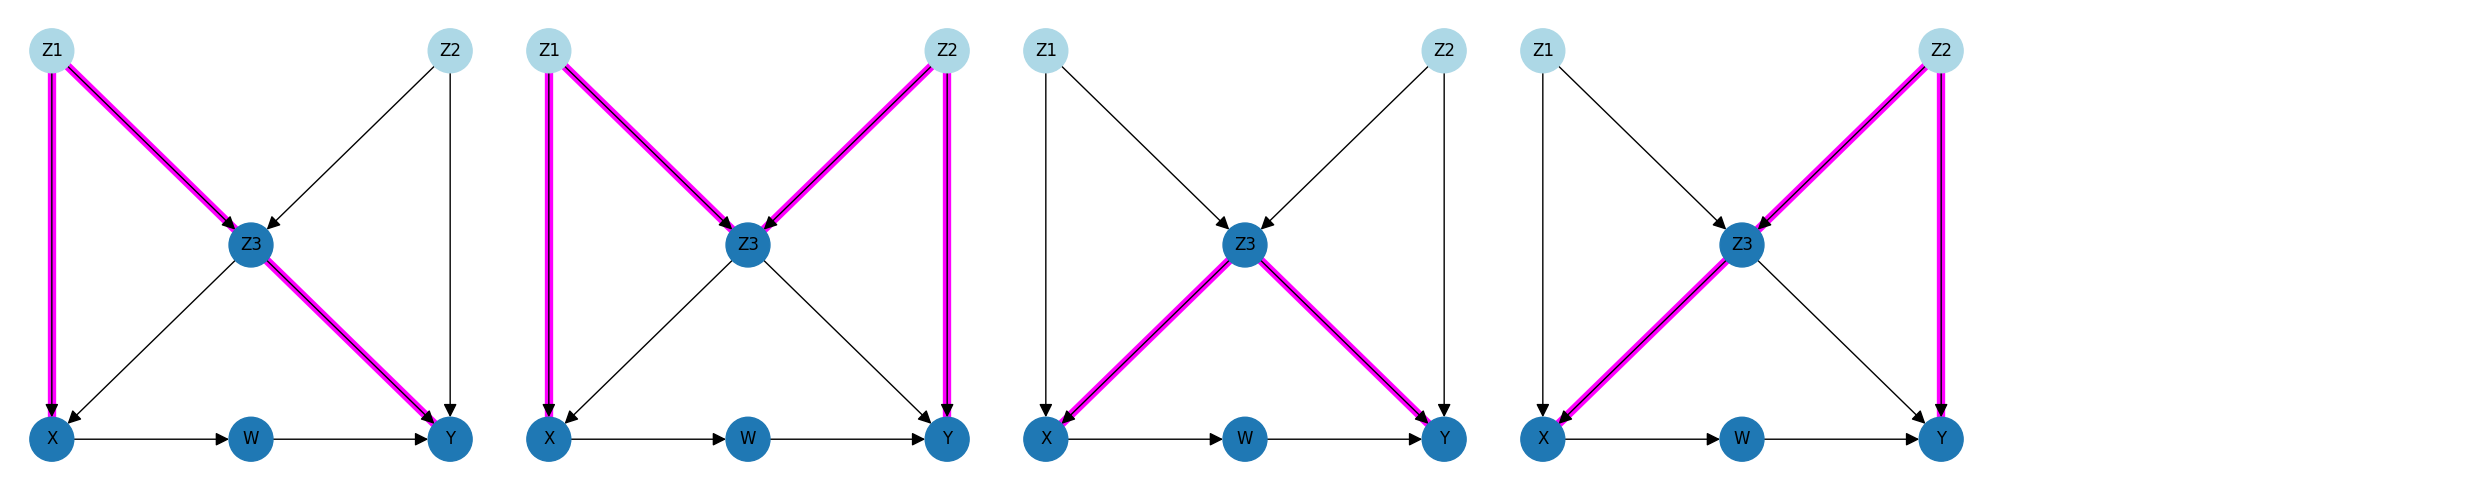

In [11]:
dag.draw_paths(paths=dag.backdoor_paths(), cols=5)

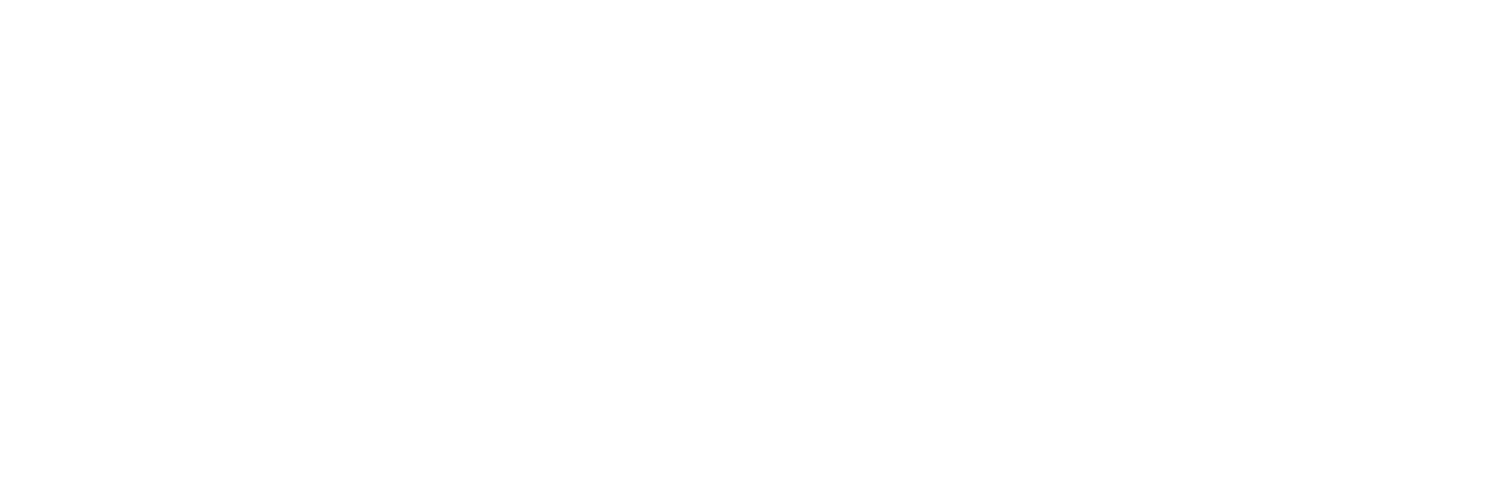

In [12]:
new_dag: DirectedAcyclicGraph = DirectedAcyclicGraph(treatment="Z1", outcome="Z3", edges = dag.edges, pos=dag.pos)
new_dag.draw_paths(paths=new_dag.backdoor_paths())